In [48]:
from IPython.core.interactiveshell import InteractiveShell
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import DataPreProcessor as DPP

warnings.filterwarnings('ignore')
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.options.display.max_rows


# 1. Load data


In [49]:
chotot_df = pd.read_csv("chotot_cleaned.csv")


In [50]:
alonhadat_df = pd.read_csv("alonhadat.csv")


In [51]:
chotot_df.drop(columns=['address', 'type_real_estate'], inplace=True)
chotot_df.rename(columns={'ahl_type': 'type_details'}, inplace=True)
chotot_df['website'] = 'Chotot'
chotot_df['front_road'] = np.nan
chotot_df.head(3)


list_time               ward                area    region  \
0  05/11/2021     Phường Tam Hòa  Thành phố Biên Hòa  Đồng Nai   
1  05/11/2021  Phường Thống Nhất  Thành phố Biên Hòa  Đồng Nai   
2  05/11/2021      Phường Hố Nai  Thành phố Biên Hòa  Đồng Nai   

  property_status direction balconydirection property_legal_document  \
0     Đã bàn giao       NaN              NaN             Đang chờ sổ   
1     Đã bàn giao       Bắc              Nam                Đã có sổ   
2   Chưa bàn giao       NaN              NaN            Giấy tờ khác   

   size (m2)  floornumber    furnishing_sell rooms toilets        floors  \
0       70.0          NaN                NaN     2       2  Nhiều hơn 10   
1       48.0          NaN    Nội thất đầy đủ     1       1  Nhiều hơn 10   
2       67.0          NaN  Hoàn thiện cơ bản     2       2  Nhiều hơn 10   

   living_size (m2)  width (m)  length (m)  price (million) type_details  \
0               NaN        NaN         NaN           1150.0     Chung cư   
1               NaN        NaN         NaN           1550.0     Chung cư   
2               NaN        NaN         NaN            360.0     Chung cư   

  website  front_road  
0  Chotot         NaN  
1  Chotot         NaN  
2  Chotot         NaN

In [52]:
alonhadat_df['website'] = 'alonhadat'
alonhadat_df.head(3)


city        date direction               district  floors  \
0  Bình Dương  08/11/2021       NaN  Thành phố Thủ Dầu Một     2.0   
1  Bình Dương  08/11/2021       NaN     Thành phố Thuận An     NaN   
2  Bình Dương  08/11/2021       NaN        Thành phố Dĩ An     1.0   

   front_road  length price (million) property_legal_document  rooms   size  \
0        12.0    12.0          3200.0                     NaN    3.0  120.0   
1        10.0    70.0         32000.0          Sổ hồng/ Sổ đỏ    NaN  900.0   
2         4.0    12.0          2550.0          Sổ hồng/ Sổ đỏ    3.0   60.0   

  type_real_estate             ward  width    website  
0     Nhà mặt tiền   Phường Hiệp An    6.0  alonhadat  
1     Nhà mặt tiền    Phường An Phú   17.0  alonhadat  
2    Nhà trong hẻm  Phường Đông Hòa    5.0  alonhadat

In [53]:
agreement_df = alonhadat_df[alonhadat_df['price (million)'] == "Thỏa thuận"].copy(
)


In [54]:
agreement_df.head()


city        date direction            district  floors  \
1401  Bình Dương  28/10/2021       NaN  Huyện Bắc Tân Uyên     NaN   
2777  Bình Dương  05/11/2021  Đông Nam  Thành phố Thuận An     NaN   
2964  Bình Dương  06/11/2021       NaN     Thị xã Tân Uyên     NaN   
3758  Bình Dương  07/11/2021       NaN     Thị xã Tân Uyên     NaN   
3779  Bình Dương  07/11/2021       Tây  Huyện Bắc Tân Uyên     NaN   

      front_road  length price (million) property_legal_document  rooms  \
1401        10.0   150.0      Thỏa thuận          Sổ hồng/ Sổ đỏ    NaN   
2777        16.0    30.0      Thỏa thuận          Sổ hồng/ Sổ đỏ    NaN   
2964         NaN     NaN      Thỏa thuận                     NaN    NaN   
3758         8.0   100.0      Thỏa thuận          Sổ hồng/ Sổ đỏ    NaN   
3779        18.0   130.0      Thỏa thuận                     NaN    NaN   

          size             type_real_estate               ward  width  \
1401   15800.0                   Kho, xưởng        Xã Đất Cuốc  100.0   
2777     450.0  Đất nền, liền kề, đất dự án  Phường Thuận Giao   15.0   
2964  140000.0                   Kho, xưởng  Phường Khánh Bình    NaN   
3758   22000.0                   Kho, xưởng        Xã Vĩnh Tân  100.0   
3779   15800.0                   Kho, xưởng        Xã Đất Cuốc  120.0   

        website  
1401  alonhadat  
2777  alonhadat  
2964  alonhadat  
3758  alonhadat  
3779  alonhadat

In [55]:
alonhadat_df = alonhadat_df[alonhadat_df['price (million)'] != "Thỏa thuận"].reset_index(
    drop=True)


# 2. Merge Data


In [56]:
alonhadat_df.columns


Index(['city', 'date', 'direction', 'district', 'floors', 'front_road',
       'length', 'price (million)', 'property_legal_document', 'rooms', 'size',
       'type_real_estate', 'ward', 'width', 'website'],
      dtype='object')

In [57]:
chotot_df.columns


Index(['list_time', 'ward', 'area', 'region', 'property_status', 'direction',
       'balconydirection', 'property_legal_document', 'size (m2)',
       'floornumber', 'furnishing_sell', 'rooms', 'toilets', 'floors',
       'living_size (m2)', 'width (m)', 'length (m)', 'price (million)',
       'type_details', 'website', 'front_road'],
      dtype='object')

In [58]:
alonhadat_df.columns.difference(chotot_df.columns)


Index(['city', 'date', 'district', 'length', 'size', 'type_real_estate',
       'width'],
      dtype='object')

In [59]:
alonhadat_df.rename(columns={"city": "region", "date": "list_time", "size": "size (m2)",
                             "type_real_estate": "type_details", "district": "area",
                             "length": "length (m)", "width": "width (m)"}, inplace=True)


In [60]:
# merge 2 data lai thanh BDS_df
BDS_df = pd.concat([chotot_df, alonhadat_df], ignore_index=True)
BDS_df.drop_duplicates(inplace=True)


In [61]:
# Chuyển price về dạng float
BDS_df['price (million)'] = BDS_df['price (million)'].astype('float')


In [62]:
BDS_df.shape
BDS_df.sample(5)


(215737, 21)

list_time                   ward             area          region  \
32527   05/11/2021            Xã Nhơn Đức     Huyện Nhà Bè  Tp Hồ Chí Minh   
65757   18/10/2021  Phường Tân Chánh Hiệp          Quận 12  Tp Hồ Chí Minh   
119859  25/10/2021              Phường 15  Quận Bình Thạnh     Hồ Chí Minh   
121872  27/10/2021      Phường Bình Thuận           Quận 7     Hồ Chí Minh   
217488  08/11/2021              Phường 15    Quận Tân Bình     Hồ Chí Minh   

       property_status direction balconydirection property_legal_document  \
32527              NaN       NaN              NaN                Đã có sổ   
65757              NaN       Tây              NaN                Đã có sổ   
119859             NaN       NaN              NaN          Sổ hồng/ Sổ đỏ   
121872             NaN      Đông              NaN          Sổ hồng/ Sổ đỏ   
217488             NaN       NaN              NaN                     NaN   

        size (m2)  floornumber   furnishing_sell rooms toilets        floors  \
32527        64.0          NaN               NaN     3       2  Nhiều hơn 10   
65757        64.0          NaN  Nội thất cao cấp     5       4             3   
119859       64.0          NaN               NaN   2.0     NaN           1.0   
121872       90.0          NaN               NaN   6.0     NaN           3.0   
217488       65.0          NaN               NaN   2.0     NaN           2.0   

        living_size (m2)  width (m)  length (m)  price (million)  \
32527              128.0        4.0        15.0           2790.0   
65757               64.0        4.0        16.0           5200.0   
119859               NaN        4.7        17.0           9000.0   
121872               NaN        4.5        20.0          15800.0   
217488               NaN        NaN         NaN           4650.0   

         type_details    website  front_road  
32527     Nhà mặt phố     Chotot         NaN  
65757     Nhà mặt phố     Chotot         NaN  
119859  Nhà trong hẻm  alonhadat         6.0  
121872   Nhà mặt tiền  alonhadat        20.0  
217488  Nhà trong hẻm  alonhadat         5.0

In [63]:
BDS_numeric = BDS_df.copy()


In [64]:
BDS_df.columns

Index(['list_time', 'ward', 'area', 'region', 'property_status', 'direction',
       'balconydirection', 'property_legal_document', 'size (m2)',
       'floornumber', 'furnishing_sell', 'rooms', 'toilets', 'floors',
       'living_size (m2)', 'width (m)', 'length (m)', 'price (million)',
       'type_details', 'website', 'front_road'],
      dtype='object')

In [65]:
BDS_numeric = BDS_numeric[['width (m)','length (m)','living_size (m2)', 'size (m2)','price (million)']]


In [66]:
BDS_numeric.dropna(inplace=True)

In [67]:
mark = BDS_numeric['price (million)'].quantile(0.99)
mark

40000.0

In [68]:
BDS_numeric = BDS_numeric[BDS_numeric['price (million)']<=mark]

In [69]:
p1 = DPP.DataPreProcessor(BDS_numeric)
p1.convert_unit("price (million)", 1000)
BDS_numeric.rename(columns={'price (million)': 'price (billion)'}, inplace=True)

<AxesSubplot:>

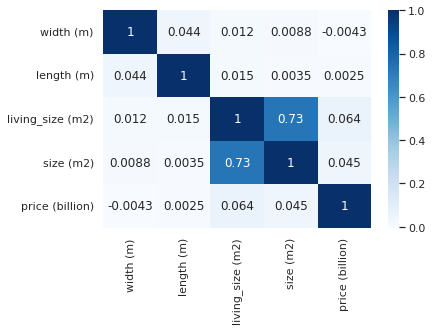

In [70]:
sns.heatmap(data=BDS_numeric.corr(), annot=True, cmap='Blues')


# 3. EDA


## 3.0 Repreprocessing


In [71]:
BDS_df.columns


Index(['list_time', 'ward', 'area', 'region', 'property_status', 'direction',
       'balconydirection', 'property_legal_document', 'size (m2)',
       'floornumber', 'furnishing_sell', 'rooms', 'toilets', 'floors',
       'living_size (m2)', 'width (m)', 'length (m)', 'price (million)',
       'type_details', 'website', 'front_road'],
      dtype='object')

                            ratio                  feature
feature                                                   
list_time                0.000000                list_time
region                   0.000000                   region
price (billion)          0.000000          price (billion)
website                  0.000000                  website
area                     0.000009                     area
type_details             0.000023             type_details
ward                     0.000445                     ward
size (m2)                0.000737                size (m2)
width (m)                0.205199                width (m)
property_legal_document  0.208374  property_legal_document
length (m)               0.223332               length (m)
floors                   0.227114                   floors
rooms                    0.228918                    rooms
front_road               0.450451               front_road
toilets                  0.699101                  toile

<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='ratio', ylabel='feature'>

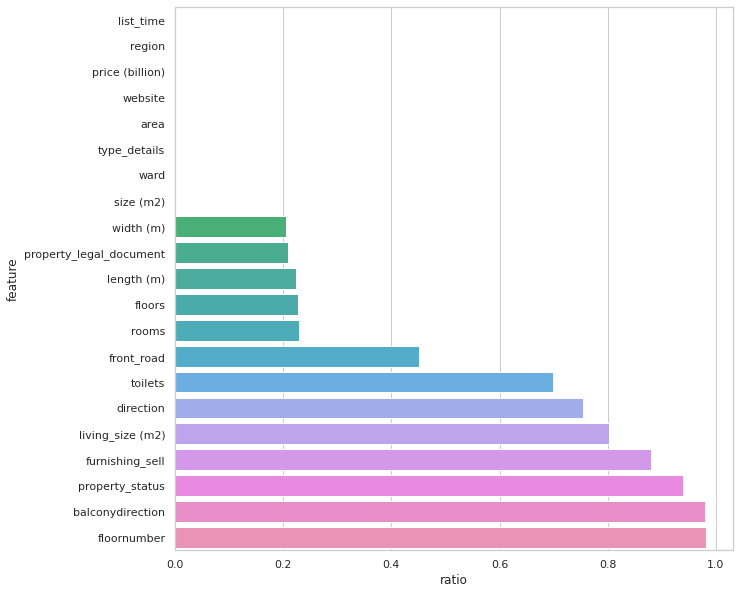

In [72]:
p = DPP.DataPreProcessor(BDS_df)
p.convert_unit("price (million)", 1000)
BDS_df.rename(columns={'price (million)': 'price (billion)'}, inplace=True)
missing_df = p.cal_ratio_missing_data(BDS_df.columns)
print(missing_df)
plt.figure(figsize=(10, 10))
sns.set(style="whitegrid", color_codes=False)
sns.barplot(y='feature', x='ratio', data=missing_df, orient='h')
plt.show()


In [73]:
BDS_df1 = BDS_df.copy()


### price


In [74]:
BDS_df1['price (billion)'].describe()


count    2.157370e+05
mean     8.090612e+03
std      3.751127e+06
min      3.700000e-04
25%      2.740000e+00
50%      5.300000e+00
75%      1.100000e+01
max      1.742304e+09
Name: price (billion), dtype: float64

In [75]:
BDS_df1[BDS_df1['price (billion)'] == max(BDS_df1['price (billion)'])]

list_time       ward           area          region property_status  \
47178  01/11/2021  Phường 15  Quận Tân Bình  Tp Hồ Chí Minh             NaN   

      direction balconydirection property_legal_document  size (m2)  \
47178       NaN              NaN                Đã có sổ       56.0   

       floornumber furnishing_sell rooms toilets        floors  \
47178          NaN             NaN     2       1  Nhiều hơn 10   

       living_size (m2)  width (m)  length (m)  price (billion) type_details  \
47178              56.0        4.0        14.0     1.742304e+09      Nhà ngõ   

      website  front_road  
47178  Chotot         NaN

In [76]:
BDS_df1[~(BDS_df1['price (billion)'] != max(BDS_df1['price (billion)']))].reset_index(drop=True, inplace=True)


In [77]:
price_mark = BDS_df1['price (billion)'].quantile(0.99)
price_mark


160.0

In [78]:
BDS_df1[BDS_df1['price (billion)'] > price_mark].describe(include='all')

list_time              ward    area       region property_status  \
count         2085              2083    2085         2085               3   
unique          67               175      42            4               2   
top     07/11/2021  Phường Bến Thành  Quận 1  Hồ Chí Minh     Đã bàn giao   
freq           639               324     767         1876               2   
mean           NaN               NaN     NaN          NaN             NaN   
std            NaN               NaN     NaN          NaN             NaN   
min            NaN               NaN     NaN          NaN             NaN   
25%            NaN               NaN     NaN          NaN             NaN   
50%            NaN               NaN     NaN          NaN             NaN   
75%            NaN               NaN     NaN          NaN             NaN   
max            NaN               NaN     NaN          NaN             NaN   

       direction balconydirection property_legal_document     size (m2)  \
count        153                1                    1030  2.085000e+03   
unique         8                1                       5           NaN   
top     Đông Nam         Đông Nam          Sổ hồng/ Sổ đỏ           NaN   
freq          45                1                     853           NaN   
mean         NaN              NaN                     NaN  6.102269e+04   
std          NaN              NaN                     NaN  2.194844e+06   
min          NaN              NaN                     NaN  1.500000e+01   
25%          NaN              NaN                     NaN  3.430000e+02   
50%          NaN              NaN                     NaN  6.470000e+02   
75%          NaN              NaN                     NaN  1.500000e+03   
max          NaN              NaN                     NaN  1.000000e+08   

        floornumber   furnishing_sell   rooms      toilets  floors  \
count      2.000000                18  1555.0           77  1607.0   
unique          NaN                 3   110.0            7    33.0   
top             NaN  Nội thất cao cấp     1.0  Nhiều hơn 6     1.0   
freq            NaN                10   246.0           21   316.0   
mean      13.500000               NaN     NaN          NaN     NaN   
std       13.435029               NaN     NaN          NaN     NaN   
min        4.000000               NaN     NaN          NaN     NaN   
25%        8.750000               NaN     NaN          NaN     NaN   
50%       13.500000               NaN     NaN          NaN     NaN   
75%       18.250000               NaN     NaN          NaN     NaN   
max       23.000000               NaN     NaN          NaN     NaN   

        living_size (m2)    width (m)    length (m)  price (billion)  \
count          51.000000  1514.000000   1484.000000     2.085000e+03   
unique               NaN          NaN           NaN              NaN   
top                  NaN          NaN           NaN              NaN   
freq                 NaN          NaN           NaN              NaN   
mean         1582.705882    32.979551     58.518834     8.360121e+05   
std          3496.144970   134.574135    293.735396     3.815671e+07   
min            45.000000     0.000000      0.000000     1.600500e+02   
25%           140.500000    12.000000     24.000000     1.990000e+02   
50%           308.000000    18.000000     31.000000     2.600000e+02   
75%          1180.500000    25.000000     46.000000     3.800000e+02   
max         20000.000000  3300.000000  10000.000000     1.742304e+09   

        type_details    website   front_road  
count           2085       2085  1870.000000  
unique            22          2          NaN  
top     Nhà mặt tiền  alonhadat          NaN  
freq            1321       1935          NaN  
mean             NaN        NaN    33.492727  
std              NaN        NaN    88.793615  
min              NaN        NaN     0.000000  
25%              NaN        NaN    20.000000  
50%              NaN        NaN    20.000000  
75%    

### _floor number_ (Cần thu thập thêm) => Loại


In [79]:
BDS_df1['floornumber'].unique()


array([ nan,  16.,   7.,   4.,  12.,   1.,  14.,  18.,  11.,  10.,   9.,
         3.,  29.,   2.,  15.,  22.,  21.,   8.,  19.,   6.,  20.,  35.,
        23.,  27.,  28.,   5.,  25.,  24.,  34.,  13.,  30.,  17.,  26.,
        40.,  37.,  36.,  32.,  33.,  38.,  47.,  39.,  31.,  41.,  45.,
       456.,  48., 320., 132.,  44.])

In [80]:
BDS_df1['floornumber'] = BDS_df1['floornumber'].apply(
    DPP.convertNum2Int, convert_dtype=False)


<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='price (billion)', ylabel='floornumber'>

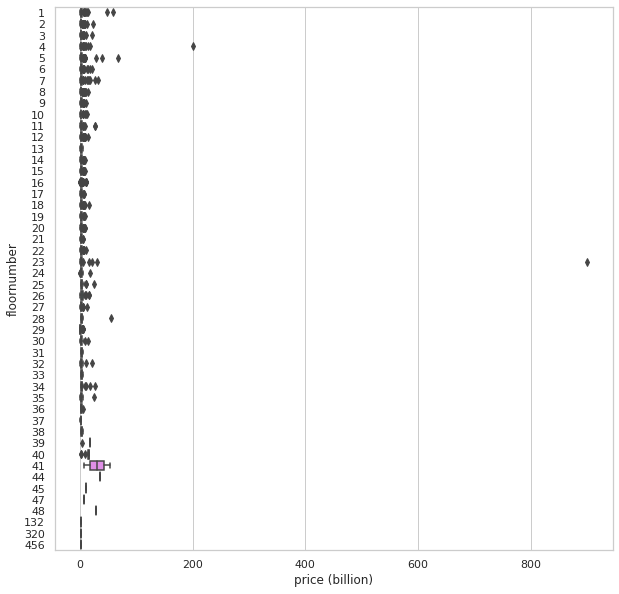

In [81]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=BDS_df1,
            y="floornumber", x='price (billion)', orient='h')


In [82]:
# Loại giá trị không hợp lý
BDS_df1 = BDS_df1[~((BDS_df1['price (billion)'] > 800) & (BDS_df1['size (m2)'] <= 100))]


In [83]:
# Loại giá trị không hợp lý
BDS_df1=BDS_df1[~((BDS_df1['price (billion)'] > 175) & (BDS_df1['floornumber'] < 10))]


In [84]:
# Loại bỏ giá trị tầng sô không tồn tại thực tế
BDS_df1[~(BDS_df1['floornumber'] >= 81)].reset_index(drop=True, inplace=True)


### _balcony direction_ (Loại)


In [85]:
BDS_df1['balconydirection'].unique()


array([nan, 'Nam', 'Đông Nam', 'Tây', 'Đông', 'Tây Nam', 'Tây Bắc', 'Bắc',
       'Đông Bắc'], dtype=object)

<Figure size 1800x720 with 0 Axes>

<AxesSubplot:xlabel='price (billion)', ylabel='balconydirection'>

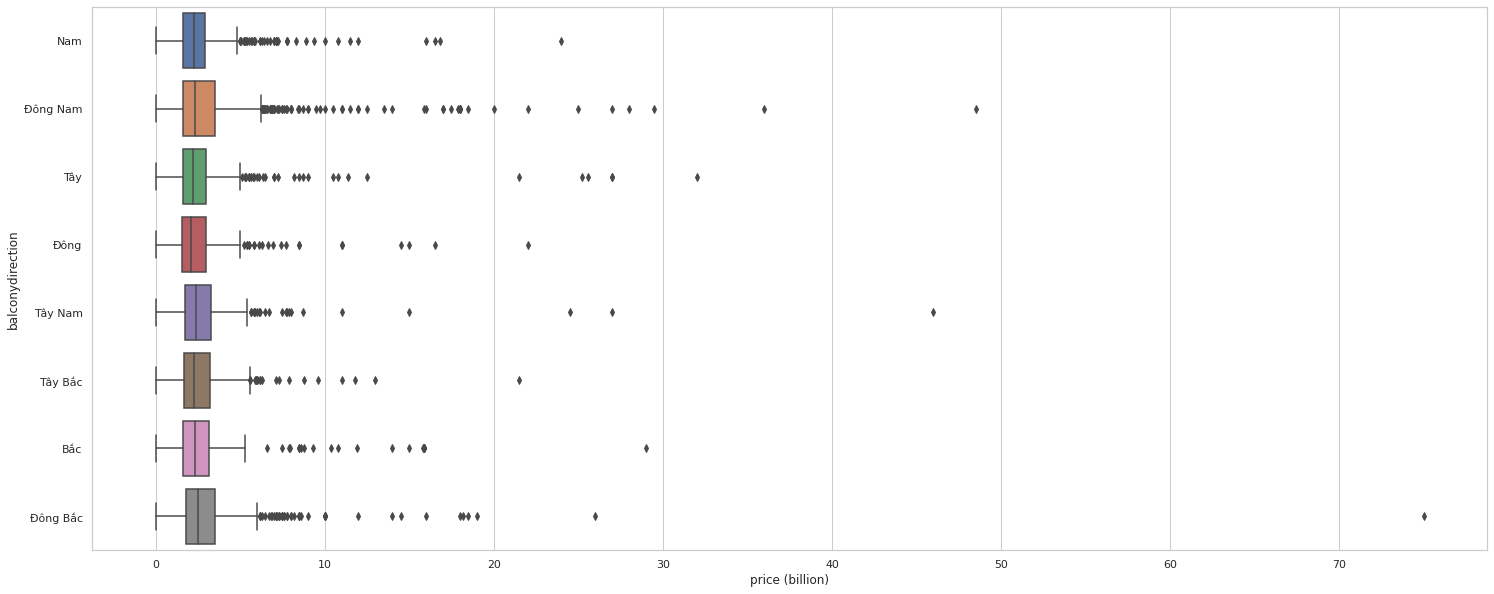

In [86]:
plt.figure(figsize=(25, 10))
sns.boxplot(data=BDS_df1,
            y="balconydirection", x='price (billion)', orient='h')


In [87]:
BDS_df1[(BDS_df1['price (billion)'] > 40)][pd.notnull(BDS_df1["balconydirection"])]


list_time            ward             area          region  \
22953  04/11/2021       Phường 22  Quận Bình Thạnh  Tp Hồ Chí Minh   
23197  04/11/2021  Phường Phú Hữu           Quận 9  Tp Hồ Chí Minh   
27952  20/10/2021   Phường Sơn Kỳ     Quận Tân Phú  Tp Hồ Chí Minh   

      property_status direction balconydirection property_legal_document  \
22953     Đã bàn giao  Đông Bắc         Đông Bắc                Đã có sổ   
23197     Đã bàn giao   Tây Nam          Tây Nam                Đã có sổ   
27952     Đã bàn giao  Đông Nam         Đông Nam                Đã có sổ   

       size (m2) floornumber   furnishing_sell rooms toilets        floors  \
22953      147.0         NaN  Nội thất cao cấp     4       3  Nhiều hơn 10   
23197      312.4         NaN      Bàn giao thô     2       3  Nhiều hơn 10   
27952       84.0           1               NaN     3       2  Nhiều hơn 10   

       living_size (m2)  width (m)  length (m)  price (billion)  \
22953               NaN        NaN         NaN             75.0   
23197               NaN        NaN         NaN             46.0   
27952               NaN        NaN         NaN             48.5   

         type_details website  front_road  
22953        Chung cư  Chotot         NaN  
23197  Căn hộ dịch vụ  Chotot         NaN  
27952        Chung cư  Chotot         NaN

### _property status_ (Loại)


In [88]:
BDS_df1['property_status'].unique()


array(['Đã bàn giao', 'Chưa bàn giao', nan], dtype=object)

<Figure size 504x720 with 0 Axes>

<AxesSubplot:xlabel='property_status', ylabel='price (billion)'>

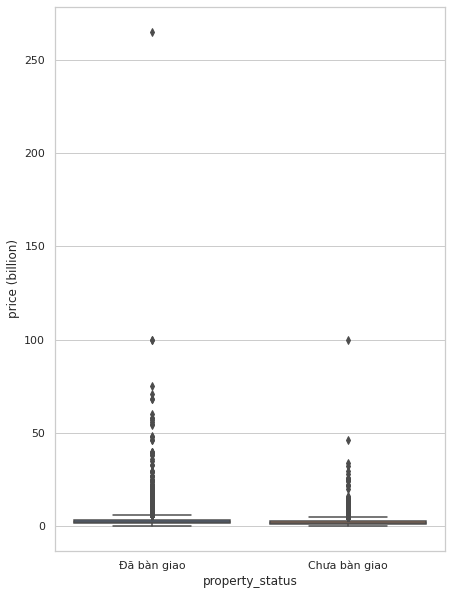

In [89]:
plt.figure(figsize=(7, 10))
sns.boxplot(data=BDS_df1, x="property_status", y="price (billion)")


### _furnishing_sell_ (Cần thu thập thêm) => Loại


In [90]:
BDS_df1["furnishing_sell"].unique()


array([nan, 'Nội thất đầy đủ', 'Hoàn thiện cơ bản', 'Bàn giao thô',
       'Nội thất cao cấp'], dtype=object)

<Figure size 504x720 with 0 Axes>

<AxesSubplot:xlabel='furnishing_sell', ylabel='price (billion)'>

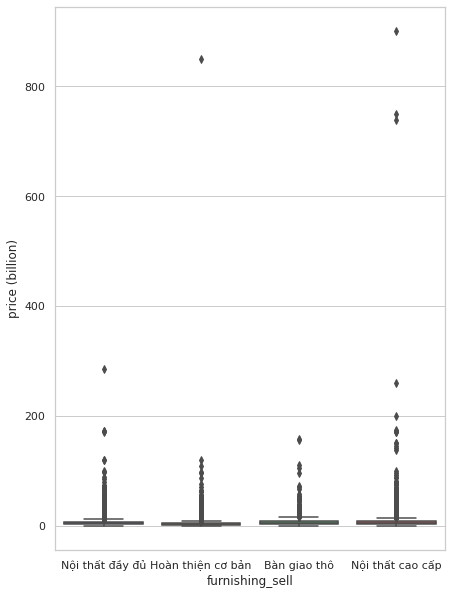

In [91]:
plt.figure(figsize=(7, 10))
sns.boxplot(data=BDS_df1, x="furnishing_sell", y="price (billion)")


### type_details


In [92]:
BDS_df1['type_details'].unique()


array(['Chung cư', 'Căn hộ dịch vụ', 'Duplex', 'Penthouse', 'Nhà mặt phố',
       'Nhà ngõ', 'Nhà phố liền kề', 'Nhà biệt thự', 'Đất thổ cư',
       'Đất nông nghiệp', 'Đất công nghiệp', 'Đất nền dự án', 'Tập thể',
       'Officetel', nan, 'Nhà mặt tiền', 'Nhà trong hẻm',
       'Đất thổ cư, đất ở', 'Căn hộ chung cư',
       'Đất nền, liền kề, đất dự án', 'Biệt thự, nhà liền kề',
       'Nhà hàng, khách sạn', 'Phòng trọ, nhà trọ', 'Kho, xưởng',
       'Đất nông, lâm nghiệp', 'Shop, kiot, quán', 'Mặt bằng',
       'Văn phòng', 'Trang trại', 'Các loại khác'], dtype=object)

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='price (billion)', ylabel='type_details'>

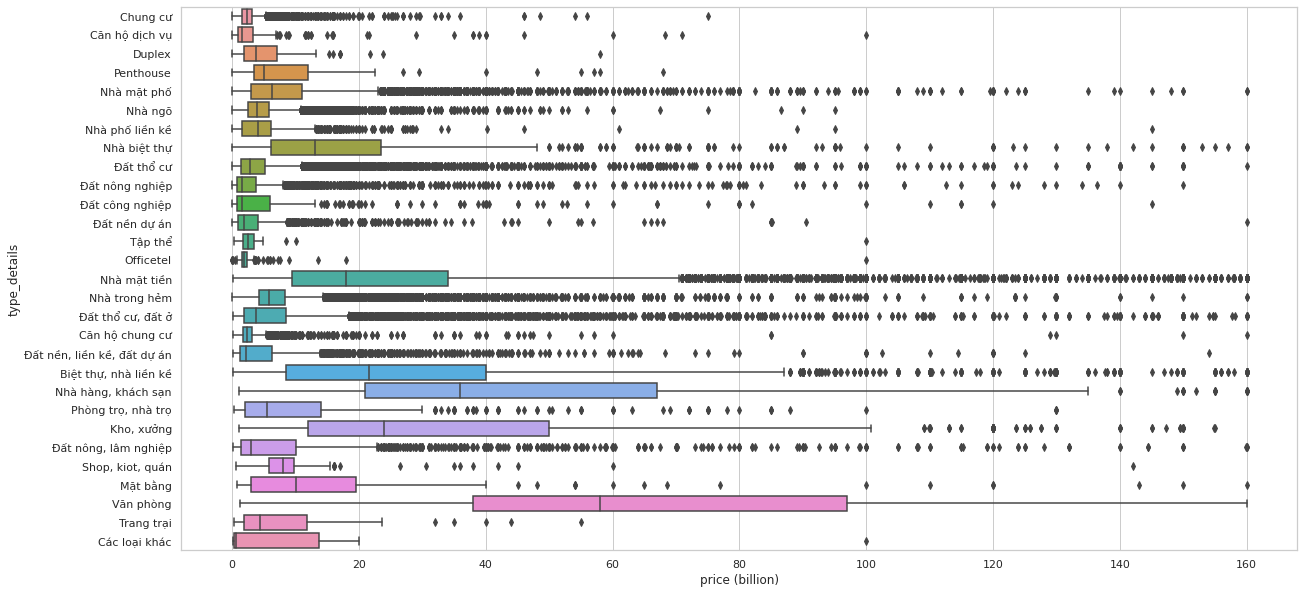

In [93]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=BDS_df1[BDS_df1['price (billion)'] <= price_mark],
            x="price (billion)", y="type_details", orient='h')


In [94]:
def group_value_type_real_estate(x):
    if x is np.nan:
        return x
    type_real_estate = {'Căn hộ/Chung cư': ['Chung cư',
                                            'Tập thể',
                                            'Officetel',
                                            'Căn hộ dịch vụ',
                                            'Duplex',
                                            'Penthouse',
                                            'Căn hộ chung cư'],
                        'Nhà ở': ['Nhà mặt phố',
                                  'Nhà ngõ',
                                  'Nhà phố liền kề',
                                  'Nhà biệt thự',
                                  'Nhà mặt tiền',
                                  'Nhà trong hẻm',
                                  'Biệt thự, nhà liền kề'],
                        'Đất': ['Đất thổ cư',
                                'Đất nông nghiệp',
                                'Đất công nghiệp',
                                'Đất nền dự án',
                                'Đất thổ cư, đất ở',
                                'Đất nền, liền kề, đất dự án',
                                'Đất nông, lâm nghiệp'],
                        'Khác': ['Nhà hàng, khách sạn',
                                 'Phòng trọ, nhà trọ',
                                 'Kho, xưởng',
                                 'Shop, kiot, quán',
                                 'Mặt bằng',
                                 'Văn phòng',
                                 'Trang trại',
                                 'Các loại khác']}
    for key, value in type_real_estate.items():
        if x in value:
            return key
    return x


In [95]:
BDS_df1["type_real_estate"] = BDS_df1["type_details"].apply(
    group_value_type_real_estate)


In [96]:
BDS_df1["type_details"].replace({'Chung cư': 'Căn hộ chung cư',
                                'Nhà trong hẻm': 'Nhà ngõ',
                                 'Đất thổ cư, đất ở': 'Đất thổ cư',
                                 'Đất nền, liền kề, đất dự án': 'Đất nền dự án',
                                 'Đất nông nghiệp': 'Đất nông, lâm nghiệp',
                                 'Nhà mặt phố': 'Nhà mặt tiền',
                                 'Nhà biệt thự': 'Biệt thự, nhà liền kề',
                                 'Nhà phố liền kề': 'Biệt thự, nhà liền kề'}, inplace=True)


<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='price (billion)', ylabel='type_real_estate'>

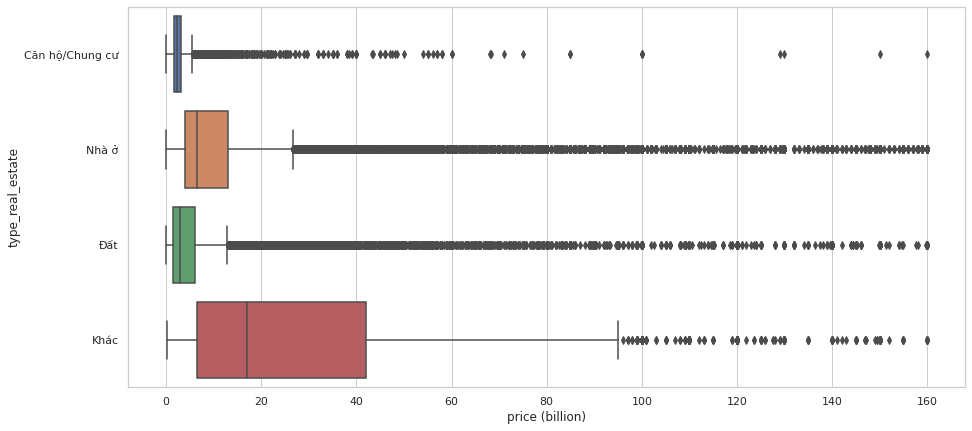

In [97]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=BDS_df1[BDS_df1['price (billion)'] <= price_mark],
            x="price (billion)", y="type_real_estate", orient='h')


### length, width, size


In [98]:
BDS_df1['length (m)'] = BDS_df1['length (m)'].apply(
    lambda x: np.nan if x == 0 else x)
BDS_df1['width (m)'] = BDS_df1['width (m)'].apply(
    lambda x: np.nan if x == 0 else x)


<AxesSubplot:xlabel='length (m)', ylabel='price (billion)'>

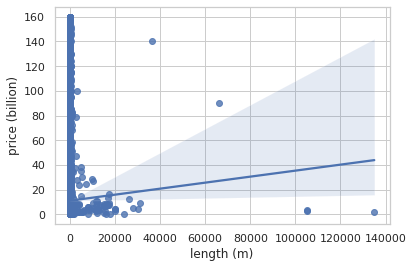

In [99]:
sns.regplot(data=BDS_df1[BDS_df1['price (billion)'] <=
            price_mark], x="length (m)", y="price (billion)")


In [100]:
BDS_df1['length (m)'].describe()


count    167160.000000
mean         30.307550
std         594.900765
min           0.580000
25%          12.500000
50%          17.000000
75%          22.000000
max      135000.000000
Name: length (m), dtype: float64

In [101]:
BDS_df1['length (m)'].quantile(0.99)


120.0

In [102]:
len(BDS_df1[BDS_df1['length (m)'] >= BDS_df1['length (m)'].quantile(0.99)]), len(BDS_df1)


(1782, 215722)

In [103]:
BDS_df1[~(BDS_df1['length (m)'] >=
           BDS_df1['length (m)'].quantile(0.99))].reset_index(drop=True, inplace=True)


<AxesSubplot:xlabel='width (m)', ylabel='price (billion)'>

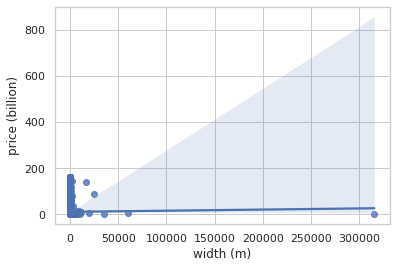

In [104]:
sns.regplot(data=BDS_df1[BDS_df1['price (billion)'] <=
                         price_mark], x="width (m)", y="price (billion)")


<AxesSubplot:xlabel='length (m)', ylabel='price (billion)'>

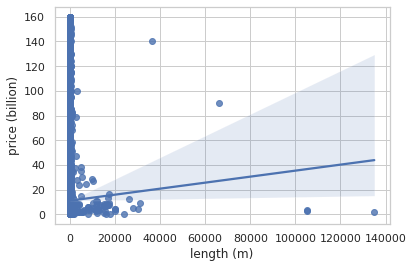

In [105]:
sns.regplot(data=BDS_df1[BDS_df1['price (billion)'] <=
            price_mark], x="length (m)", y="price (billion)")


In [106]:
BDS_df1['width (m)'].describe()


count    171081.000000
mean         13.903800
std         793.145628
min           0.130000
25%           4.000000
50%           5.000000
75%           6.500000
max      315375.000000
Name: width (m), dtype: float64

In [107]:
BDS_df1[BDS_df1['width (m)'] == 315375]


list_time             ward           area          region  \
65598  18/10/2021  Phường An Lạc A  Quận Bình Tân  Tp Hồ Chí Minh   

      property_status direction balconydirection property_legal_document  \
65598             NaN       Tây              NaN                Đã có sổ   

       size (m2) floornumber    furnishing_sell         rooms      toilets  \
65598       83.0         NaN  Hoàn thiện cơ bản  Nhiều hơn 10  Nhiều hơn 6   

      floors  living_size (m2)  width (m)  length (m)  price (billion)  \
65598      4             229.0   315375.0        26.0             0.16   

       type_details website  front_road type_real_estate  
65598  Nhà mặt tiền  Chotot         NaN            Nhà ở

In [108]:
BDS_df1['width (m)'].quantile(0.99)


74.0

In [109]:
len(BDS_df1[BDS_df1['width (m)'] >= BDS_df1['width (m)'].quantile(0.99)]), len(BDS_df1)


(1712, 215722)

In [110]:
BDS_df1 = BDS_df1[~(BDS_df1['width (m)'] >= BDS_df1['width (m)'].quantile(0.99))].reset_index(drop=True)


In [111]:
# Xử lý các giá trị NaN tại size và living size
for i in range(len(BDS_df1)):
    # Nếu size = NaN và living_size != NaN thì gán size = living_size
    if (np.isnan(BDS_df1.loc[i, "size (m2)"])) & (not np.isnan(BDS_df1.loc[i, "living_size (m2)"])):
        BDS_df1.at[i, "size (m2)"] = BDS_df1.loc[i,
                                                 "living_size (m2)"]
    # Nếu size = NaN và living_size = NaN thì gán size = length*width
    elif np.isnan(BDS_df1.loc[i, "size (m2)"]) & (np.isnan(BDS_df1.loc[i, "living_size (m2)"])):
        BDS_df1.at[i, "size (m2)"] = BDS_df1.loc[i,
                                                 "length (m)"]*BDS_df1.loc[i, "width (m)"]

    if np.isnan(BDS_df1.loc[i, "living_size (m2)"]):
        if not np.isnan(BDS_df1.loc[i, "size (m2)"]):
            if str(BDS_df1.loc[i, "floors"]) != 'nan':
                # Nếu floors != NaN thì living_size = size*floors
                # Nếu floors == Nhiều hơn 10 thì living_size = size*10
                try:
                    BDS_df1.at[i, "living_size (m2)"] = BDS_df1.loc[i,
                                                                    "size (m2)"]*BDS_df1.loc[i, "floors"]
                except:
                    BDS_df1.at[i,
                               "living_size (m2)"] = BDS_df1.loc[i, "size (m2)"]*10
            else:
                # Nếu floors == NaN thì living_size = size
                BDS_df1.at[i, "living_size (m2)"] = BDS_df1.loc[i,
                                                                "size (m2)"]


In [112]:
# Xử lý NaN length và width
for i in range(len(BDS_df1)):
    if not np.isnan(BDS_df1.loc[i, "size (m2)"]):

        if np.isnan(BDS_df1.loc[i, "length (m)"]) & np.isnan(BDS_df1.loc[i, "width (m)"]):
            continue

        elif np.isnan(BDS_df1.loc[i, "length (m)"]):
            BDS_df1.loc[i, "length (m)"] = round(
                BDS_df1.loc[i, "size (m2)"]/BDS_df1.loc[i, "width (m)"], 5)

        elif np.isnan(BDS_df1.loc[i, "width (m)"]):
            BDS_df1.loc[i, "width (m)"] = round(
                BDS_df1.loc[i, "size (m2)"]/BDS_df1.loc[i, "length (m)"], 5)


In [113]:
len(BDS_df1[["length (m)", "width (m)", "floors", "size (m2)", "living_size (m2)"]
            ][(BDS_df1["living_size (m2)"].isna()) | (BDS_df1["living_size (m2)"].isna())]), len(BDS_df1)


(109, 214010)

In [114]:
len(BDS_df1[(BDS_df1["length (m)"].isna()) | (BDS_df1["width (m)"].isna())])


44112

In [115]:
BDS_df1[(BDS_df1["length (m)"].isna()) | (
    BDS_df1["length (m)"].isna())].sample(5)


list_time              ward          area          region  \
162088  06/11/2021     Phường An Phú        Quận 2     Hồ Chí Minh   
21461   05/11/2021          Phường 7        Quận 8  Tp Hồ Chí Minh   
195016  07/11/2021  Phường Bến Thành        Quận 1     Hồ Chí Minh   
10643   21/09/2021    Phường Bình An  Thị xã Dĩ An      Bình Dương   
187296  07/11/2021        Xã Bình Mỹ  Huyện Củ Chi     Hồ Chí Minh   

       property_status direction balconydirection property_legal_document  \
162088             NaN       NaN              NaN                     NaN   
21461    Chưa bàn giao   Tây Bắc         Đông Nam             Đang chờ sổ   
195016             NaN       NaN              NaN          Sổ hồng/ Sổ đỏ   
10643      Đã bàn giao  Đông Nam         Đông Nam                Đã có sổ   
187296             NaN       NaN              NaN                     NaN   

        size (m2) floornumber    furnishing_sell rooms toilets        floors  \
162088      100.0         NaN                NaN   6.0     NaN           5.0   
21461        62.0         NaN  Hoàn thiện cơ bản     2       2  Nhiều hơn 10   
195016      120.0         NaN                NaN  12.0     NaN           5.0   
10643        36.0           1       Bàn giao thô     2       2  Nhiều hơn 10   
187296       80.0         NaN                NaN   NaN     NaN           NaN   

        living_size (m2)  width (m)  length (m)  price (billion)  \
162088             500.0        NaN         NaN            22.00   
21461              620.0        NaN         NaN             1.72   
195016             600.0        NaN         NaN            60.00   
10643              360.0        NaN         NaN             1.25   
187296              80.0        NaN         NaN             1.50   

           type_details    website  front_road type_real_estate  
162088     Nhà mặt tiền  alonhadat         8.0            Nhà ở  
21461   Căn hộ chung cư     Chotot         NaN  Căn hộ/Chung cư  
195016     Nhà mặt tiền  alonhadat        16.0            Nhà ở  
10643           Tập thể     Chotot         NaN  Căn hộ/Chung cư  
187296    Đất nền dự án  alonhadat         8.0              Đất

### living size vs size


In [116]:
# plt.figure(figsize=(10, 10))
# ax = sns.lineplot(data=BDS_df1[BDS_df1['price (billion)'] <=
#                                price_mark], y='size (m2)', x="price (billion)", linestyle='-.', label="size")
# sns.lineplot(data=BDS_df1[BDS_df1['price (billion)'] <=
#                           price_mark], y='living_size (m2)', x="price (billion)", linestyle='--', label="living_size", ax=ax)


In [117]:
BDS_df1['living_size (m2)'].describe()


count    2.139010e+05
mean     6.580006e+04
std      2.065347e+07
min      1.000000e+00
25%      1.000000e+02
50%      2.040000e+02
75%      5.500000e+02
max      9.000000e+09
Name: living_size (m2), dtype: float64

In [118]:
BDS_df1.to_csv('data version/BDS_df1_new.csv', index=False)


### direction


In [119]:
BDS_df1.to_csv('data version/BDS_df1_new.csv', index=False)


In [120]:
BDS_df2 = BDS_df1.copy()


In [121]:
BDS_df2["direction"].unique()


array([nan, 'Bắc', 'Đông Bắc', 'Đông Nam', 'Đông', 'Tây Bắc', 'Tây',
       'Nam', 'Tây Nam'], dtype=object)

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='direction', ylabel='price (billion)'>

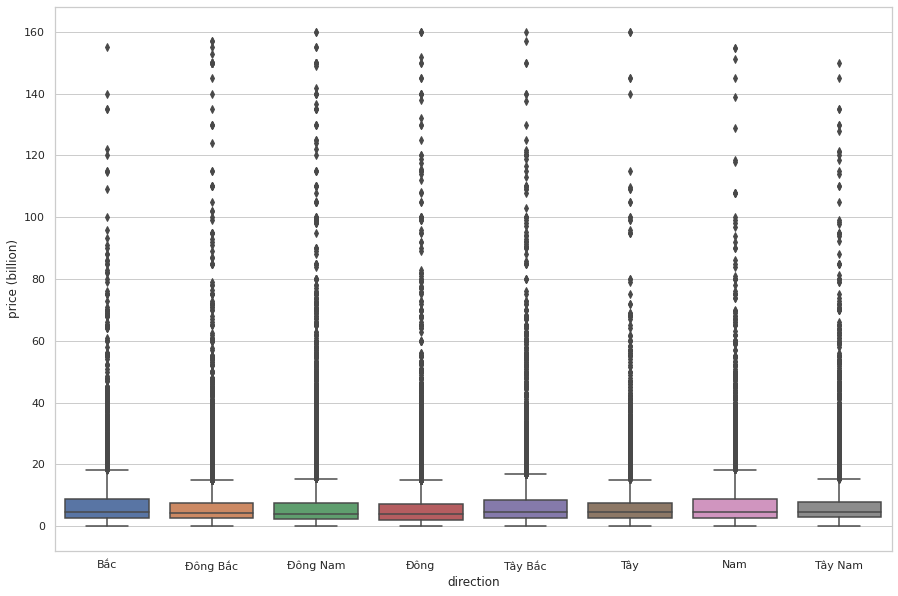

In [122]:
plt.figure(figsize=(15,10))
sns.boxplot(data=BDS_df1[BDS_df1['price (billion)'] <= price_mark],
            x="direction", y="price (billion)")

In [123]:
BDS_df2.to_csv('data version/BDS_df2_new.csv', index=False)


### DF2


In [124]:
BDS_df2 = pd.read_csv('data version/BDS_df2_new.csv')


### toilets


In [125]:
BDS_df3 = BDS_df2.copy()


In [126]:
BDS_df3['toilets'].unique()


array(['2', '1', nan, '5', '3', 'Nhiều hơn 6', '4', '6'], dtype=object)

In [127]:
BDS_df3['toilets'] = BDS_df3['toilets'].apply(
    DPP.convertNum2Int, convert_dtype=False)
# BDS_df3['toilets'] = BDS_df3['toilets'].astype('category')


<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='toilets', ylabel='price (billion)'>

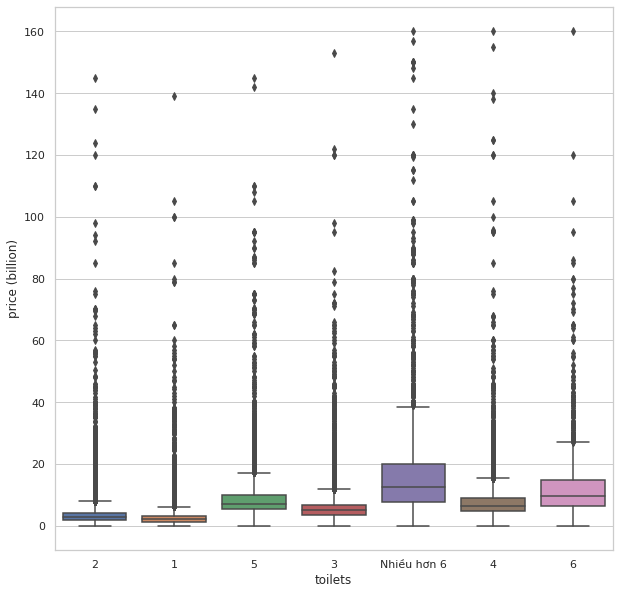

In [128]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=BDS_df3[BDS_df3['price (billion)'] <=
            price_mark], x="toilets", y="price (billion)")


In [129]:
for i in range(BDS_df3.shape[0]):
    if BDS_df3.loc[i,'type_real_estate'] == 'Đất' and pd.isna(BDS_df3.loc[i,'toilets']):
        BDS_df3.at[i,'toilets'] = 0

In [130]:
# # plt.figure(figsize=(10, 10))
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharex=True)

# sns.boxplot(data=BDS_df1[BDS_df1['price (billion)'] <= price_mark],
#             x="toilets", y="price (billion)", ax=axes[0])
# axes[0].set_title("Chưa điền giá trị")
# sns.boxplot(data=BDS_df3[BDS_df3['price (billion)'] <= price_mark],
#             x="toilets", y="price (billion)", ax=axes[1])
# axes[1].set_title("Đã điền giá trị")


In [131]:
BDS_df3.to_csv('data version/BDS_df3_new.csv', index=False)


### DF3


In [132]:
BDS_df3 = pd.read_csv('data version/BDS_df3_new.csv')


### front road


In [133]:
BDS_df4 = BDS_df3.copy()


In [134]:
BDS_df4['front_road'].describe()


count    117859.000000
mean         11.141272
std          17.858261
min           0.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         825.000000
Name: front_road, dtype: float64

<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='front_road', ylabel='price (billion)'>

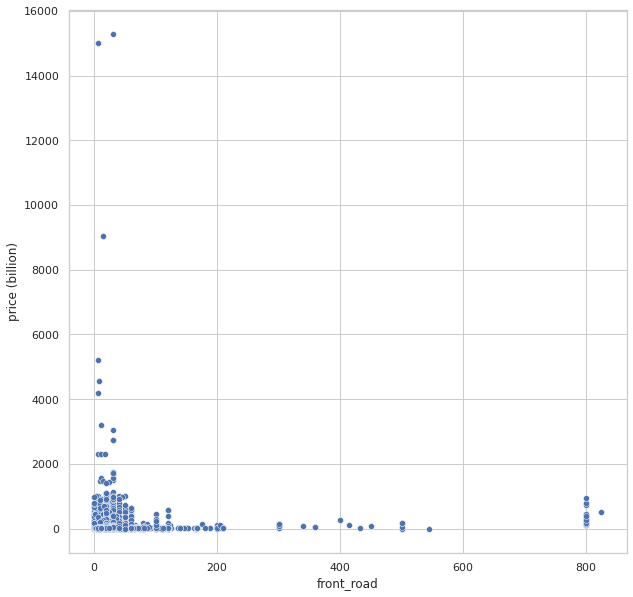

In [135]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=BDS_df4, x="front_road", y="price (billion)")


In [136]:
BDS_df4['front_road'].quantile(0.99)


40.0

In [137]:
BDS_df4 = BDS_df4[~(BDS_df4['front_road'] > BDS_df4['front_road'].quantile(0.99))].reset_index(drop=True)


In [138]:
BDS_df4['front_road'].isna().sum()


96151

### region


In [139]:
BDS_df4['region'].unique()


array(['Đồng Nai', 'Bình Dương', 'Tp Hồ Chí Minh', 'Hồ Chí Minh'],
      dtype=object)

In [140]:
BDS_df4['region'].replace({'Tp Hồ Chí Minh': 'Hồ Chí Minh'}, inplace=True)


<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='region', ylabel='price (billion)'>

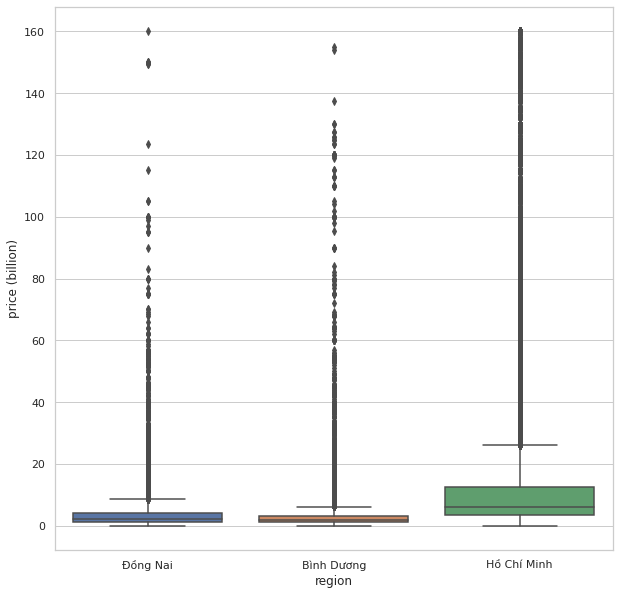

In [141]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=BDS_df4[BDS_df4['price (billion)'] <=
            price_mark], x="region", y="price (billion)")


### area


In [142]:
region_cols = ['ward', 'area', 'region']
BDS_df4[region_cols].groupby(
    region_cols[1:]).count().sort_values(axis=0, by=['region'])


ward
area                  region            
Huyện Bàu Bàng        Bình Dương    1075
Thị xã Bến Cát        Bình Dương    2165
Thành phố Thủ Dầu Một Bình Dương    2833
Thành phố Thuận An    Bình Dương    3509
Thành phố Dĩ An       Bình Dương    1016
Thị xã Dĩ An          Bình Dương    2801
Huyện Phú Giáo        Bình Dương     205
Thị xã Tân Uyên       Bình Dương    1789
Huyện Dầu Tiếng       Bình Dương     402
Huyện Bắc Tân Uyên    Bình Dương     447
Quận 7                Hồ Chí Minh   7926
Quận 8                Hồ Chí Minh   4564
Quận 9                Hồ Chí Minh   8351
Quận Bình Thạnh       Hồ Chí Minh  12773
Quận Bình Tân         Hồ Chí Minh  11361
Quận Bắc Từ Liêm      Hồ Chí Minh      1
Quận Gò Vấp           Hồ Chí Minh  19892
Quận Thủ Đức          Hồ Chí Minh   4347
Huyện Hóc Môn         Hồ Chí Minh   4104
Quận Tân Bình         Hồ Chí Minh  15008
Quận Tân Phú          Hồ Chí Minh  13388
Huyện Cần Giờ         Hồ Chí Minh    397
Thành phố Thủ Đức     Hồ Chí Minh   3687
Huyện Bình Chánh      Hồ Chí Minh   7080
Quận Phú Nhuận        Hồ Chí Minh   7689
Quận 6                Hồ Chí Minh   2976
Quận 3                Hồ Chí Minh   6269
Quận 4                Hồ Chí Minh   1607
Huyện Củ Chi          Hồ Chí Minh   7963
Quận 2                Hồ Chí Minh   5066
Quận 12               Hồ Chí Minh   9103
Quận 11               Hồ Chí Minh   2880
Quận 10               Hồ Chí Minh   7925
Quận 1                Hồ Chí Minh   7403
Huyện Nhà Bè          Hồ Chí Minh   4816
Quận 5                Hồ Chí Minh   2494
Huyện Nhơn Trạch      Đồng Nai      1283
Huyện Thống Nhất      Đồng Nai       382
Huyện Trảng Bom       Đồng Nai      2070
Thành phố Long Khánh  Đồng Nai       831
Huyện Tân Phú         Đồng Nai       106
Thành phố Biên Hòa    Đồng Nai      3179
Thành phố Biên Hoà    Đồng Nai      4661
Huyện Vĩnh Cửu        Đồng Nai       917
Huyện Xuân Lộc        Đồng Nai       442
Huyện Định Quán       Đồng Nai       909
Huyện Cẩm Mỹ          Đồng Nai       502
Huyện Long Thành      Đồng Nai      2240

In [143]:
BDS_df4.replace({'Thị xã Dĩ An': 'Thành phố Dĩ An',
                'Thành phố Biên Hoà': 'Thành phố Biên Hòa',
                 'Quận Thủ Đức': 'Thành phố Thủ Đức'}, inplace=True)


In [144]:
BDS_df4 = BDS_df4[BDS_df4['area'] != "Quận Bắc Từ Liêm"].reset_index(drop=True)


<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'Giá bất động sản ở Tp Hồ Chí Minh')

<AxesSubplot:title={'center':'Giá bất động sản ở Tp Hồ Chí Minh'}, xlabel='price (billion)', ylabel='area'>

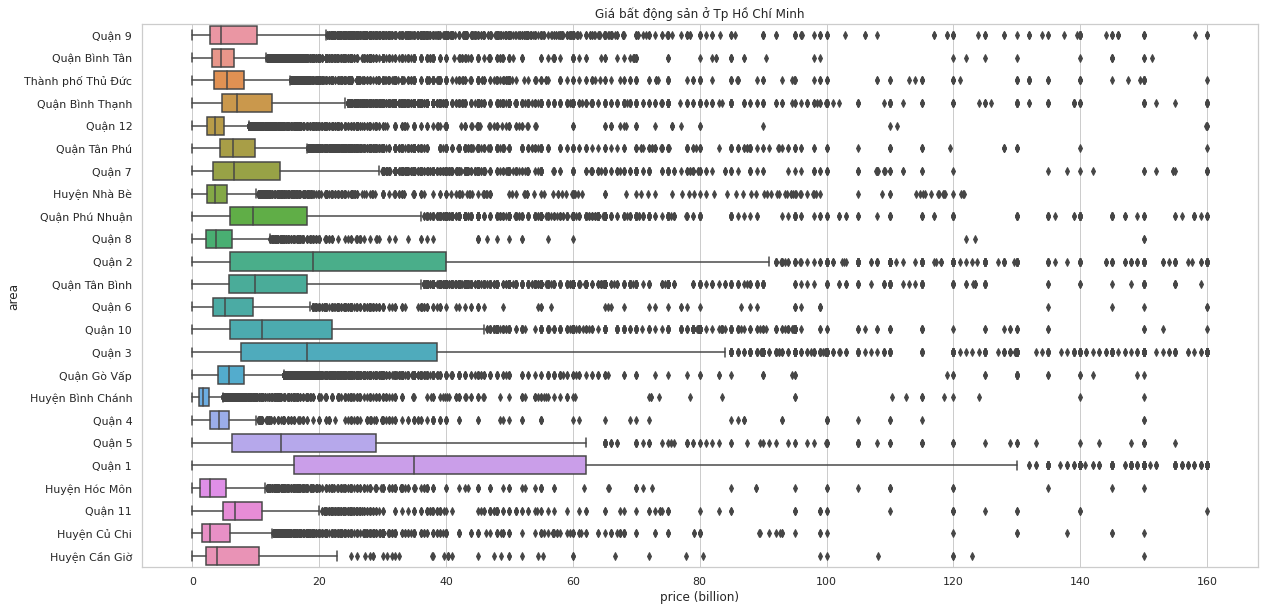

In [145]:
plt.figure(figsize=(20, 10))
# sns.countplot(x='region',data=BDS_df4)
BDS_HCM = BDS_df4[(BDS_df4['price (billion)'] <= price_mark)
                  & (BDS_df4['region'] == "Hồ Chí Minh")]
plt.title("Giá bất động sản ở Tp Hồ Chí Minh")
sns.boxplot(y='area', x='price (billion)', orient='h', data=BDS_HCM)


<Figure size 1440x360 with 0 Axes>

Text(0.5, 1.0, 'Giá bất động sản ở Bình Dương')

<AxesSubplot:title={'center':'Giá bất động sản ở Bình Dương'}, xlabel='price (billion)', ylabel='area'>

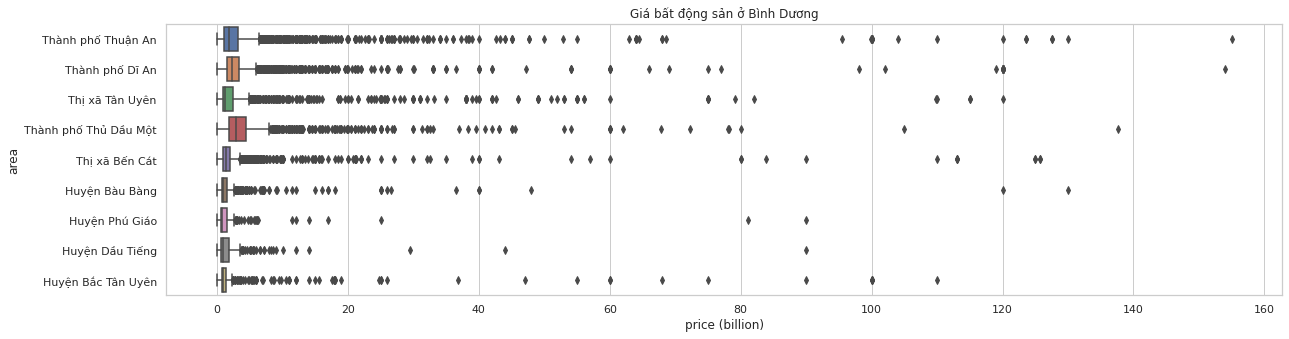

In [146]:
plt.figure(figsize=(20, 5))
# sns.countplot(x='region',data=BDS_df4)
BDS_BD = BDS_df4[(BDS_df4['price (billion)'] <= price_mark)
                 & (BDS_df4['region'] == "Bình Dương")]
plt.title("Giá bất động sản ở Bình Dương")
sns.boxplot(y='area', x='price (billion)', orient='h', data=BDS_BD)


<Figure size 1440x360 with 0 Axes>

Text(0.5, 1.0, 'Giá bất động sản ở Đồng Nai')

<AxesSubplot:title={'center':'Giá bất động sản ở Đồng Nai'}, xlabel='price (billion)', ylabel='area'>

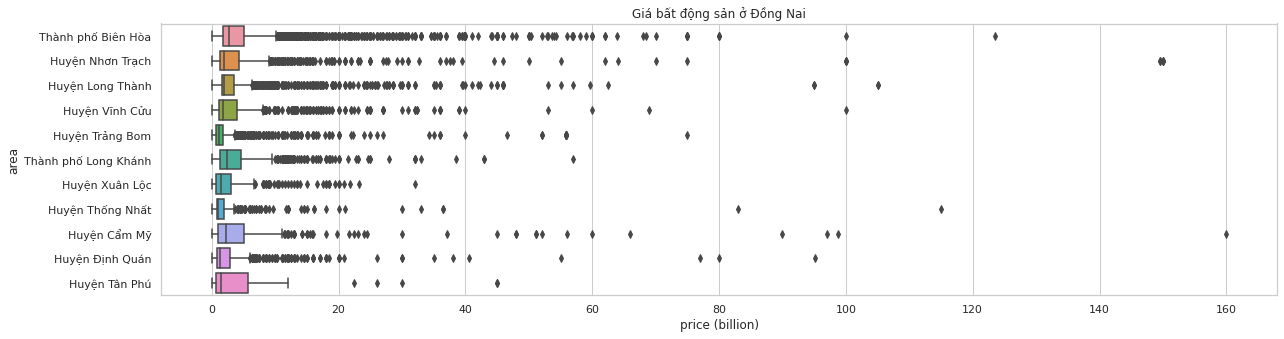

In [147]:
plt.figure(figsize=(20, 5))
# sns.countplot(x='region',data=BDS_df4)
BDS_DN = BDS_df4[(BDS_df4['price (billion)'] <= price_mark)
                 & (BDS_df4['region'] == "Đồng Nai")]
plt.title("Giá bất động sản ở Đồng Nai")
sns.boxplot(y='area', x='price (billion)', orient='h', data=BDS_DN)


In [148]:
BDS_df4.to_csv('data version/BDS_df4_new.csv', index=False)


### DF4


In [149]:
BDS_df4 = pd.read_csv('data version/BDS_df4_new.csv')


### ward


In [150]:
BDS_df5 = BDS_df4.copy()


In [151]:
BDS_df5['ward'].unique()


array(['Phường Tam Hòa', 'Phường Thống Nhất', 'Phường Hố Nai',
       'Phường Hoá An', 'Phường Bửu Long', 'Xã Đại Phước', 'Xã Phước An',
       'Phường An Bình', 'Phường Phước Tân', 'Phường Hòa Bình',
       'Phường Thanh Bình', 'Phường Quyết Thắng', 'Phường Tam Hiệp',
       'Phường Tân Hiệp', 'Phường Tân Biên', 'Phường Quang Vinh',
       'Phường Trảng Dài', 'Xã Long Đức', 'Thị trấn Long Thành',
       'Xã Long Hưng', 'Phường Long Bình Tân', 'Phường Tân Vạn',
       'Xã Cẩm Đường', 'Phường Tam Phước', 'Phường Tân Phong',
       'Xã Thạnh Phú', 'Xã Hố Nai 3', 'Phường Bửu Hòa', 'Xã Tây Hoà',
       'Phường Tân Mai', 'Phường Bình Đa', 'Phường Long Bình',
       'Xã Bình Hòa', 'Phường Tân Tiến', 'Phường Tân Hạnh', 'Xã Bắc Sơn',
       'Thị trấn Trảng Bom', 'Phường Bảo Vinh', 'Xã Trung Hoà',
       'Phường An Hoà', 'Thị trấn Hiệp Phước', 'Xã An Phước',
       'Phường Trung Dũng', 'Xã Quảng Tiến', 'Xã Xuân Bắc',
       'Xã Thiện Tân', 'Xã Bình Lợi', 'Xã Hưng Thịnh', 'Xã An Viễn',
       'X

In [152]:
BDS_df5['ward'].replace(
    {"xã Tân An Hội Xã Tân An Hội": "Xã Tân An Hội"}, inplace=True)


In [153]:
def replace_error_value(x):
    '''
        Kiểm tra và thay thế các giá trị không đúng định dạng trong thuộc tính ward
        Giá trị bắt đầu là "Xã", "Phường", "Thị trấn" là hợp lệ

        Parameters
        ----------
            - x (string): chuỗi giá trị cần kiểm tra

        Returns
        ----------
            - Kết quả sau khi kiểm tra
    '''
    if isinstance(x, (int, float)) or x == np.nan:
        return np.nan

    temp = x.lower()
    if temp.startswith(('xã', 'phường', 'thị trấn')):
        return x

    return np.nan


BDS_df5['ward'] = BDS_df5['ward'].apply(replace_error_value)


In [154]:
region_cols = ['ward', 'area', 'region']
BDS_df5[region_cols].groupby(
    region_cols).all().sort_values(axis=0, by=['region', 'area'])


Empty DataFrame
Columns: []
Index: [(Thị Trấn Bàu Bàng, Huyện Bàu Bàng, Bình Dương), (Thị trấn Lai Uyên, Huyện Bàu Bàng, Bình Dương), (Xã Cây Trường II, Huyện Bàu Bàng, Bình Dương), (Xã Hưng Hòa, Huyện Bàu Bàng, Bình Dương), (Xã Lai Hưng, Huyện Bàu Bàng, Bình Dương), (Xã Long Nguyên, Huyện Bàu Bàng, Bình Dương), (Xã Trừ Văn Thố, Huyện Bàu Bàng, Bình Dương), (Xã Tân Hưng, Huyện Bàu Bàng, Bình Dương), (Thị trấn Tân Thành, Huyện Bắc Tân Uyên, Bình Dương), (Xã Bình Mỹ, Huyện Bắc Tân Uyên, Bình Dương), (Xã Hiếu Liêm, Huyện Bắc Tân Uyên, Bình Dương), (Xã Lạc An, Huyện Bắc Tân Uyên, Bình Dương), (Xã Thường Tân, Huyện Bắc Tân Uyên, Bình Dương), (Xã Tân Bình, Huyện Bắc Tân Uyên, Bình Dương), (Xã Tân Lập, Huyện Bắc Tân Uyên, Bình Dương), (Xã Tân Mỹ, Huyện Bắc Tân Uyên, Bình Dương), (Xã Tân Thành, Huyện Bắc Tân Uyên, Bình Dương), (Xã Tân Định, Huyện Bắc Tân Uyên, Bình Dương), (Xã Đất Cuốc, Huyện Bắc Tân Uyên, Bình Dương), (Thị trấn Dầu Tiếng, Huyện Dầu Tiếng, Bình Dương), (Xã An Lập, Huyện Dầu Tiếng, Bình Dương), (Xã Long Hoà, Huyện Dầu Tiếng, Bình Dương), (Xã Long Hòa, Huyện Dầu Tiếng, Bình Dương), (Xã Long Tân, Huyện Dầu Tiếng, Bình Dương), (Xã Minh Hoà, Huyện Dầu Tiếng, Bình Dương), (Xã Minh Hòa, Huyện Dầu Tiếng, Bình Dương), (Xã Minh Thạnh, Huyện Dầu Tiếng, Bình Dương), (Xã Minh Tân, Huyện Dầu Tiếng, Bình Dương), (Xã Thanh An, Huyện Dầu Tiếng, Bình Dương), (Xã Thanh Tuyền, Huyện Dầu Tiếng, Bình Dương), (Xã Định  Hiệp, Huyện Dầu Tiếng, Bình Dương), (Xã Định An, Huyện Dầu Tiếng, Bình Dương), (Xã Định Hiệp, Huyện Dầu Tiếng, Bình Dương), (Xã Định Thành, Huyện Dầu Tiếng, Bình Dương), (Thị trấn Phước Vĩnh, Huyện Phú Giáo, Bình Dương), (Xã An Bình, Huyện Phú Giáo, Bình Dương), (Xã An Linh, Huyện Phú Giáo, Bình Dương), (Xã An Long, Huyện Phú Giáo, Bình Dương), (Xã An Thái, Huyện Phú Giáo, Bình Dương), (Xã Phước Hoà, Huyện Phú Giáo, Bình Dương), (Xã Phước Hòa, Huyện Phú Giáo, Bình Dương), (Xã Phước Sang, Huyện Phú Giáo, Bình Dương), (Xã Tam Lập, Huyện Phú Giáo, Bình Dương), (Xã Tân Hiệp, Huyện Phú Giáo, Bình Dương), (Xã Tân Long, Huyện Phú Giáo, Bình Dương), (Xã Vĩnh Hoà, Huyện Phú Giáo, Bình Dương), (Xã Vĩnh Hòa, Huyện Phú Giáo, Bình Dương), (Phường An Bình, Thành phố Dĩ An, Bình Dương), (Phường Bình An, Thành phố Dĩ An, Bình Dương), (Phường Bình Thắng, Thành phố Dĩ An, Bình Dương), (Phường Dĩ An, Thành phố Dĩ An, Bình Dương), (Phường Tân Bình, Thành phố Dĩ An, Bình Dương), (Phường Tân Đông Hiệp, Thành phố Dĩ An, Bình Dương), (Phường Đông Hòa, Thành phố Dĩ An, Bình Dương), (Phường An Phú, Thành phố Thuận An, Bình Dương), (Phường An Thạnh, Thành phố Thuận An, Bình Dương), (Phường Bình Chuẩn, Thành phố Thuận An, Bình Dương), (Phường Bình Hòa, Thành phố Thuận An, Bình Dương), (Phường Bình Nhâm, Thành phố Thuận An, Bình Dương), (Phường Hưng Định, Thành phố Thuận An, Bình Dương), (Phường Lái Thiêu, Thành phố Thuận An, Bình Dương), (Phường Thuận Giao, Thành phố Thuận An, Bình Dương), (Phường Vĩnh Phú, Thành phố Thuận An, Bình Dương), (Xã An Sơn, Thành phố Thuận An, Bình Dương), (Phường Chánh Mỹ, Thành phố Thủ Dầu Một, Bình Dương), (Phường Chánh Nghĩa, Thành phố Thủ Dầu Một, Bình Dương), (Phường Hiệp An, Thành phố Thủ Dầu Một, Bình Dương), (Phường Hiệp Thành, Thành phố Thủ Dầu Một, Bình Dương), (Phường Hoà Phú, Thành phố Thủ Dầu Một, Bình Dương), (Phường Hòa Phú, Thành phố Thủ Dầu Một, Bình Dương), (Phường Phú Cường, Thành phố Thủ Dầu Một, Bình Dương), (Phường Phú Hòa, Thành phố Thủ Dầu Một, Bình Dương), (Phường Phú Lợi, Thành phố Thủ Dầu Một, Bình Dương), (Phường Phú Mỹ, Thành phố Thủ Dầu Một, Bình Dương), (Phường Phú Thọ, Thành phố Thủ Dầu Một, Bình Dương), (Phường Phú Tân, Thành phố Thủ Dầu Một, Bình Dương), (Phường Tân An, Thành phố Thủ Dầu Một, Bình Dương), (Phường Tương Bình Hiệp, Thành phố Thủ Dầu Một, Bình Dương), (Phường Định Hoà, Thành phố Thủ Dầu Một, Bình Dương), (Phường Định Hòa, Thành phố Thủ Dầu Một, Bình Dương), (Phường Chánh Phú Hòa, Thị xã Bến Cát, Bình Dương), (Phường Hòa Lợi, Thị xã Bến Cát, Bình Dương), (Phường Mỹ Phước, Thị xã

In [155]:
BDS_df5.to_csv('data version/BDS_df5_new.csv', index=False)


### DF5


In [156]:
BDS_df5 = pd.read_csv('data version/BDS_df5_new.csv')


### Property legal document


In [157]:
BDS_df6 = BDS_df5.copy()


In [158]:
property_doc = ['property_legal_document', 'website']
BDS_df6[property_doc].groupby(
    property_doc[0]).count().sort_values(by=['website'])


website
property_legal_document         
Giấy phép KD                  18
Giấy phép XD                 147
Giấy tờ hợp lệ              3850
Giấy tờ khác                4605
Đang chờ sổ                 5898
Đã có sổ                   70271
Sổ hồng/ Sổ đỏ             83830

<Figure size 1440x576 with 0 Axes>

<AxesSubplot:xlabel='property_legal_document', ylabel='price (billion)'>

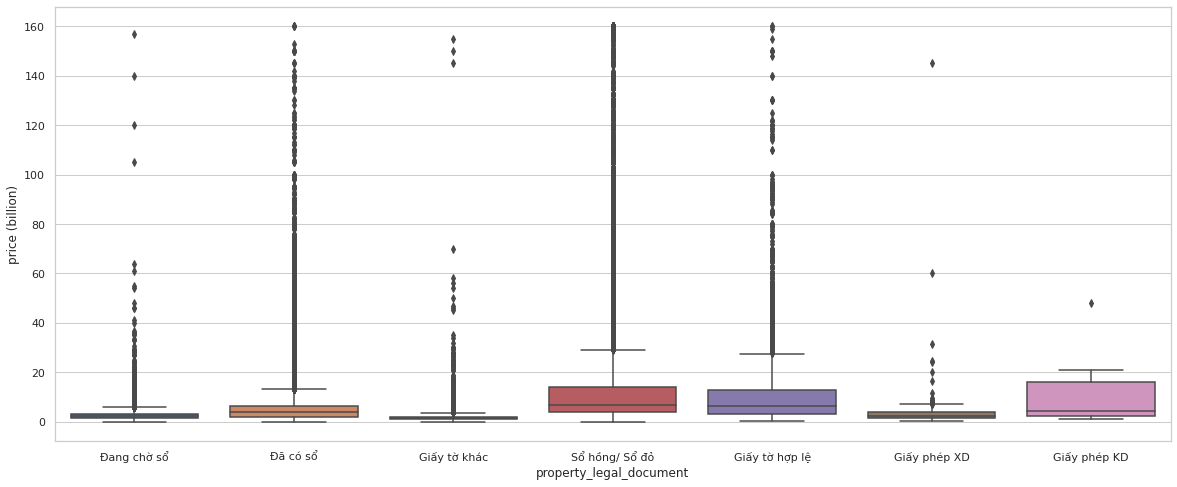

In [159]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=BDS_df6[BDS_df6['price (billion)'] <= price_mark],
            x='property_legal_document', y='price (billion)')


In [160]:
BDS_df6['property_legal_document'].replace({"Sổ hồng/ Sổ đỏ": "Đã có sổ",
                                            "Giấy tờ hợp lệ": "Giấy tờ khác",
                                            "Giấy phép XD": "Giấy tờ khác",
                                            "Giấy phép KD": "Giấy tờ khác"}, inplace=True)


In [161]:
# Load lại giá trị đã fit_transform trước đó
# BDS_df6_old = pd.read_csv('data version/BDS_df6.csv')
# BDS_df6['property_legal_document'] = BDS_df6_old.property_legal_document
BDS_df6['property_legal_document'] = BDS_df6['property_legal_document'].astype(
    'category')


In [162]:
BDS_df6.to_csv('data version/BDS_df6_new.csv', index=False)


### DF6


In [364]:
BDS_df6 = pd.read_csv('data version/BDS_df6_new.csv')


### floors


In [377]:
BDS_df7 = BDS_df6.copy()


In [378]:
BDS_df7['floors'].unique()


array(['Nhiều hơn 10', '1', '3', '2', '4', '5', '6', '7', '10', '9', '8',
       nan, '2.0', '1.0', '18.0', '23.0', '4.0', '6.0', '3.0', '26.0',
       '35.0', '10.0', '30.0', '15.0', '12.0', '8.0', '40.0', '38.0',
       '5.0', '29.0', '19.0', '31.0', '9.0', '33.0', '17.0', '20.0',
       '13.0', '22.0', '24.0', '11.0', '14.0', '27.0', '16.0', '25.0',
       '36.0', '7.0', '21.0', '28.0', '32.0', '34.0', '37.0', 28.0, 1.0,
       11.0, 4.0, 3.0, 2.0, 24.0, 34.0, 7.0, 5.0, 29.0, 30.0, 15.0, 12.0,
       27.0, 10.0, 9.0, 18.0, 14.0, 20.0, 17.0, 22.0, 19.0, 151.0, 8.0,
       6.0, 26.0, 23.0, 25.0, 16.0, 36.0, 50.0, 61.0, 13.0, 33.0, 40.0,
       39.0, 35.0, 48.0, 42.0, 44.0, 37.0, 38.0, 21.0, 32.0, 75.0, 2000.0,
       31.0, 988.0, 333.0, 163.0, 45.0, 144.0, 43.0, 91.0, 46.0, 55.0,
       52.0], dtype=object)

In [379]:
BDS_df7['floors'] = BDS_df7['floors'].apply(lambda x: int(
    float(x)) if isinstance(x, str) and "Nhiều hơn" not in x else x)

BDS_df7['floors'] = BDS_df7['floors'].apply(
    DPP.convertNum2Int, convert_dtype=False)


In [380]:
floors = BDS_df7['floors'].unique()[1:]
k_floors = floors[floors > 81]
k_floors

array([151, 2000, 988, 333, 163, 144, 91], dtype=object)

In [381]:
# Loại các tin đăng có số lầu lớn hơn 81 vì nó không tồn tại ở Việt Nam hiện tại
BDS_df7 = BDS_df7[~(BDS_df7['floors'].isin(k_floors))]
BDS_df7.reset_index(drop=True, inplace=True)


In [201]:
# # Gom nhóm các giá trị có số lầu nhiều hơn 10
# BDS_df7['floors'].replace(floors[floors > 10], 'Nhiều hơn 10', inplace=True)


In [382]:
for i in range(BDS_df7.shape[0]):
    if BDS_df7.loc[i,'type_real_estate'] == 'Đất' and pd.isna(BDS_df7.loc[i,'floors']):
        BDS_df7.at[i,'floors'] = 0

<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='price (billion)', ylabel='floors'>

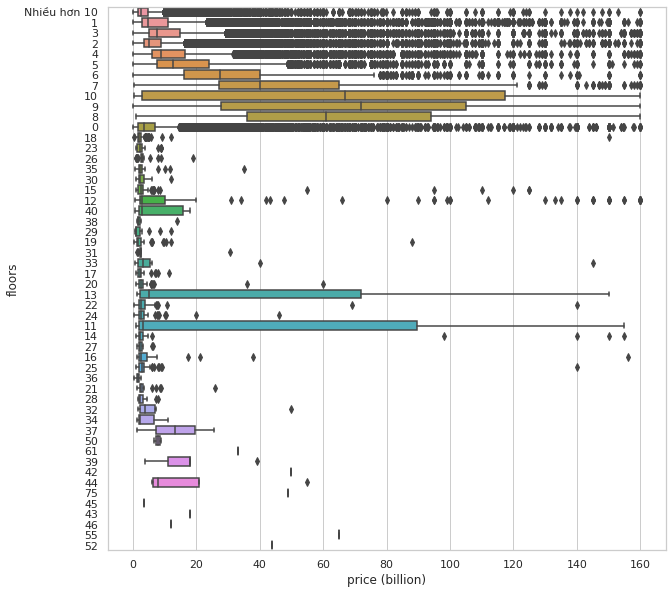

In [383]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=BDS_df7[BDS_df7['price (billion)'] <=
            price_mark], y="floors", x="price (billion)", orient='h')


In [384]:
BDS_df7.to_csv('data version/BDS_df7_new.csv', index=False)


### DF7


In [375]:
# BDS_df7 = pd.read_csv('data version/BDS_df7_new.csv')


### rooms


In [385]:
BDS_df8 = BDS_df7.copy()


In [386]:
BDS_df8['rooms'].unique()


array(['2', '1', '3', '4', '10', '8', '6', '9', '5', '7', 'Nhiều hơn 10',
       nan, '3.0', '18.0', '24.0', '2.0', '4.0', '35.0', '1.0', '30.0',
       '5.0', '8.0', '6.0', '22.0', '12.0', '54.0', '68.0', '36.0',
       '10.0', '7.0', '20.0', '55.0', '14.0', '16.0', '15.0', '13.0',
       '9.0', '25.0', '11.0', '17.0', '32.0', '28.0', 3.0, 2.0, 13.0, 7.0,
       4.0, 5.0, 1.0, 12.0, 6.0, 20.0, 8.0, 9.0, 14.0, 32.0, 15.0, 10.0,
       11.0, 22.0, 21.0, 17.0, 16.0, 30.0, 27.0, 95.0, 19.0, 43.0, 37.0,
       18.0, 60.0, 40.0, 62.0, 50.0, 120.0, 42.0, 68.0, 25.0, 100.0, 36.0,
       33.0, 23.0, 110.0, 29.0, 35.0, 24.0, 72.0, 45.0, 58.0, 31.0, 192.0,
       26.0, 44.0, 160.0, 48.0, 65.0, 74.0, 34.0, 41.0, 39.0, 80.0, 104.0,
       46.0, 28.0, 55.0, 51.0, 89.0, 84.0, 63.0, 61.0, 56.0, 105.0, 71.0,
       54.0, 67.0, 66.0, 70.0, 85.0, 88.0, 90.0, 52.0, 111.0, 101.0,
       150.0, 123.0, 373.0, 145.0, 114.0, 57.0, 75.0, 115.0, 200.0, 94.0,
       49.0, 125.0, 69.0, 162.0, 102.0, 195.0, 170.0,

In [387]:
BDS_df8['rooms'] = BDS_df8['rooms'].apply(lambda x: int(
    float(x)) if isinstance(x, str) and "Nhiều hơn" not in x else x)

BDS_df8['rooms'] = BDS_df8['rooms'].apply(
    DPP.convertNum2Int, convert_dtype=False)

In [306]:
# rooms = list(BDS_df8['rooms'].unique())
# rooms.remove('Nhiều hơn 10')

# rooms = np.array(rooms)
# # Gom nhóm các giá trị có số phòng nhiều hơn 10
# BDS_df8['rooms'].replace(rooms[rooms > 10], 'Nhiều hơn 10', inplace=True)

In [388]:
for i in range(BDS_df8.shape[0]):
    if BDS_df8.loc[i,'type_real_estate'] == 'Đất' and pd.isna(BDS_df8.loc[i,'rooms']):
        BDS_df8.at[i,'rooms'] = 0


In [ ]:
# plt.figure(figsize=(10, 10))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharex=True)

sns.boxplot(data=BDS_df1[BDS_df1['price (billion)'] <= price_mark],
            x="rooms", y="price (billion)", ax=axes[0])
axes[0].set_title("Chưa điền giá trị")
axes[0].tick_params(axis='x',labelrotation=45)
sns.boxplot(data=BDS_df8[BDS_df8['price (billion)'] <= price_mark],
            x="rooms", y="price (billion)", ax=axes[1])
axes[1].set_title("Đã điền giá trị")
axes[1].tick_params(axis='x',labelrotation=45)


### list time


In [389]:
BDS_df8['list_time'] = pd.to_datetime(BDS_df8['list_time'], format="%d/%m/%Y")


In [390]:
BDS_df8['list_time'].sample(5)


66022    2021-10-17
163956   2021-11-06
118508   2021-10-27
63164    2021-10-20
63420    2021-10-19
Name: list_time, dtype: datetime64[ns]

In [391]:
BDS_df8.drop(["floornumber", "balconydirection", "property_status",
              "furnishing_sell"], axis=1, inplace=True)


In [392]:
BDS_df8.dropna(axis=0,subset=['ward','area', 'region'], inplace=True)


In [393]:
BDS_df8.columns

Index(['list_time', 'ward', 'area', 'region', 'direction',
       'property_legal_document', 'size (m2)', 'rooms', 'toilets', 'floors',
       'living_size (m2)', 'width (m)', 'length (m)', 'price (billion)',
       'type_details', 'website', 'front_road', 'type_real_estate'],
      dtype='object')

In [394]:
from sklearn.impute import SimpleImputer
imputer1 = SimpleImputer(strategy='most_frequent')

In [395]:
cate_impute = imputer1.fit_transform(BDS_df8[['rooms', 'toilets', 'floors','direction',
                                'type_details', 'type_real_estate', 'property_legal_document']])


In [396]:
BDS_df8[['rooms', 'toilets', 'floors','direction',
         'type_details', 'type_real_estate', 'property_legal_document']] = cate_impute


In [397]:
floors[floors > 10]

array([18, 23, 26, 35, 30, 15, 12, 40, 38, 29, 19, 31, 33, 17, 20, 13, 22,
       24, 11, 14, 27, 16, 25, 36, 21, 28, 32, 34, 37, 151, 50, 61, 39,
       48, 42, 44, 75, 2000, 988, 333, 163, 45, 144, 43, 91, 46, 55, 52],
      dtype=object)

In [398]:

BDS_df8['floors'].replace(floors[floors > 10], 'Nhiều hơn 10', inplace=True)

In [399]:
rooms = list(BDS_df8['rooms'].unique())
rooms.remove('Nhiều hơn 10')

rooms = np.array(rooms)
# Gom nhóm các giá trị có số phòng nhiều hơn 10
BDS_df8['rooms'].replace(rooms[rooms > 10], 'Nhiều hơn 10', inplace=True)

In [400]:
from sklearn.impute import SimpleImputer
imputer2 = SimpleImputer(strategy='median')
df8_impute = imputer2.fit_transform(BDS_df8[['size (m2)', 'living_size (m2)',
                                             'width (m)', 'length (m)', 'front_road']])


In [401]:
BDS_df8[['size (m2)', 'living_size (m2)', 'width (m)', 'length (m)', 'front_road']] = df8_impute


In [402]:
BDS_df8.to_csv('data version/BDS_df8_new.csv', index=False)


### DF8


In [321]:
# BDS_df8 = pd.read_csv('data version/BDS_df8_new.csv')


## 3.1 Overview


In [403]:
BDS_df9 = BDS_df8.copy()
BDS_df9.drop_duplicates(inplace=True)
# BDS_df9.dropna(inplace=True)


In [404]:
BDS_df9.reset_index(drop=True, inplace=True)

In [405]:
BDS_df9.dropna(inplace=True)


In [406]:
BDS_df9.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 212063 entries, 0 to 212062
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   list_time                212063 non-null  datetime64[ns]
 1   ward                     212063 non-null  object        
 2   area                     212063 non-null  object        
 3   region                   212063 non-null  object        
 4   direction                212063 non-null  object        
 5   property_legal_document  212063 non-null  object        
 6   size (m2)                212063 non-null  float64       
 7   rooms                    212063 non-null  object        
 8   toilets                  212063 non-null  object        
 9   floors                   212063 non-null  object        
 10  living_size (m2)         212063 non-null  float64       
 11  width (m)                212063 non-null  float64       
 12  length (m)      

In [407]:
BDS_df9.describe(include='all')


list_time       ward         area       region direction  \
count                212063     212063       212063       212063    212063   
unique                  374        443           44            3         8   
top     2021-11-07 00:00:00  Phường 12  Quận Gò Vấp  Hồ Chí Minh  Đông Nam   
freq                  26535       7182        19834       178463    170090   
first   2019-05-31 00:00:00        NaN          NaN          NaN       NaN   
last    2021-11-08 00:00:00        NaN          NaN          NaN       NaN   
mean                    NaN        NaN          NaN          NaN       NaN   
std                     NaN        NaN          NaN          NaN       NaN   
min                     NaN        NaN          NaN          NaN       NaN   
25%                     NaN        NaN          NaN          NaN       NaN   
50%                     NaN        NaN          NaN          NaN       NaN   
75%                     NaN        NaN          NaN          NaN       NaN   
max                     NaN        NaN          NaN          NaN       NaN   

       property_legal_document     size (m2)     rooms toilets        floors  \
count                   212063  2.120630e+05  212063.0  212063        212063   
unique                       3           NaN      12.0      10            12   
top                   Đã có sổ           NaN       2.0       0  Nhiều hơn 10   
freq                    197612           NaN   50677.0  131240         67430   
first                      NaN           NaN       NaN     NaN           NaN   
last                       NaN           NaN       NaN     NaN           NaN   
mean                       NaN  7.521794e+03       NaN     NaN           NaN   
std                        NaN  2.090985e+06       NaN     NaN           NaN   
min                        NaN  1.000000e+00       NaN     NaN           NaN   
25%                        NaN  5.400000e+01       NaN     NaN           NaN   
50%                        NaN  8.000000e+01       NaN     NaN           NaN   
75%                        NaN  1.300000e+02       NaN     NaN           NaN   
max                        NaN  9.000000e+08       NaN     NaN           NaN   

        living_size (m2)      width (m)     length (m)  price (billion)  \
count       2.120630e+05  212063.000000  212063.000000    212063.000000   
unique               NaN            NaN            NaN              NaN   
top                  NaN            NaN            NaN              NaN   
freq                 NaN            NaN            NaN              NaN   
first                NaN            NaN            NaN              NaN   
last                 NaN            NaN            NaN              NaN   
mean        6.631514e+04       6.735049      21.416648        14.054451   
std         2.074278e+07      10.038976     238.589436        68.920626   
min         1.000000e+00       0.130000       0.540540         0.000385   
25%         1.000000e+02       4.000000      14.000000         2.730000   
50%         2.010000e+02       5.000000      17.000000         5.300000   
75%         5.410000e+02       5.500000      20.000000        11.000000   
max         9.000000e+09    3250.000000  105000.000000     15272.000000   

       type_details    website     front_road type_real_estate  
count        212063     212063  212063.000000           212063  
unique           21          2            NaN                4  
top         Nhà ngõ  alonhadat            NaN            Nhà ở  
freq          86482     118360            NaN           149156  
first           NaN        NaN            NaN              NaN  
last            NaN        NaN            NaN              NaN  
mean            NaN        NaN       9.290508              NaN  
std             NaN        NaN       6.027371              NaN  
min             NaN        NaN       0.000000              NaN  
25%             NaN        NaN       7.000000              NaN  
50%             NaN        NaN       8

In [408]:
BDS_df9.to_csv('BDS_new.csv', index=False)


In [328]:
BDS_df9 = pd.read_csv('BDS_new.csv')


In [409]:
BDS_df9['list_time'] = pd.to_datetime(BDS_df9['list_time'])
BDS_df9['direction'] = BDS_df9['direction'].astype('category')
BDS_df9['property_legal_document'] = BDS_df9['property_legal_document'].astype(
    'category')
BDS_df9['rooms'] = BDS_df9['rooms'].astype('category')
BDS_df9['toilets'] = BDS_df9['toilets'].astype('category')
BDS_df9['floors'] = BDS_df9['floors'].astype('category')


In [410]:
BDS_df10 = BDS_df9.copy()


## 3.2 Numeric variables


<Figure size 720x576 with 0 Axes>

<AxesSubplot:>

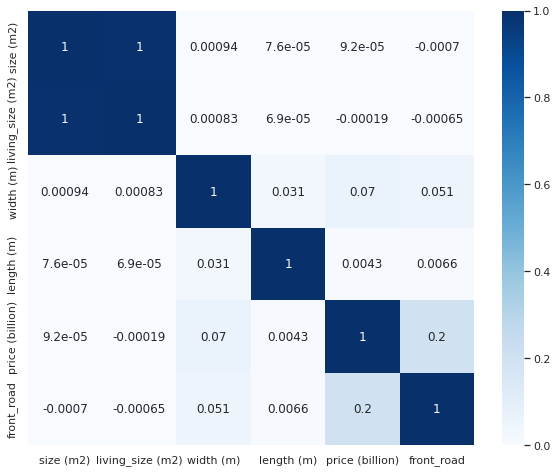

In [411]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=BDS_df9.corr(), cmap="Blues", annot=True)


### Price


In [412]:
BDS_df9['price (billion)'].describe()


count    212063.000000
mean         14.054451
std          68.920626
min           0.000385
25%           2.730000
50%           5.300000
75%          11.000000
max       15272.000000
Name: price (billion), dtype: float64

In [413]:
outlier_df = BDS_df9[BDS_df9['price (billion)'] > price_mark].reset_index(
    drop=True)


In [414]:
BDS_df9 = BDS_df9[~(BDS_df9['price (billion)'] > price_mark)
                  ].reset_index(drop=True)


In [415]:
BDS_df9.shape


(210176, 18)

<AxesSubplot:>

Text(0.5, 1.0, 'Các giá trị trong vùng quan sát')

<AxesSubplot:>

Text(0.5, 1.0, 'Các giá trị outlier')

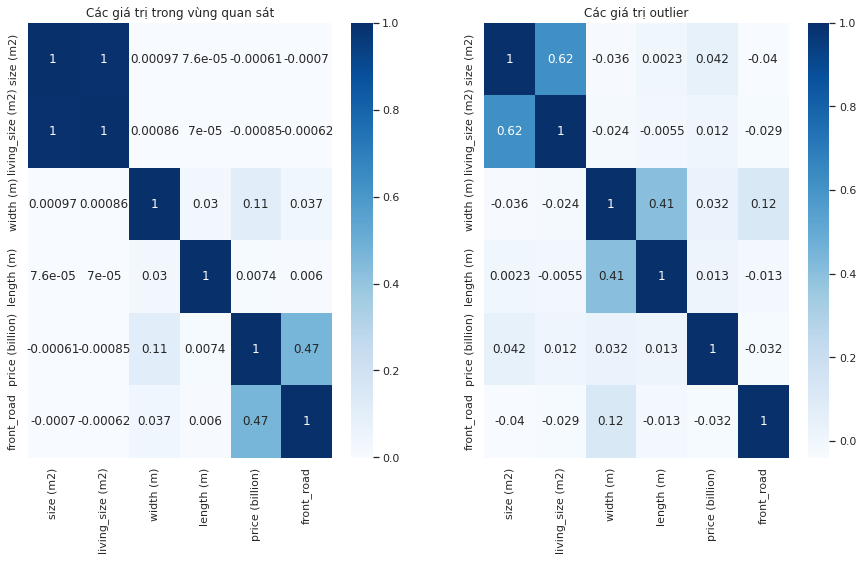

In [416]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

sns.heatmap(data=BDS_df9.corr(), cmap="Blues", annot=True, ax=axes[0])
axes[0].set_title("Các giá trị trong vùng quan sát")
sns.heatmap(data=outlier_df.corr(), cmap="Blues", annot=True, ax=axes[1])
axes[1].set_title("Các giá trị outlier")


<div> => Đối với các giá trị nằm trong vùng quan sát của dữ liệu, chiều rộng mặt đường có ảnh hưởng đồng biến đến giá bất động sản. Diện tích đất và diện tích sử dụng có mối quan hệ hoàn toàn đồng biến</div>
<div>  </div>


<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'Sự phân bố giá bất động sản')

<AxesSubplot:title={'center':'Sự phân bố giá bất động sản'}, xlabel='price (billion)', ylabel='Count'>

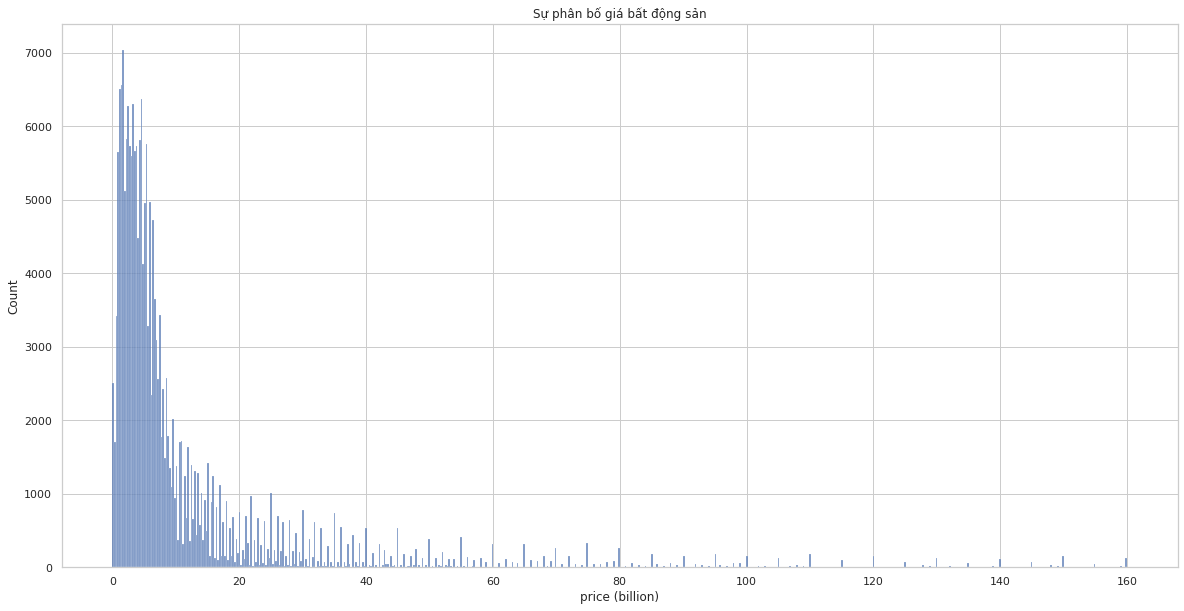

In [417]:
plt.figure(figsize=(20, 10))
plt.title("Sự phân bố giá bất động sản")
sns.histplot(data=BDS_df9, x="price (billion)")


<AxesSubplot:>

Text(0.5, 1.0, 'Căn hộ/Chung cư')

<AxesSubplot:>

Text(0.5, 1.0, 'Nhà ở')

<AxesSubplot:>

Text(0.5, 1.0, 'Đất')

<AxesSubplot:>

Text(0.5, 1.0, 'Khác')

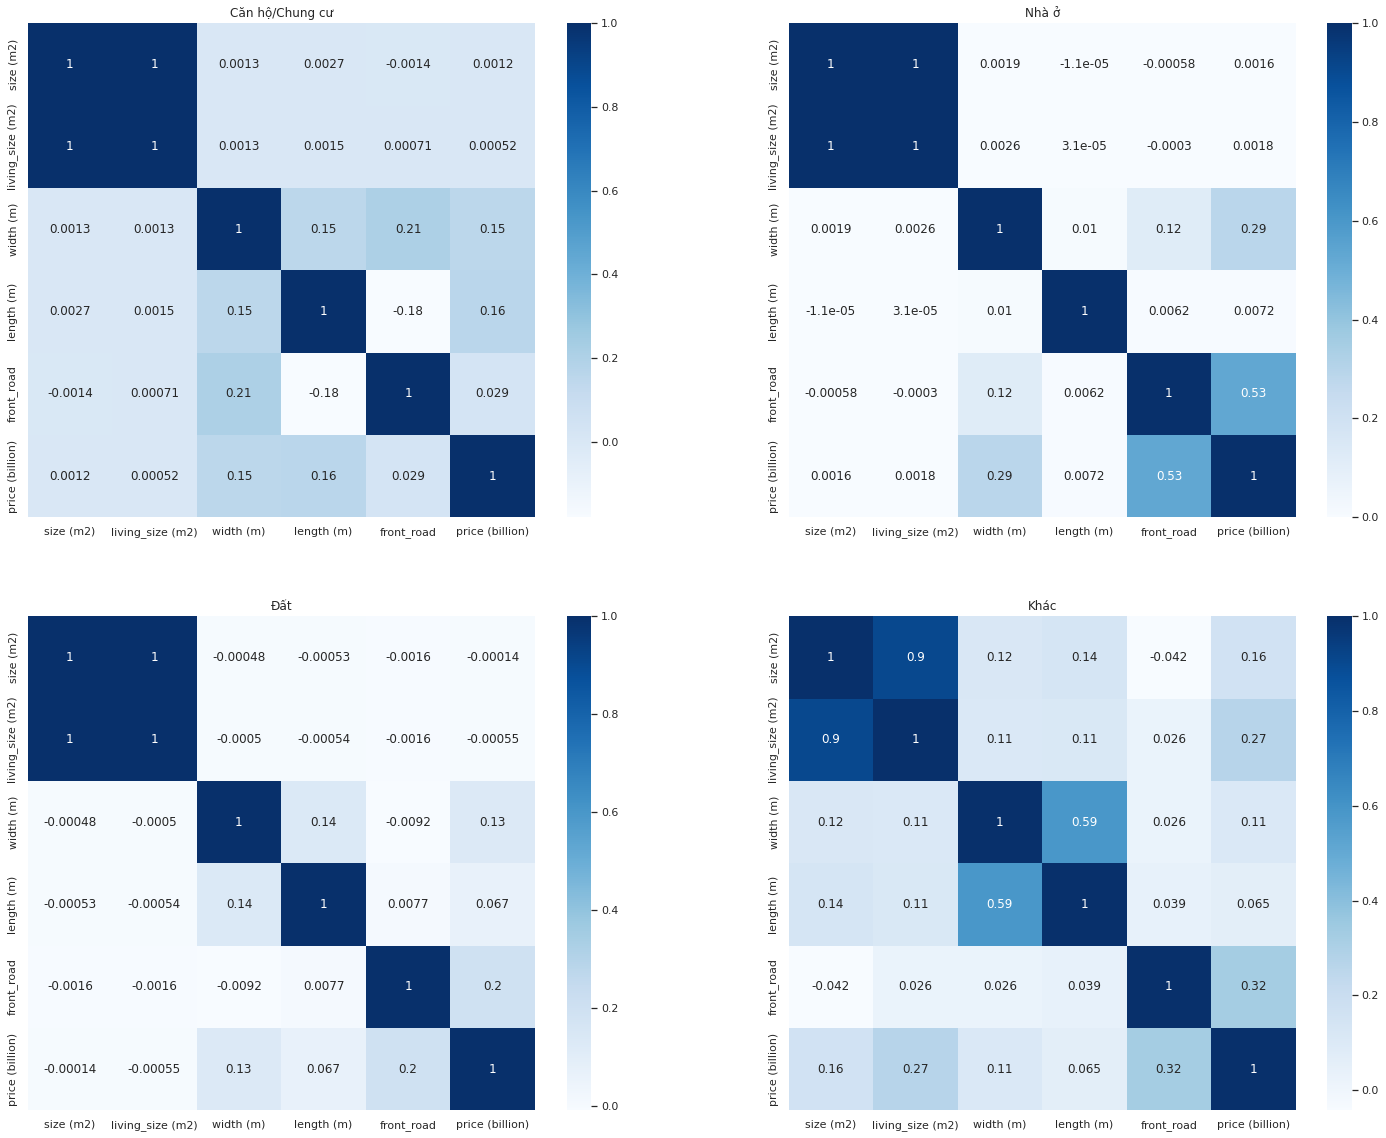

In [419]:
fig, axes = plt.subplots(2, 2, figsize=(25, 20))
col, row = 0, 0
features = ['size (m2)', 'living_size (m2)', 'width (m)',
            'length (m)', 'front_road', 'price (billion)']
for val in ['Căn hộ/Chung cư', 'Nhà ở', 'Đất', 'Khác']:
    sns.heatmap(data=BDS_df9[BDS_df9['type_real_estate'] == val][features].corr(
    ), cmap="Blues", annot=True, ax=axes[row, col])
    axes[row, col].set_title(val)
    col += 1
    if col > 1:
        col = 0
        row += 1


In [420]:
outlier_df['price (billion)'].describe()


count     1887.000000
mean       367.478589
std        610.981650
min        160.050000
25%        195.000000
50%        255.000000
75%        360.000000
max      15272.000000
Name: price (billion), dtype: float64

In [341]:
# sns.histplot(data=outlier_df, x="price (million)")


In [342]:
# plt.figure(figsize=(10, 10))
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

# sns.histplot(data=BDS_df9, x="price (million)", ax=axes[0])
# axes[0].set_title("Các giá trị trong vùng quan sát")
# sns.histplot(data=outlier_df, x="price (million)", ax=axes[1])
# axes[1].set_title("Các giá trị outlier)


=> Giá bất động sản phân bổ chủ yếu trong khoảng dưới 11 tỷ đồng


In [421]:
group_price = ['Giá rẻ', 'Tầm trung', 'Cao cấp', 'Siêu cao cấp']
# Giá rẻ :0 - 2 tỷ
# Tầm trung: 2 - 5 tỷ
# Cao cấp: 5 - 20 tỷ
# Siêu cao cấp: trên 20 tỷ
bins_price = [0, 2, 5, 20, max(BDS_df9['price (billion)'])]
BDS_df9['price-binned'] = pd.cut(BDS_df9['price (billion)'],
                                 bins=bins_price, labels=group_price)


In [422]:
price_binned = BDS_df9['price-binned'].value_counts().to_frame()
price_binned['ratio'] = round(price_binned['price-binned']*100/price_binned['price-binned'].sum(), 2)
price_binned

price-binned  ratio
Cao cấp              80723  38.41
Tầm trung            64423  30.65
Giá rẻ               37946  18.05
Siêu cao cấp         27084  12.89

<Figure size 1440x576 with 0 Axes>

Text(0.5, 1.0, 'Số lượng giá bất động sản theo phân khúc sản phẩm')

<AxesSubplot:title={'center':'Số lượng giá bất động sản theo phân khúc sản phẩm'}, xlabel='price-binned', ylabel='count'>

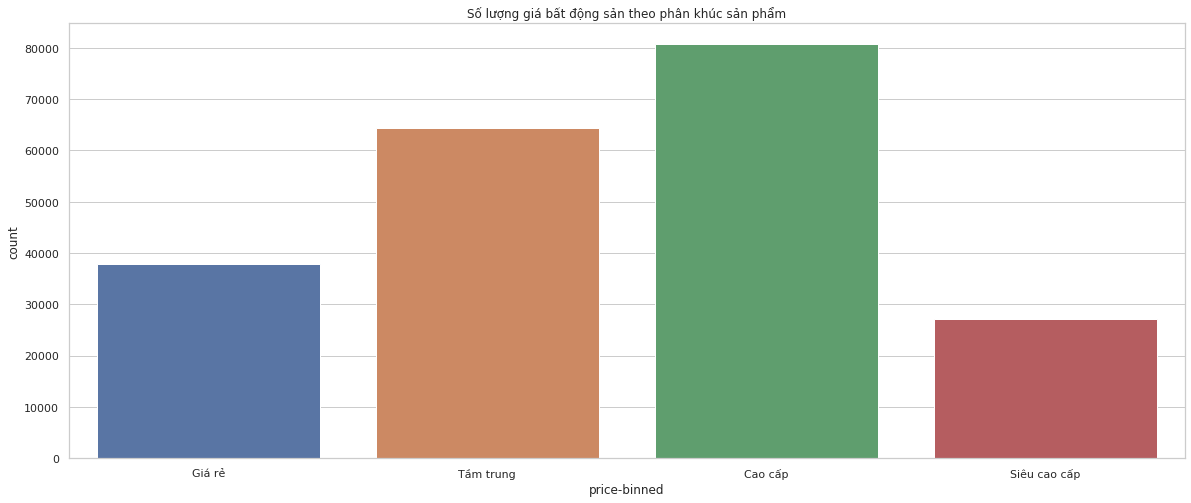

In [423]:
plt.figure(figsize=(20, 8))
plt.title("Số lượng giá bất động sản theo phân khúc sản phẩm")
sns.countplot(x='price-binned', data=BDS_df9)


=> Phân khúc giá BĐS tập trung chủ yếu là các BĐS tầm trung và cao cấp


## 3.3 Categorical variables


In [424]:
cate_var = [col for col in BDS_df9.columns if BDS_df9[col].dtype != "float"][:-1]
cate_var


['list_time',
 'ward',
 'area',
 'region',
 'direction',
 'property_legal_document',
 'rooms',
 'toilets',
 'floors',
 'type_details',
 'website',
 'type_real_estate']

### Website


In [425]:
BDS_df9['website'].unique()


array(['Chotot', 'alonhadat'], dtype=object)

<Figure size 720x504 with 0 Axes>

Text(0.5, 1.0, 'Phân khúc giá bất động sản trên website')

<AxesSubplot:title={'center':'Phân khúc giá bất động sản trên website'}, xlabel='website', ylabel='price (billion)'>

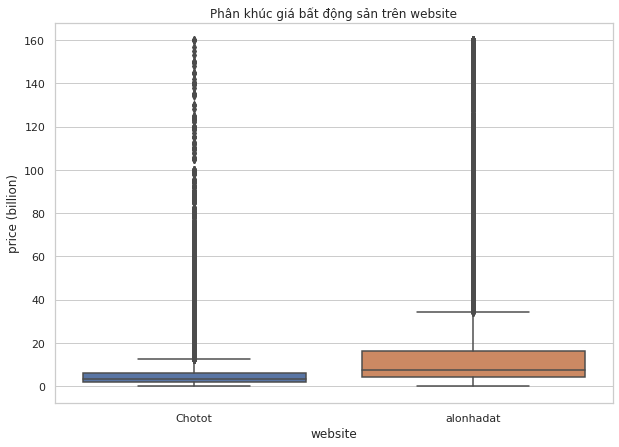

In [426]:
plt.figure(figsize=(10, 7))
plt.title("Phân khúc giá bất động sản trên website")
sns.boxplot(x='website', y='price (billion)',
              data=BDS_df9)


<Figure size 1440x576 with 0 Axes>

Text(0.5, 1.0, 'Phân khúc giá bất động sản trên website')

<AxesSubplot:title={'center':'Phân khúc giá bất động sản trên website'}, xlabel='website', ylabel='count'>

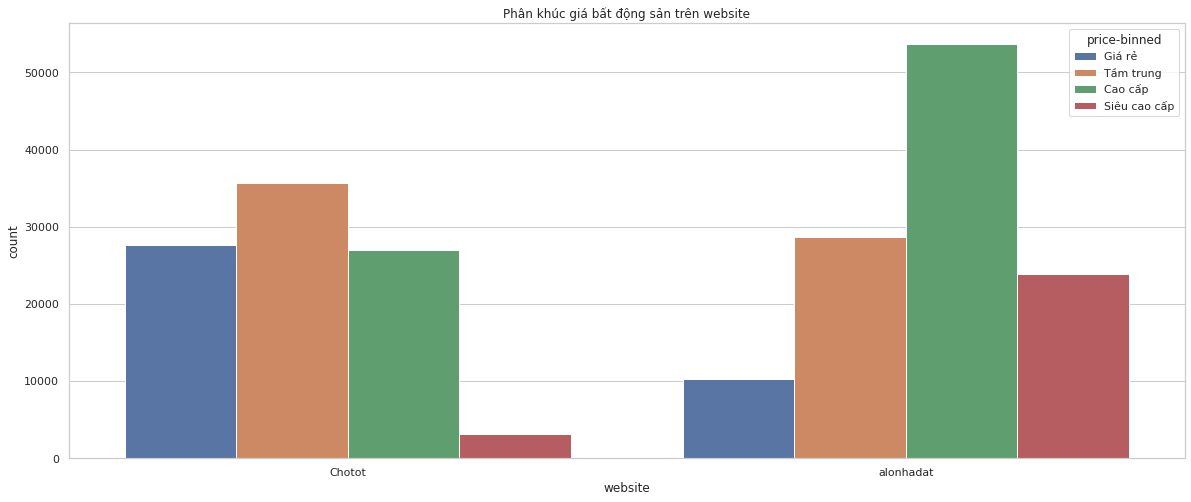

In [427]:
plt.figure(figsize=(20, 8))
plt.title("Phân khúc giá bất động sản trên website")
sns.countplot(x='website', hue='price-binned',
              data=BDS_df9)


<div> => Chotot tập trung chủ yếu các BĐS giá rẻ, tầm trung và cao cấp. Các BĐS siêu cao cấp chỉ chiếm thị phần nhỏ </div>
<div> => alonhadat chủ yếu được đăng bán các sản phẩm cao cấp </div>


### **Region, area, ward**


<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='region', ylabel='price (billion)'>

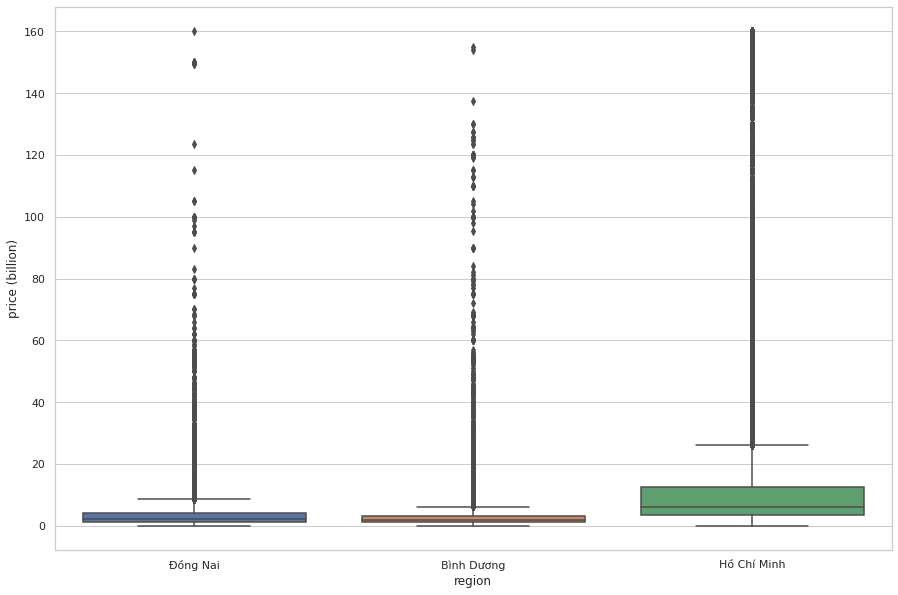

In [428]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='region', y='price (billion)',
            data=BDS_df9)


=> Ta nhận thấy rằng các BĐS ở khu vực Tp Hồ Chí Minh có sự đa dạng về phân khúc hơn so với Bình Dương, Đồng Nai.


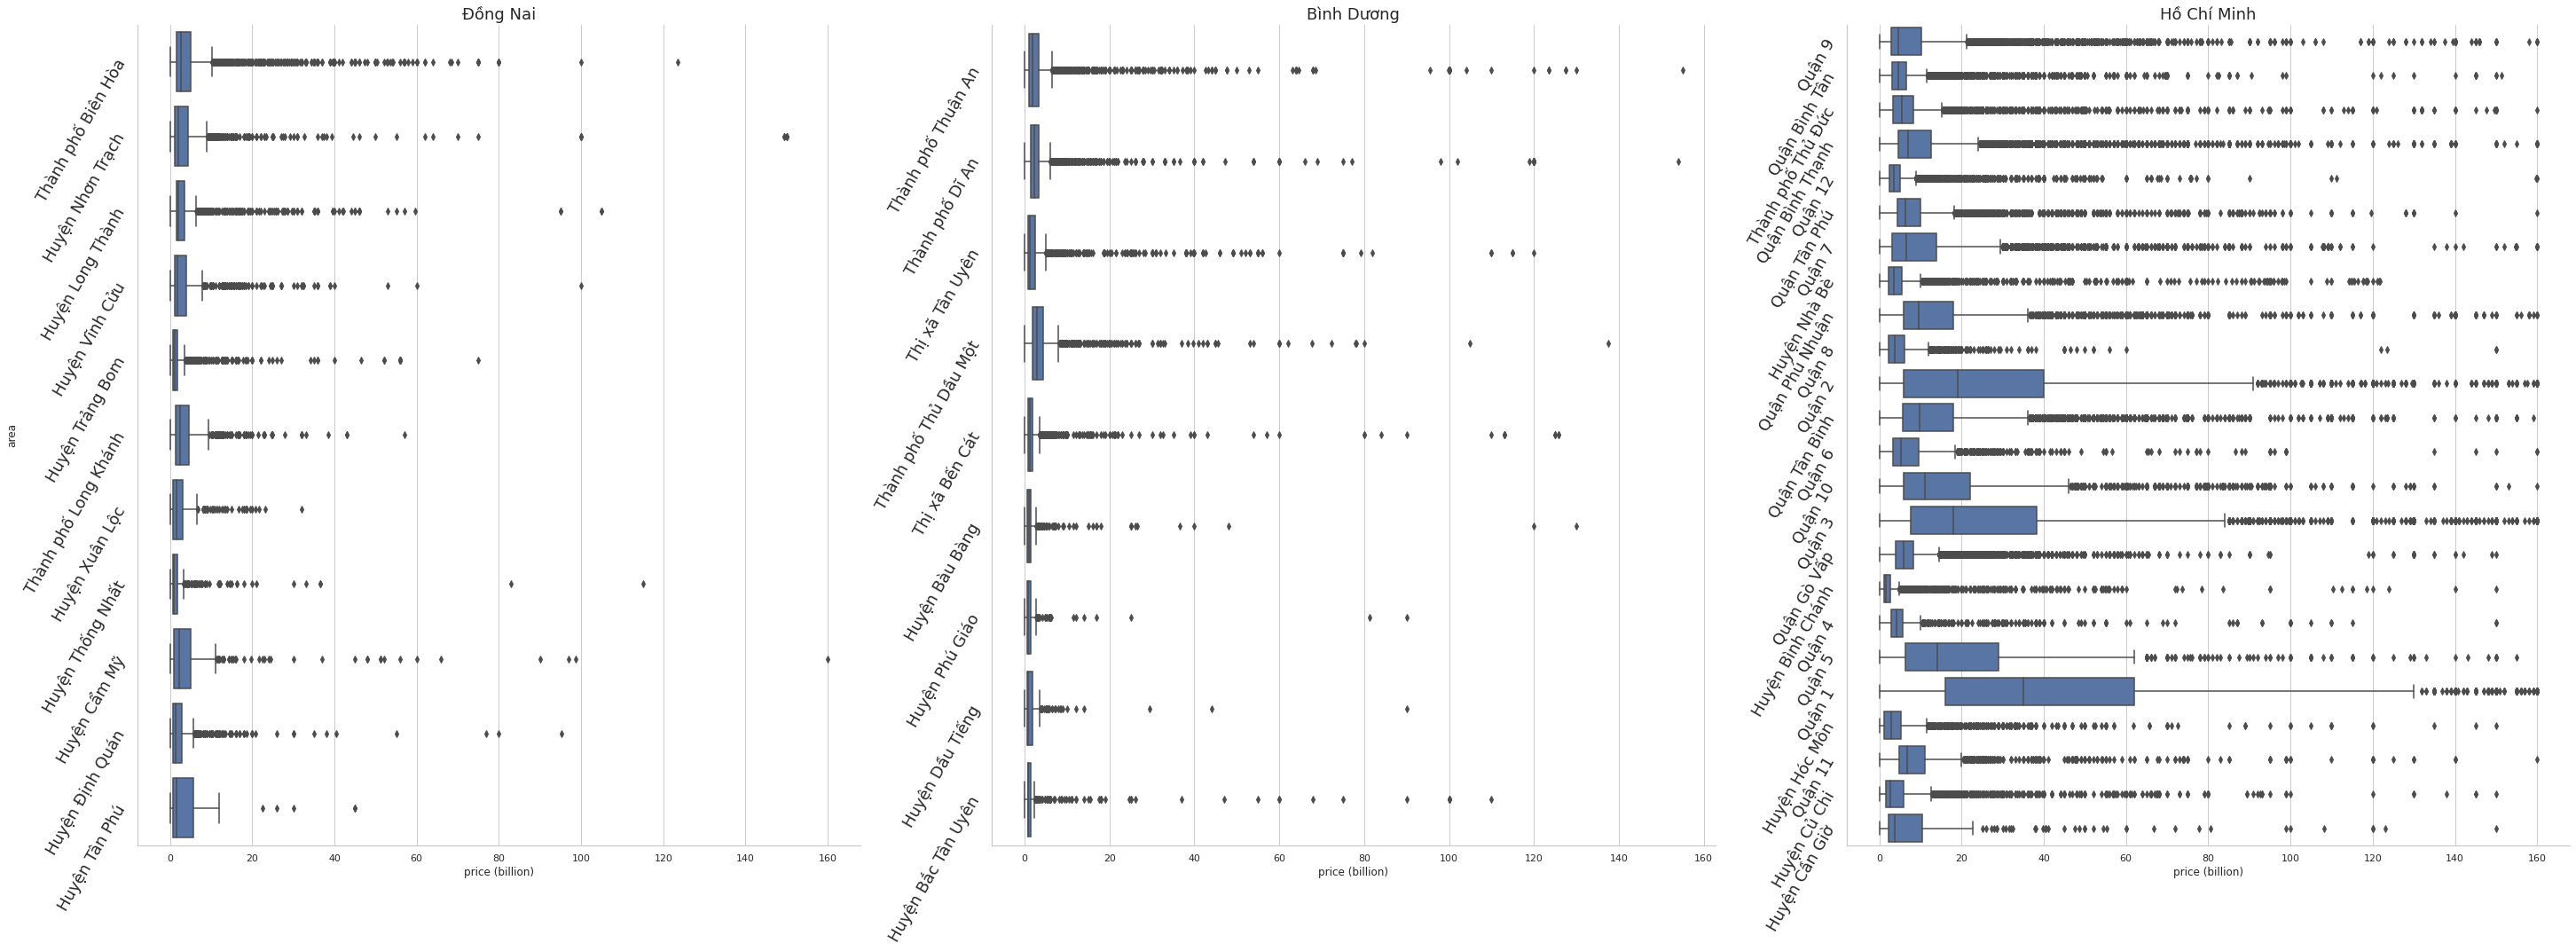

In [429]:
g = sns.FacetGrid(BDS_df9, col='region', sharey=False,
                  sharex=False, height=15, aspect=0.9, col_wrap=3)

g.map(sns.boxplot, 'price (billion)', 'area', orient='h')
g.set_titles("{col_name}", size=18)
# g.fig.suptitle('Giá bất động sản tại các tỉnh')

g.set_yticklabels(rotation=60, fontsize=18)

g.fig.tight_layout()
plt.show()


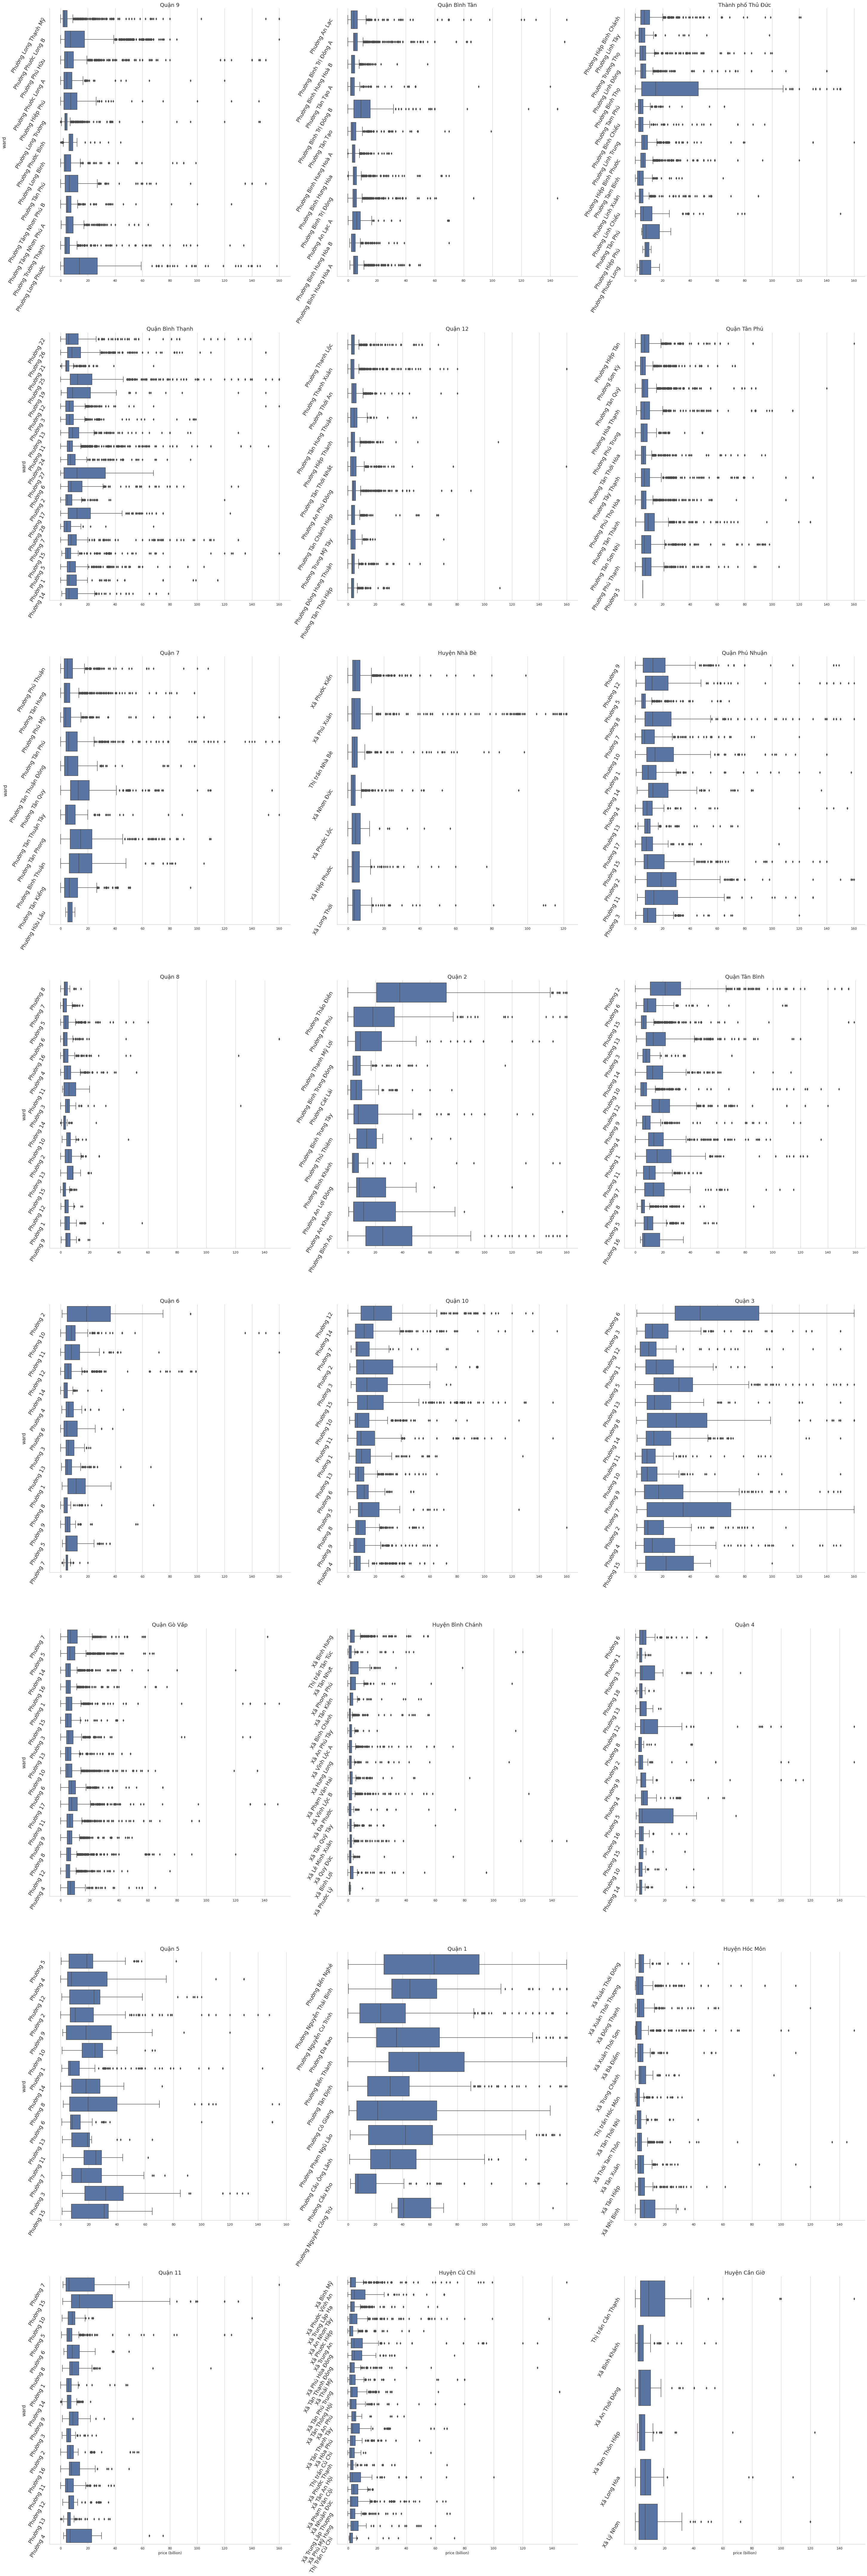

In [430]:
g = sns.FacetGrid(BDS_df9[BDS_df9['region'] == 'Hồ Chí Minh'], col='area', sharey=False,
                  sharex=False, height=15, aspect=0.9, col_wrap=3)

g.map(sns.boxplot, 'price (billion)', 'ward', orient='h')
g.set_titles("{col_name}", size=18)
# g.fig.suptitle('Giá bất động sản tại các tỉnh')

# g.set_xticklabels(fontsize=18)
g.set_yticklabels(rotation=60, fontsize=18)
g.set_ylabels(fontsize=16)


g.fig.tight_layout()
plt.show()


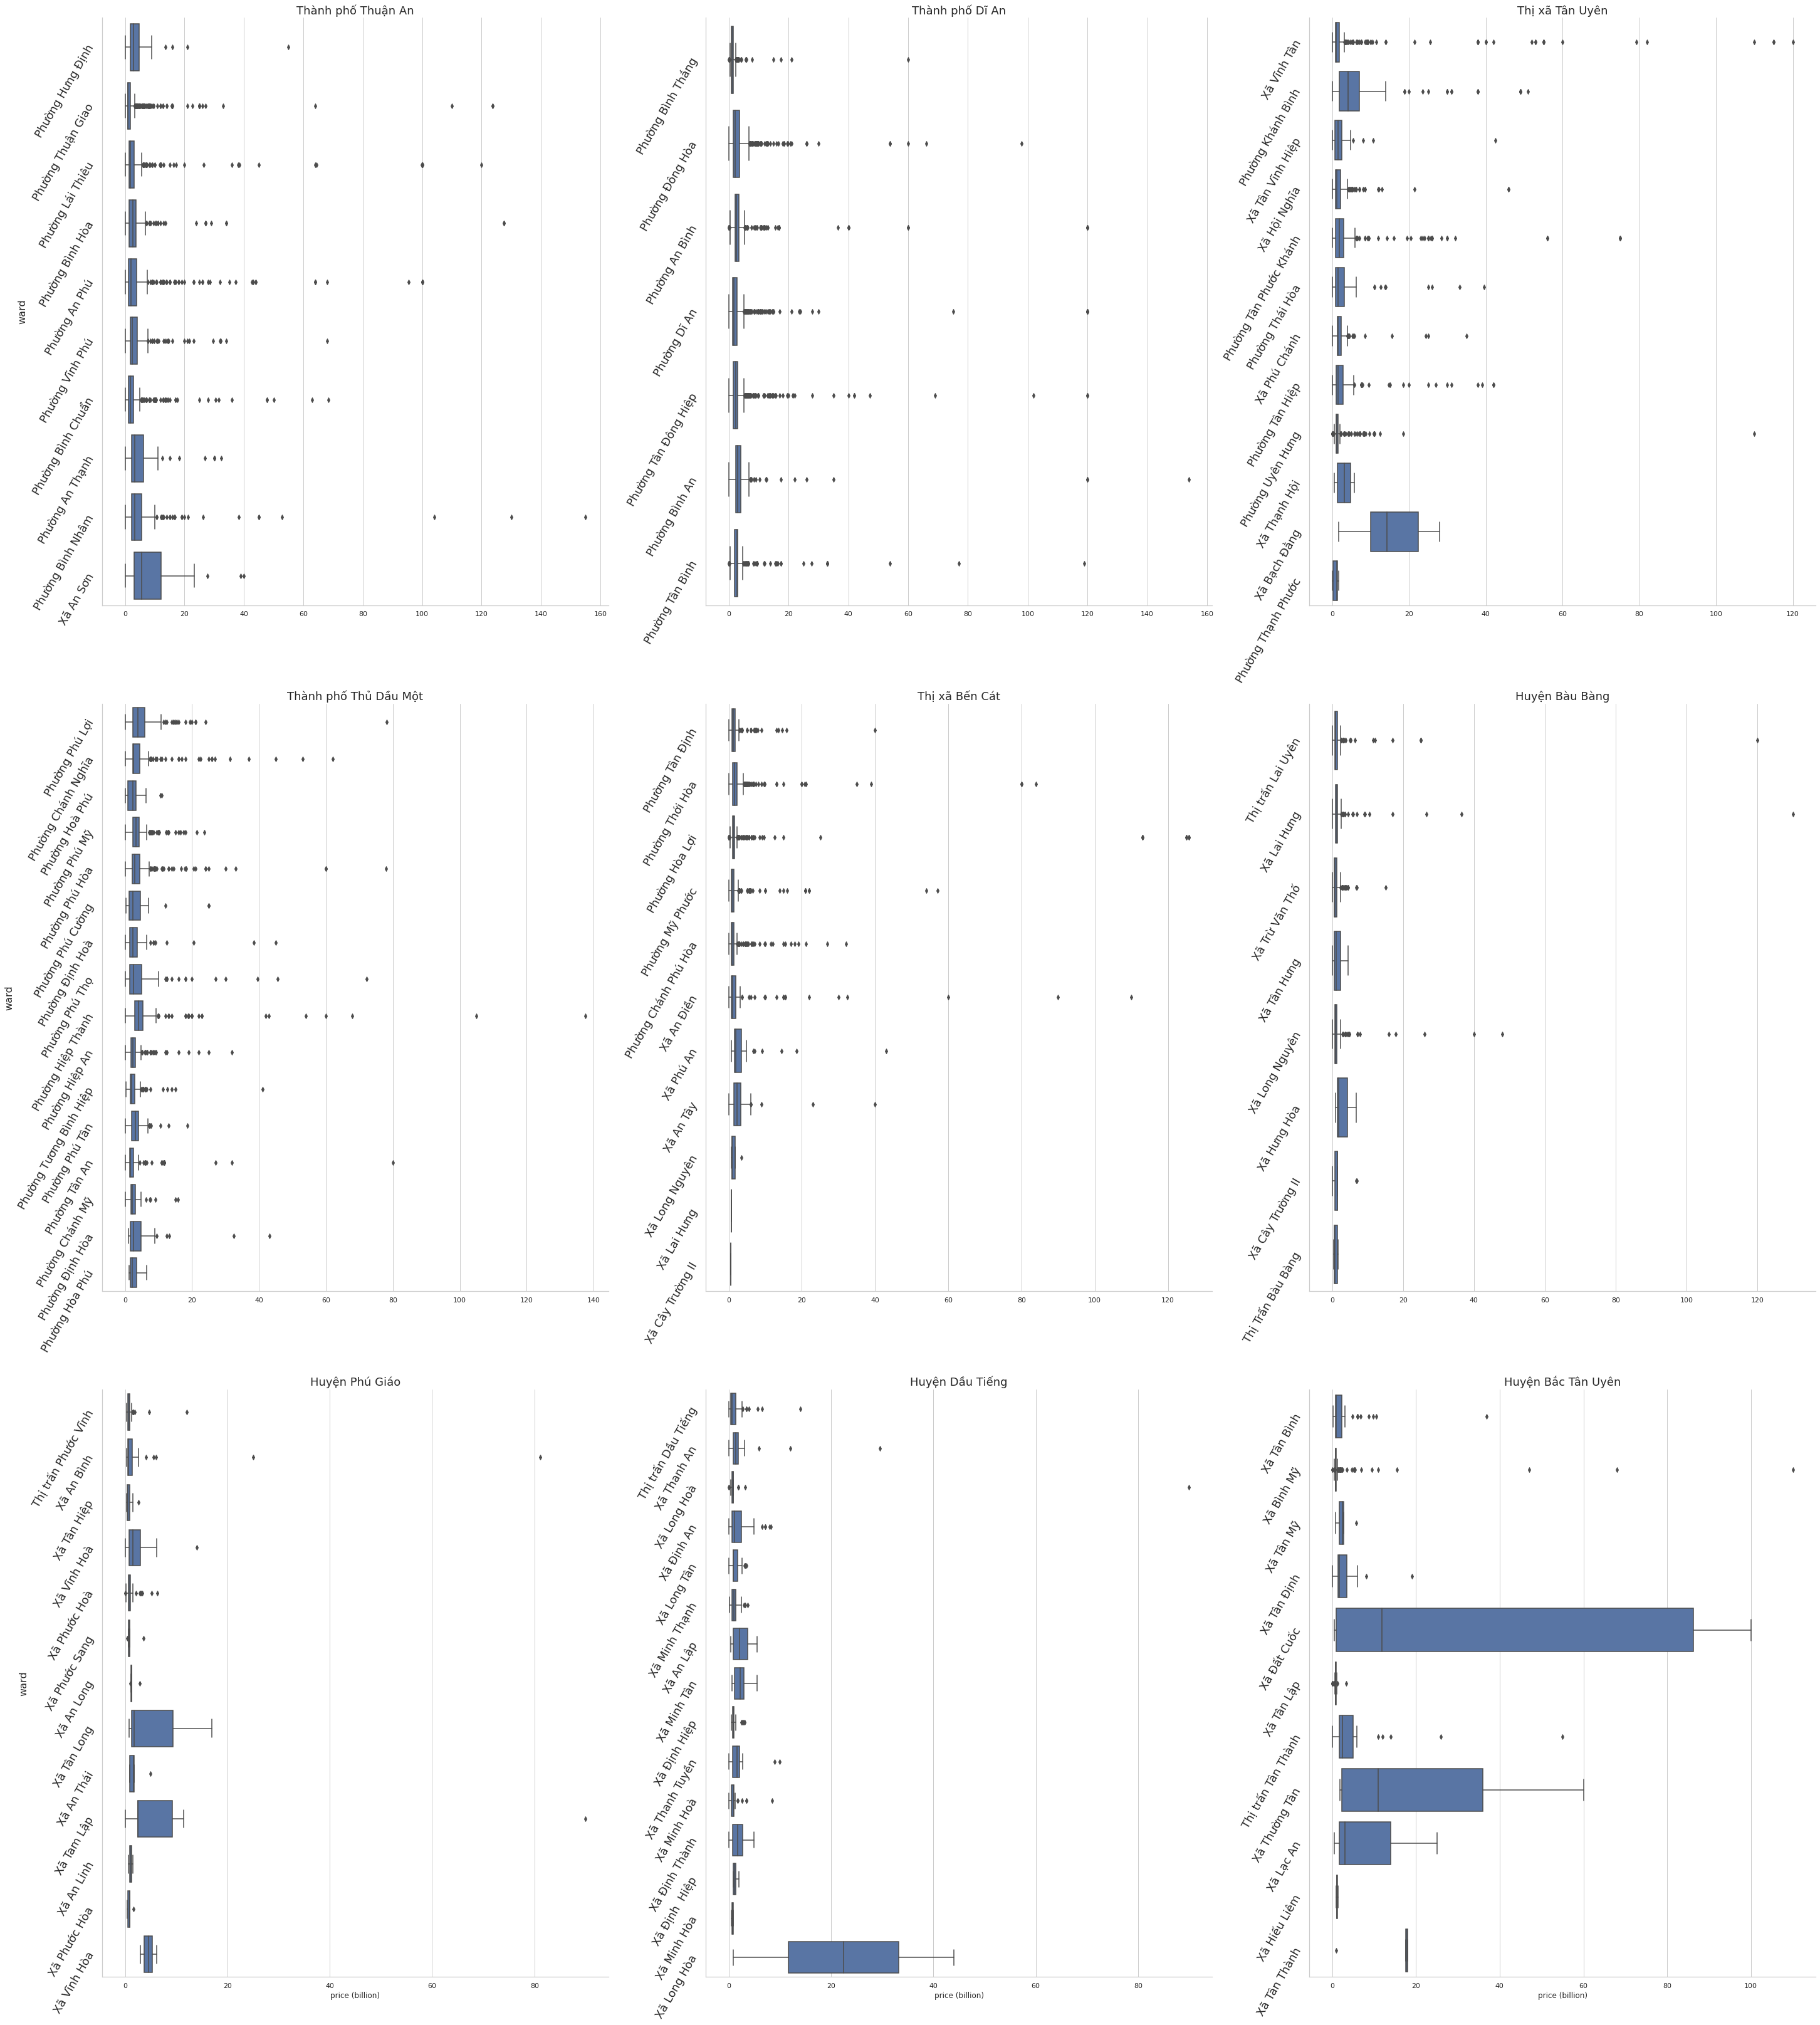

In [431]:
g = sns.FacetGrid(BDS_df9[BDS_df9['region'] == 'Bình Dương'], col='area', sharey=False,
                  sharex=False, height=15, aspect=0.9, col_wrap=3)

g.map(sns.boxplot, 'price (billion)', 'ward', orient='h')
g.set_titles("{col_name}", size=18)
# g.fig.suptitle('Giá bất động sản tại các tỉnh')

# g.set_xticklabels(fontsize=18)
g.set_yticklabels(rotation=60, fontsize=18)
g.set_ylabels(fontsize=16)


g.fig.tight_layout()
plt.show()


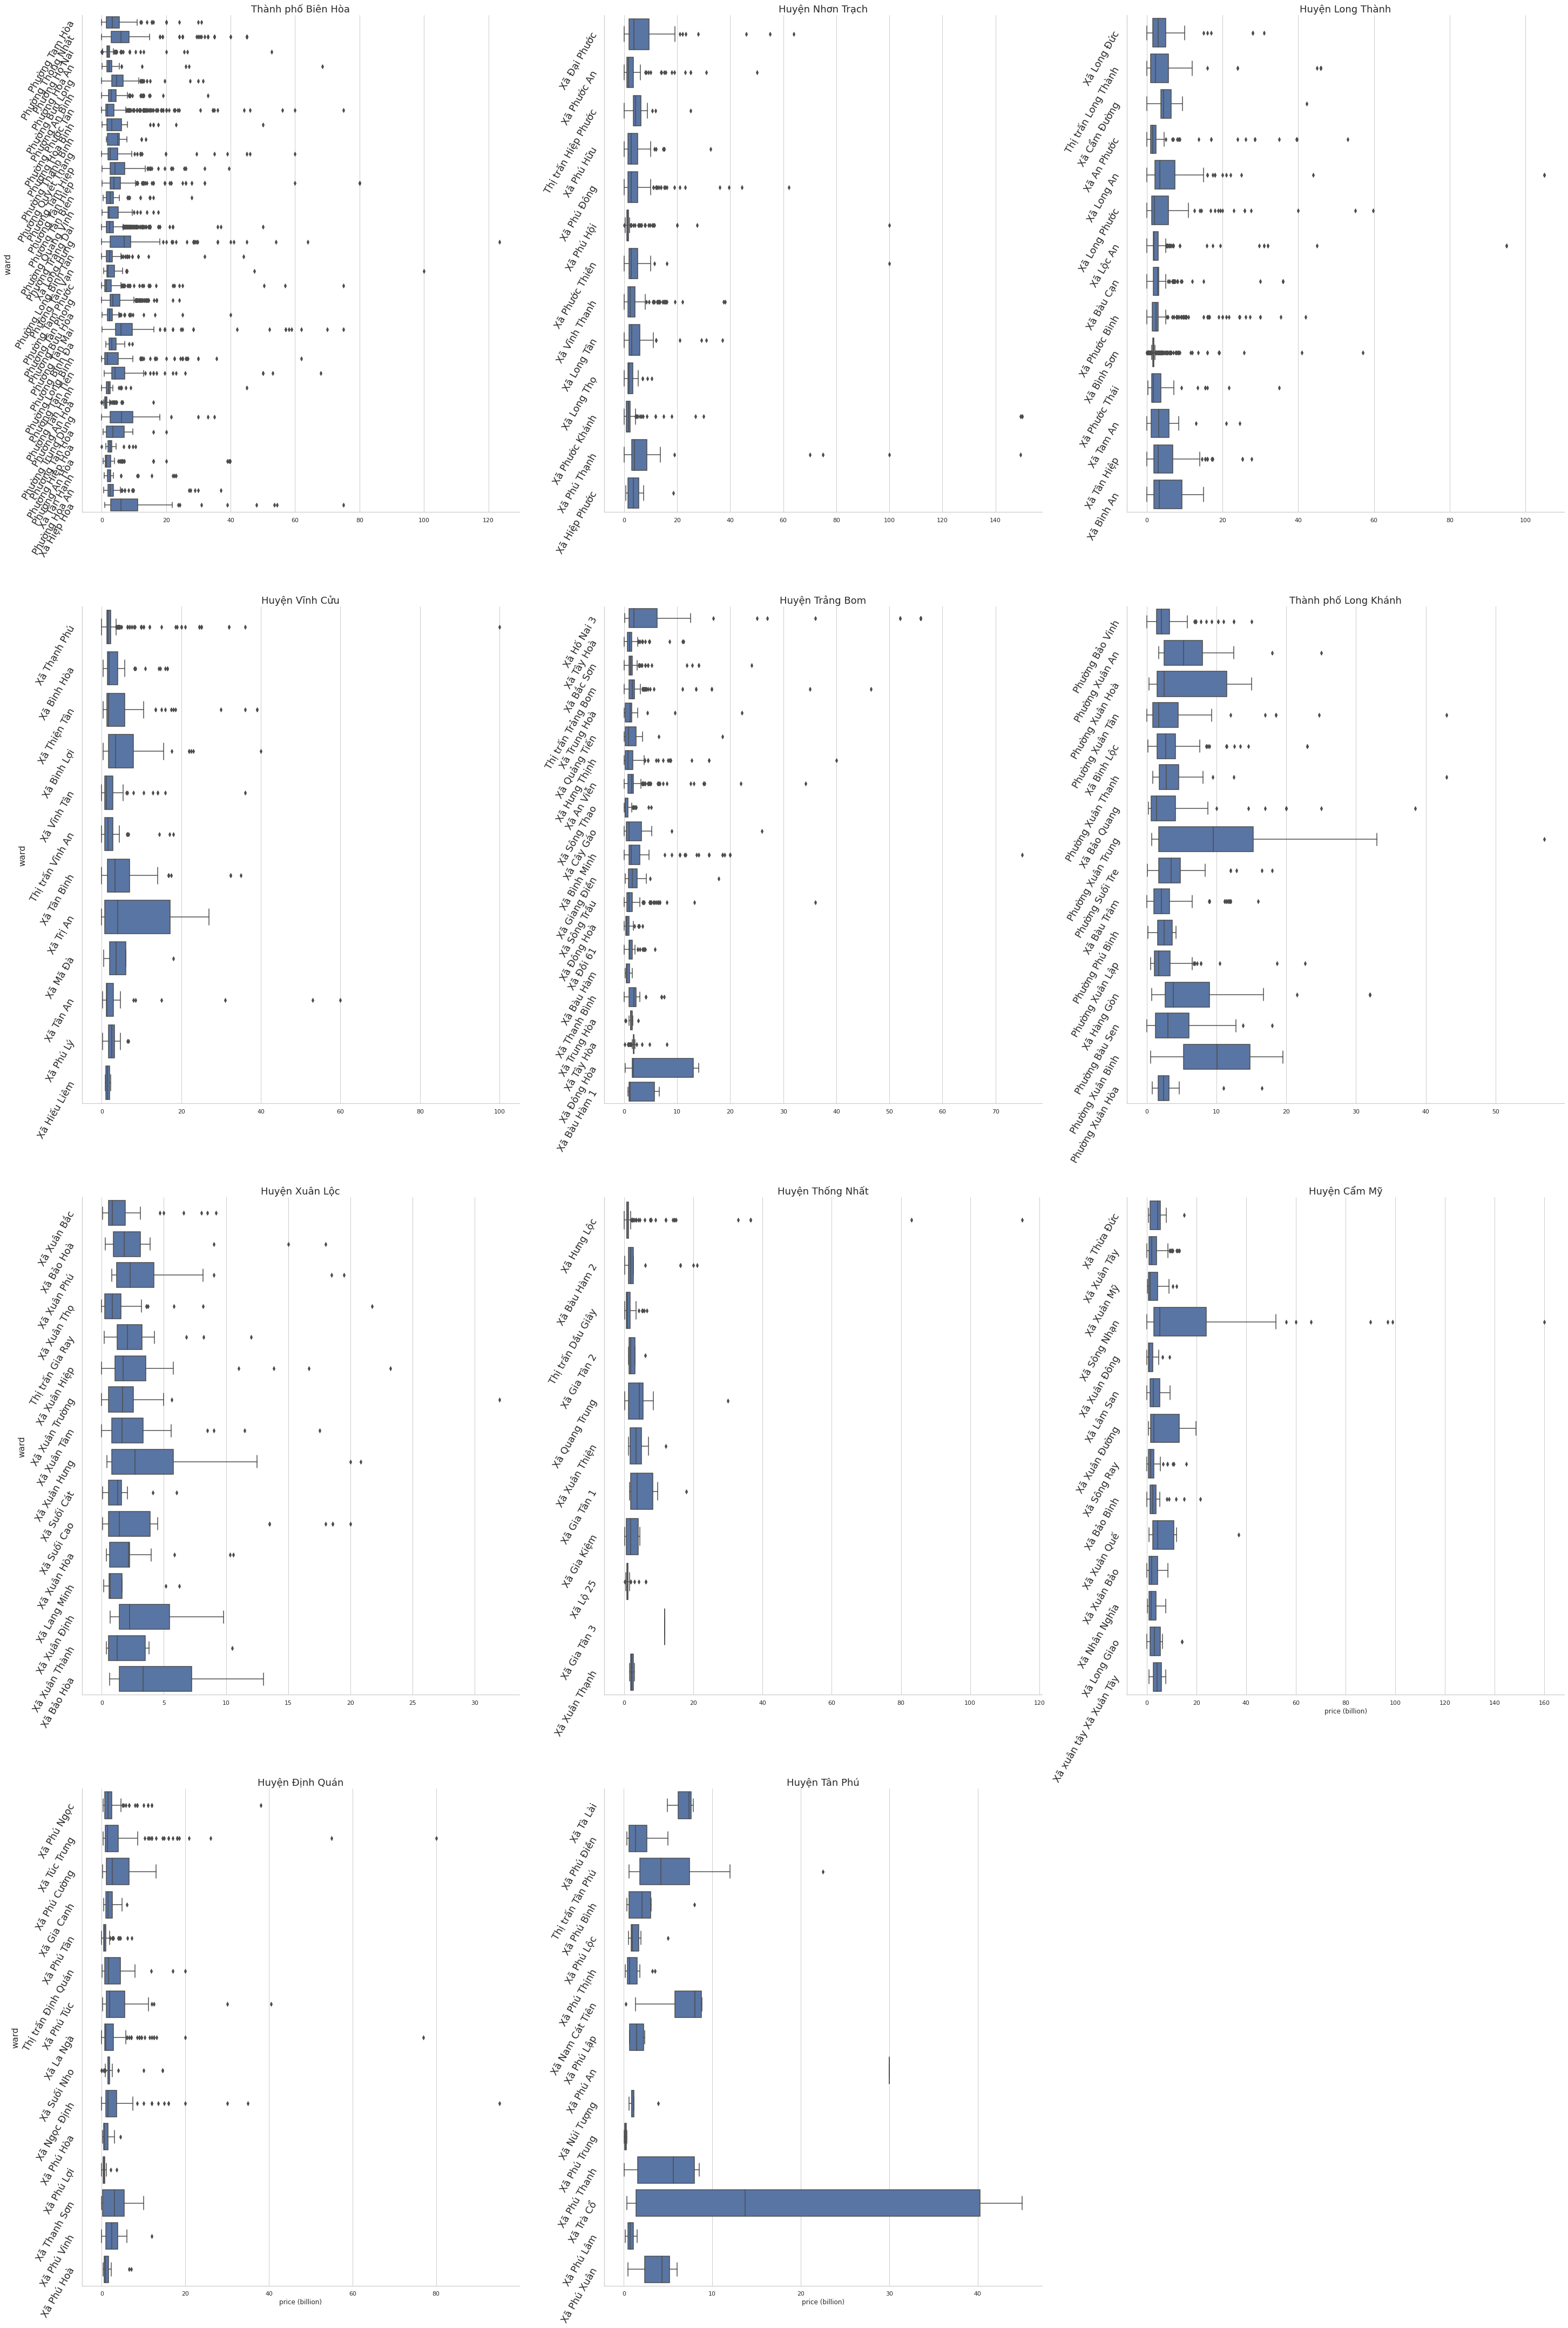

In [432]:
g = sns.FacetGrid(BDS_df9[BDS_df9['region'] == 'Đồng Nai'], col='area', sharey=False,
                  sharex=False, height=15, aspect=0.9, col_wrap=3)

g.map(sns.boxplot, 'price (billion)', 'ward', orient='h')
g.set_titles("{col_name}", size=18)
# g.fig.suptitle('Giá bất động sản tại các tỉnh')

# g.set_xticklabels(fontsize=18)
g.set_yticklabels(rotation=60, fontsize=18)
g.set_ylabels(fontsize=16)


g.fig.tight_layout()
plt.show()


In [433]:
region_cols = ['ward', 'area', 'region', 'price (billion)']
region_ = BDS_df9[region_cols].groupby(
    region_cols[1:-1], as_index=False).mean().sort_values(axis=0, by=['price (billion)'], ignore_index=True)

region_


area       region  price (billion)
0          Huyện Bàu Bàng   Bình Dương         1.794188
1         Huyện Dầu Tiếng   Bình Dương         1.916759
2         Huyện Trảng Bom     Đồng Nai         2.174994
3          Huyện Phú Giáo   Bình Dương         2.418517
4          Thị xã Bến Cát   Bình Dương         2.730454
5          Huyện Xuân Lộc     Đồng Nai         2.873365
6        Huyện Thống Nhất     Đồng Nai         2.949698
7         Huyện Định Quán     Đồng Nai         3.108261
8        Huyện Bình Chánh  Hồ Chí Minh         3.215234
9         Thành phố Dĩ An   Bình Dương         3.781436
10        Thị xã Tân Uyên   Bình Dương         3.990855
11     Thành phố Thuận An   Bình Dương         4.041861
12       Huyện Long Thành     Đồng Nai         4.060345
13     Huyện Bắc Tân Uyên   Bình Dương         4.223484
14  Thành phố Thủ Dầu Một   Bình Dương         4.233695
15         Huyện Vĩnh Cửu     Đồng Nai         4.267698
16   Thành phố Long Khánh     Đồng Nai         4.317435
17          Huyện Tân Phú     Đồng Nai         4.425542
18     Thành phố Biên Hòa     Đồng Nai         4.678838
19                 Quận 8  Hồ Chí Minh         4.934168
20       Huyện Nhơn Trạch     Đồng Nai         4.995666
21                Quận 12  Hồ Chí Minh         5.037546
22          Huyện Hóc Môn  Hồ Chí Minh         5.384187
23           Huyện Cẩm Mỹ     Đồng Nai         5.431506
24           Huyện Củ Chi  Hồ Chí Minh         5.696416
25           Huyện Nhà Bè  Hồ Chí Minh         6.199683
26          Quận Bình Tân  Hồ Chí Minh         6.540384
27                 Quận 4  Hồ Chí Minh         7.551122
28            Quận Gò Vấp  Hồ Chí Minh         7.576361
29                 Quận 6  Hồ Chí Minh         8.548349
30      Thành phố Thủ Đức  Hồ Chí Minh         8.941003
31           Quận Tân Phú  Hồ Chí Minh         9.301964
32                 Quận 9  Hồ Chí Minh        10.148406
33                Quận 11  Hồ Chí Minh        10.529037
34          Huyện Cần Giờ  Hồ Chí Minh        10.770698
35                 Quận 7  Hồ Chí Minh        11.709355
36        Quận Bình Thạnh  Hồ Chí Minh        12.066320
37          Quận Tân Bình  Hồ Chí Minh        14.991761
38         Quận Phú Nhuận  Hồ Chí Minh        16.367541
39                Quận 10  Hồ Chí Minh        17.345254
40                 Quận 5  Hồ Chí Minh        20.424354
41                 Quận 2  Hồ Chí Minh        29.560983
42                 Quận 3  Hồ Chí Minh        30.498506
43                 Quận 1  Hồ Chí Minh        43.887083

### **list time**


In [434]:
BDS_df9['list_time'] = pd.to_datetime(BDS_df9['list_time'])


In [435]:
BDS_df9['year'] = BDS_df9['list_time'].dt.year
BDS_df9['month'] = BDS_df9['list_time'].dt.month


<Figure size 3600x1440 with 0 Axes>

<AxesSubplot:xlabel='list_time', ylabel='price (billion)'>

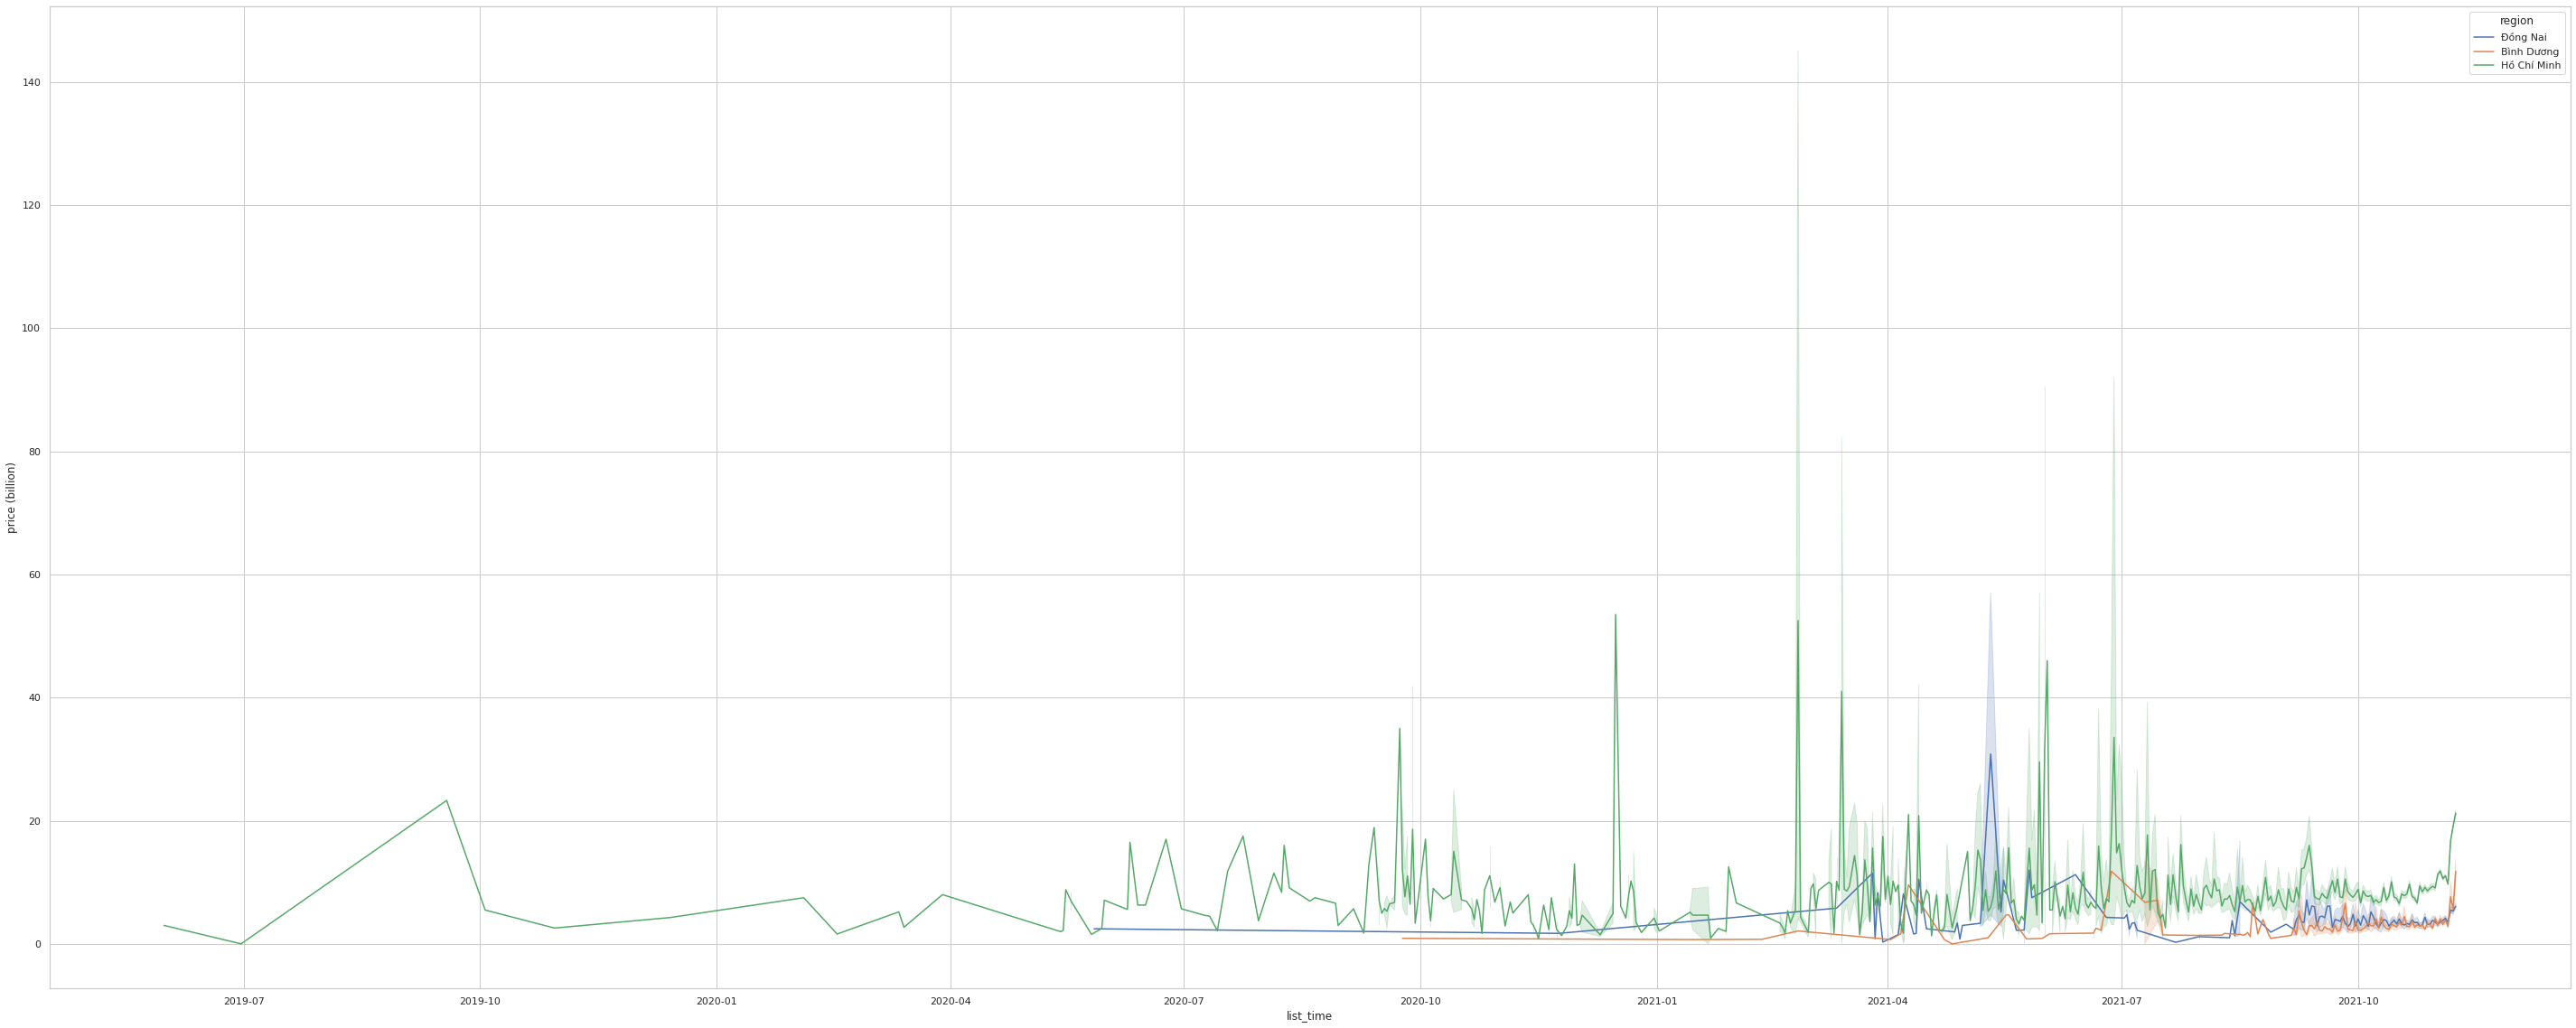

In [436]:
plt.figure(figsize=(50, 20))
sns.lineplot(data=BDS_df9, x="list_time",
             y="price (billion)", hue="region", dashes=False)


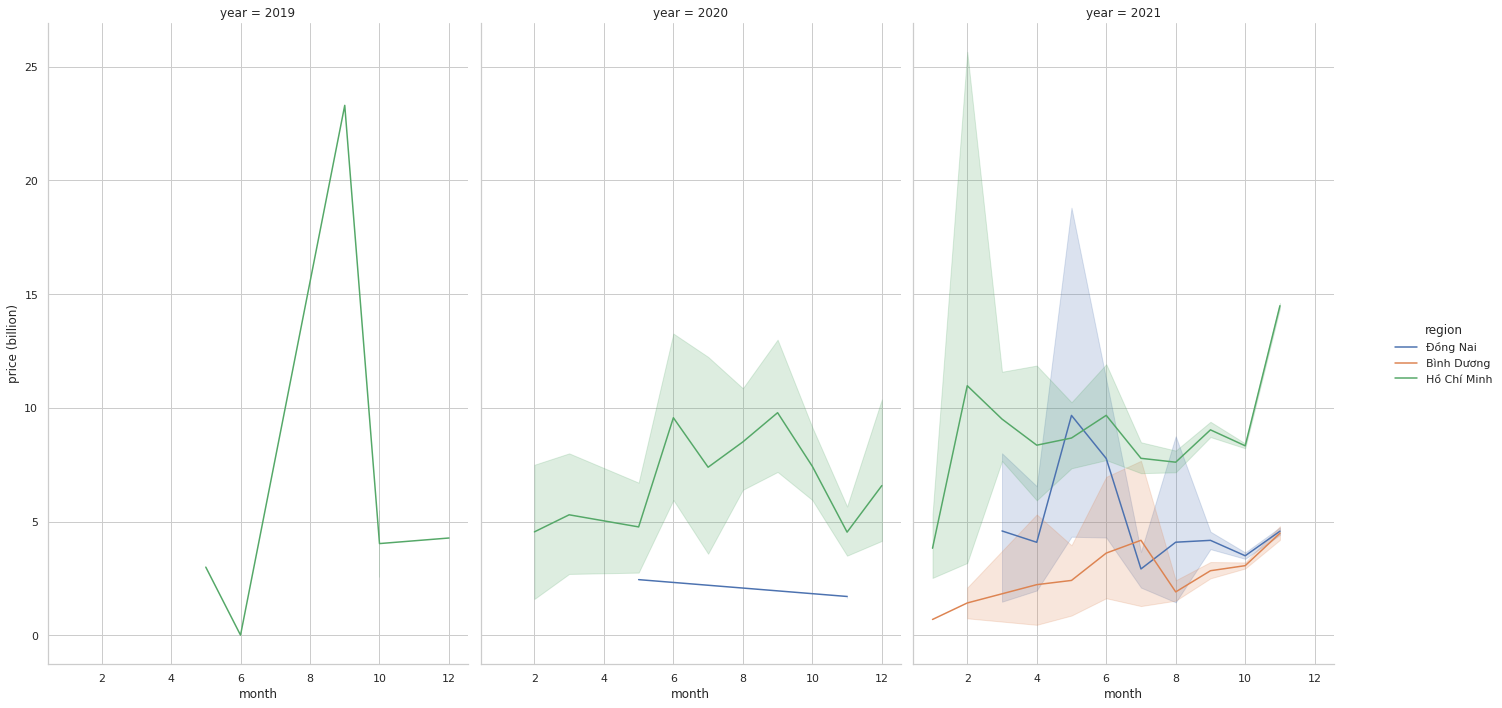

In [437]:
grid = sns.FacetGrid(BDS_df9, hue="region", col="year",
                     margin_titles=True, height=10, aspect=0.65)
grid.map(sns.lineplot, "month", "price (billion)")
grid.add_legend()


In [438]:
BDS_df9['list_time'].describe()


count                  210176
unique                    374
top       2021-11-07 00:00:00
freq                    25957
first     2019-05-31 00:00:00
last      2021-11-08 00:00:00
Name: list_time, dtype: object

### direction , **property_legal_document , rooms , toilets , floors , type_real_estate**


<AxesSubplot:xlabel='price (billion)', ylabel='direction'>

<AxesSubplot:xlabel='price (billion)', ylabel='property_legal_document'>

<AxesSubplot:xlabel='price (billion)', ylabel='rooms'>

<AxesSubplot:xlabel='price (billion)', ylabel='toilets'>

<AxesSubplot:xlabel='price (billion)', ylabel='floors'>

<AxesSubplot:xlabel='price (billion)', ylabel='type_real_estate'>

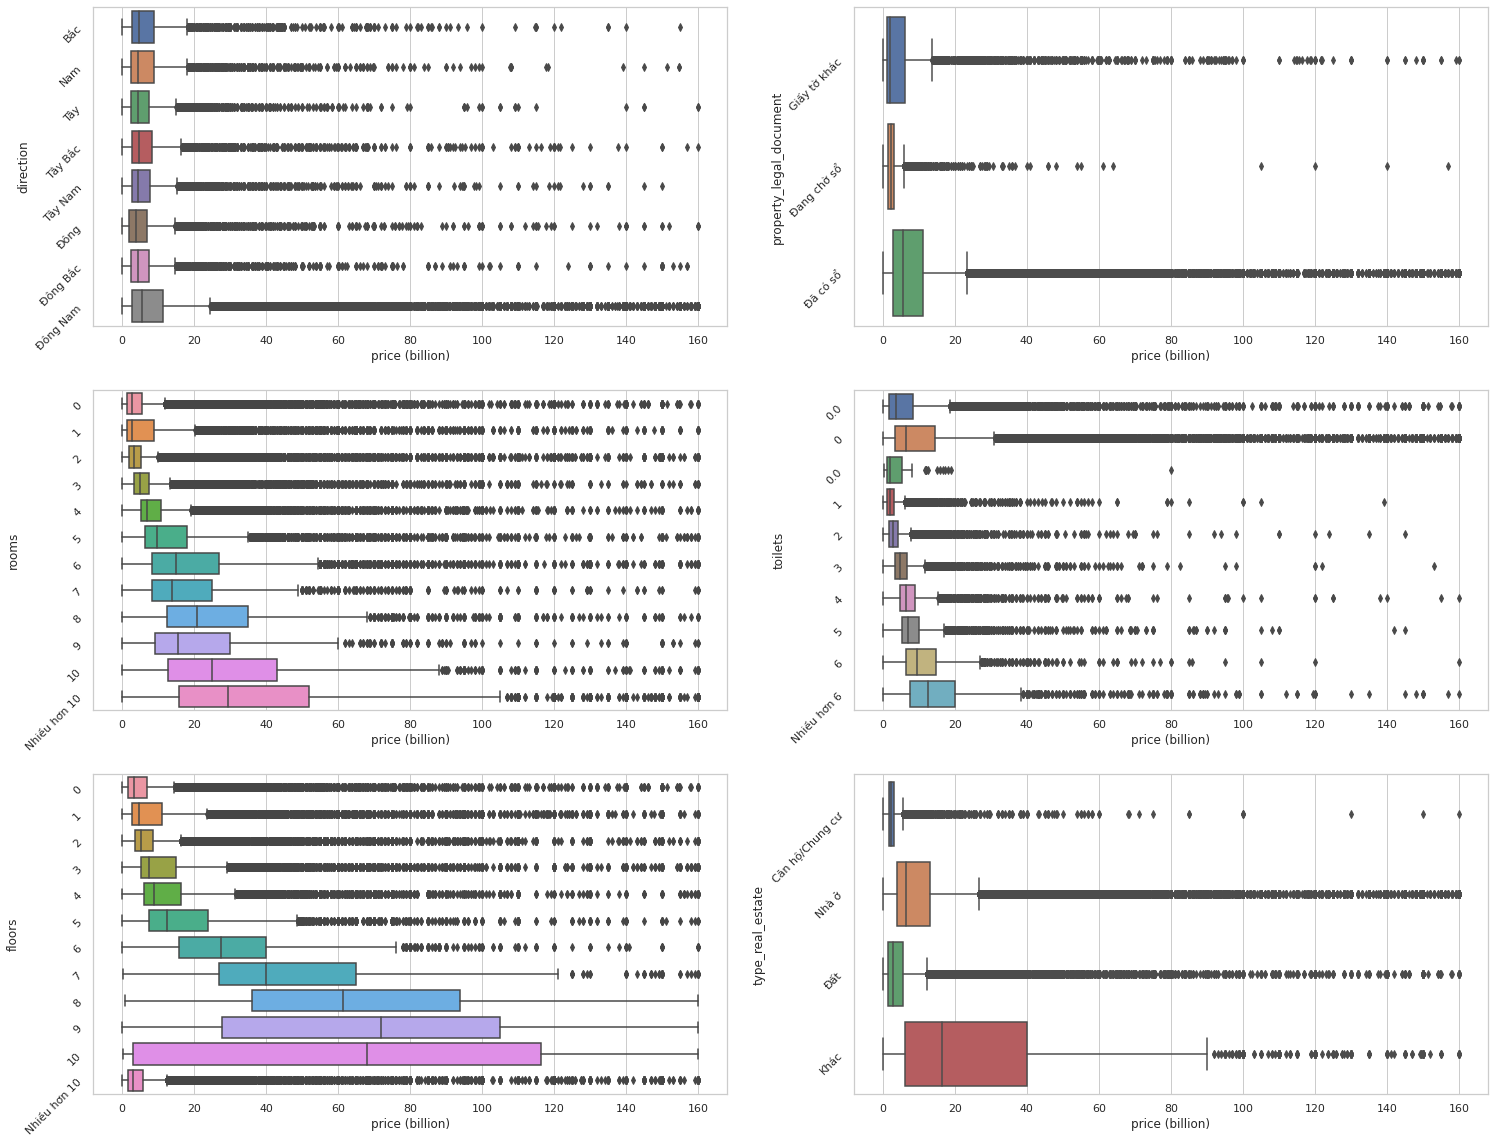

In [439]:
fig, axes = plt.subplots(3, 2, figsize=(25, 20))
col, row = 0, 0
for val in ['direction', 'property_legal_document', 'rooms', 'toilets', 'floors', 'type_real_estate']:
    sns.boxplot(y=val, x='price (billion)', orient='h',
                data=BDS_df9, ax=axes[row, col])
    axes[row, col].tick_params(labelrotation=45, axis='y')
    col += 1
    if col > 1:
        col = 0
        row += 1


In [444]:
type_real_estate = BDS_df9['type_real_estate'].value_counts()
type_real_estate

Nhà ở              147726
Đất                 44729
Căn hộ/Chung cư     15237
Khác                 2484
Name: type_real_estate, dtype: int64

([<matplotlib.patches.Wedge at 0x7feeb0c545b0>,
 [Text(-0.6545557933963082, 0.8840569627186529, 'Nhà ở'),
  Text(0.4002834144047298, -1.0245843977694036, 'Đất'),
  Text(1.050213592780778, -0.32718711701179526, 'Căn hộ/Chung cư'),
  Text(1.099241853222039, -0.04083317431914543, 'Khác')],
 [Text(-0.35703043276162266, 0.4822128887556288, '70%'),
  Text(0.21833640785712535, -0.5588642169651292, '21%'),
  Text(0.5728437778804243, -0.17846570018825195, '7%'),
  Text(0.5995864653938393, -0.022272640537715688, '1%')])

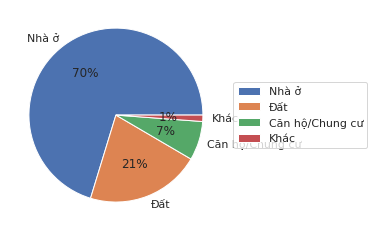

In [445]:
plt.pie(type_real_estate, labels=type_real_estate.index, autopct='%.0f%%')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)

=> Chỉ có direction không có sự khác biệt giữa các nhóm nên cần kết hợp với các thuộc tính khác


<AxesSubplot:xlabel='price (billion)', ylabel='direction'>

<AxesSubplot:xlabel='price (billion)', ylabel='property_legal_document'>

<AxesSubplot:xlabel='price (billion)', ylabel='rooms'>

<AxesSubplot:xlabel='price (billion)', ylabel='toilets'>

<AxesSubplot:xlabel='price (billion)', ylabel='floors'>

<AxesSubplot:xlabel='price (billion)', ylabel='type_real_estate'>

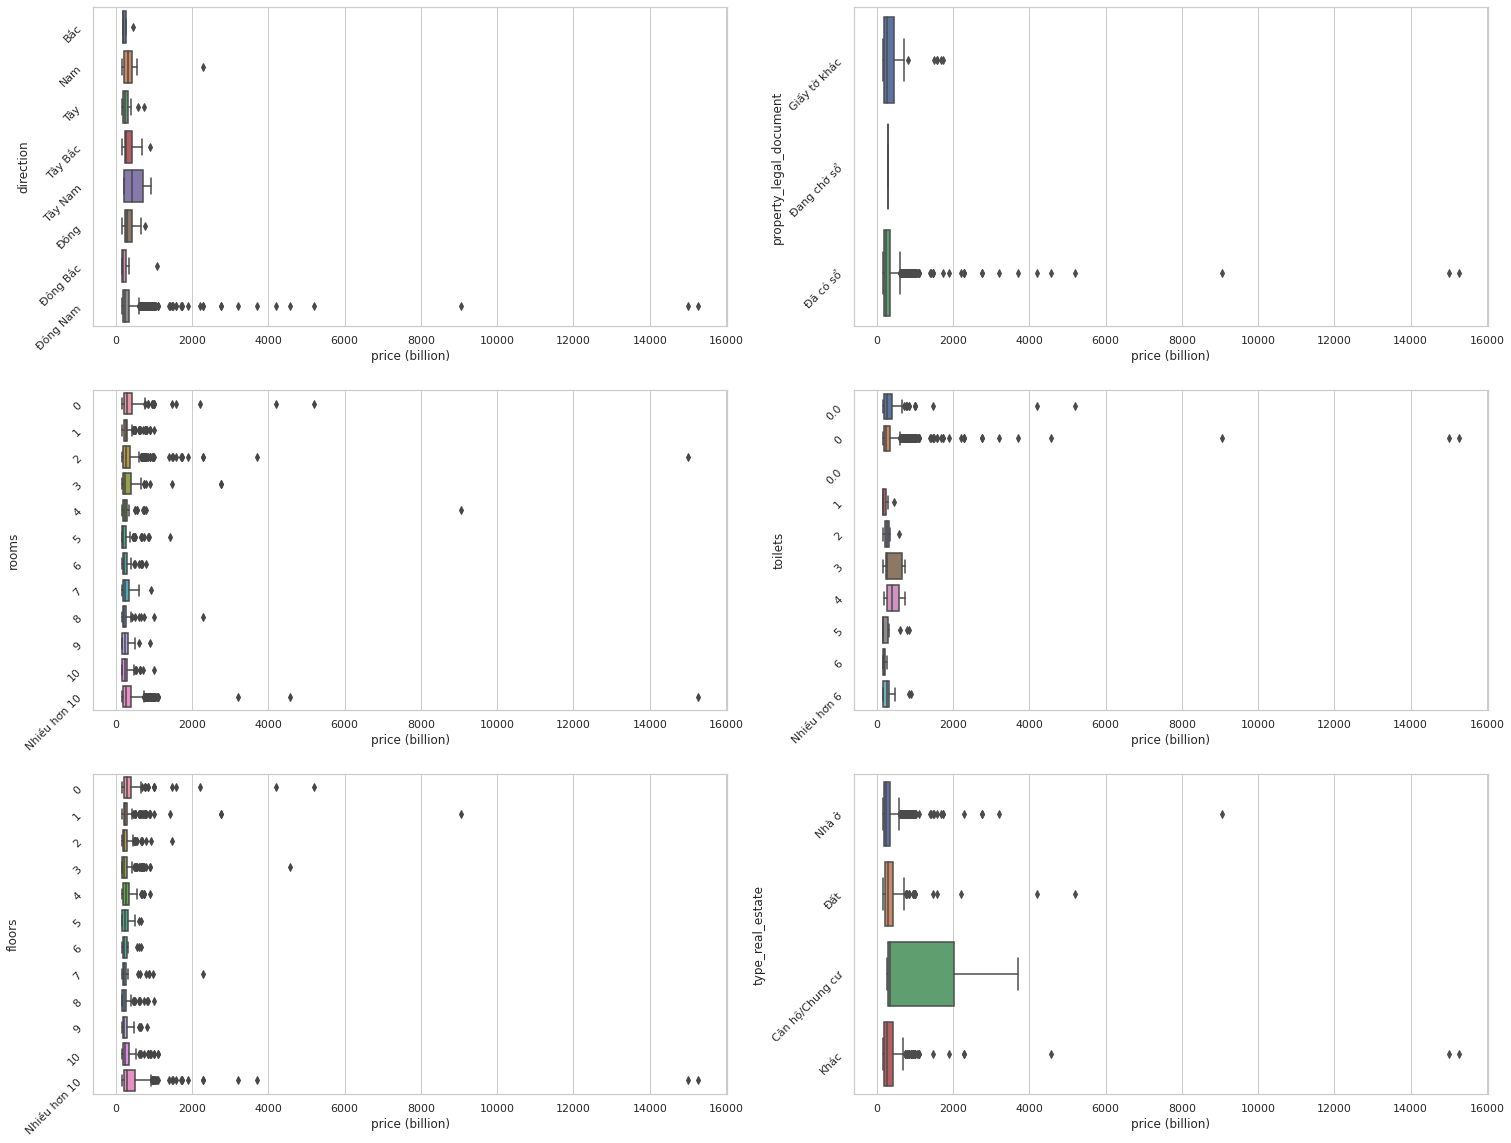

In [446]:
fig, axes = plt.subplots(3, 2, figsize=(25, 20))
col, row = 0, 0
for val in ['direction', 'property_legal_document', 'rooms', 'toilets', 'floors', 'type_real_estate']:
    sns.boxplot(y=val, x='price (billion)', orient='h',
                data=outlier_df, ax=axes[row, col])  # [outlier_df['price (million)'] <0.25e12]
    axes[row, col].tick_params(labelrotation=45, axis='y')
    col += 1
    if col > 1:
        col = 0
        row += 1


In [ ]:
# Vì website chỉ là nền tảng đăng tin nên không được tính là yếu tố ảnh hưởng đến giá
BDS_df9.drop('website', axis=1, inplace=True)


## Kết hợp


#### living_size (m2) + type_real_estate


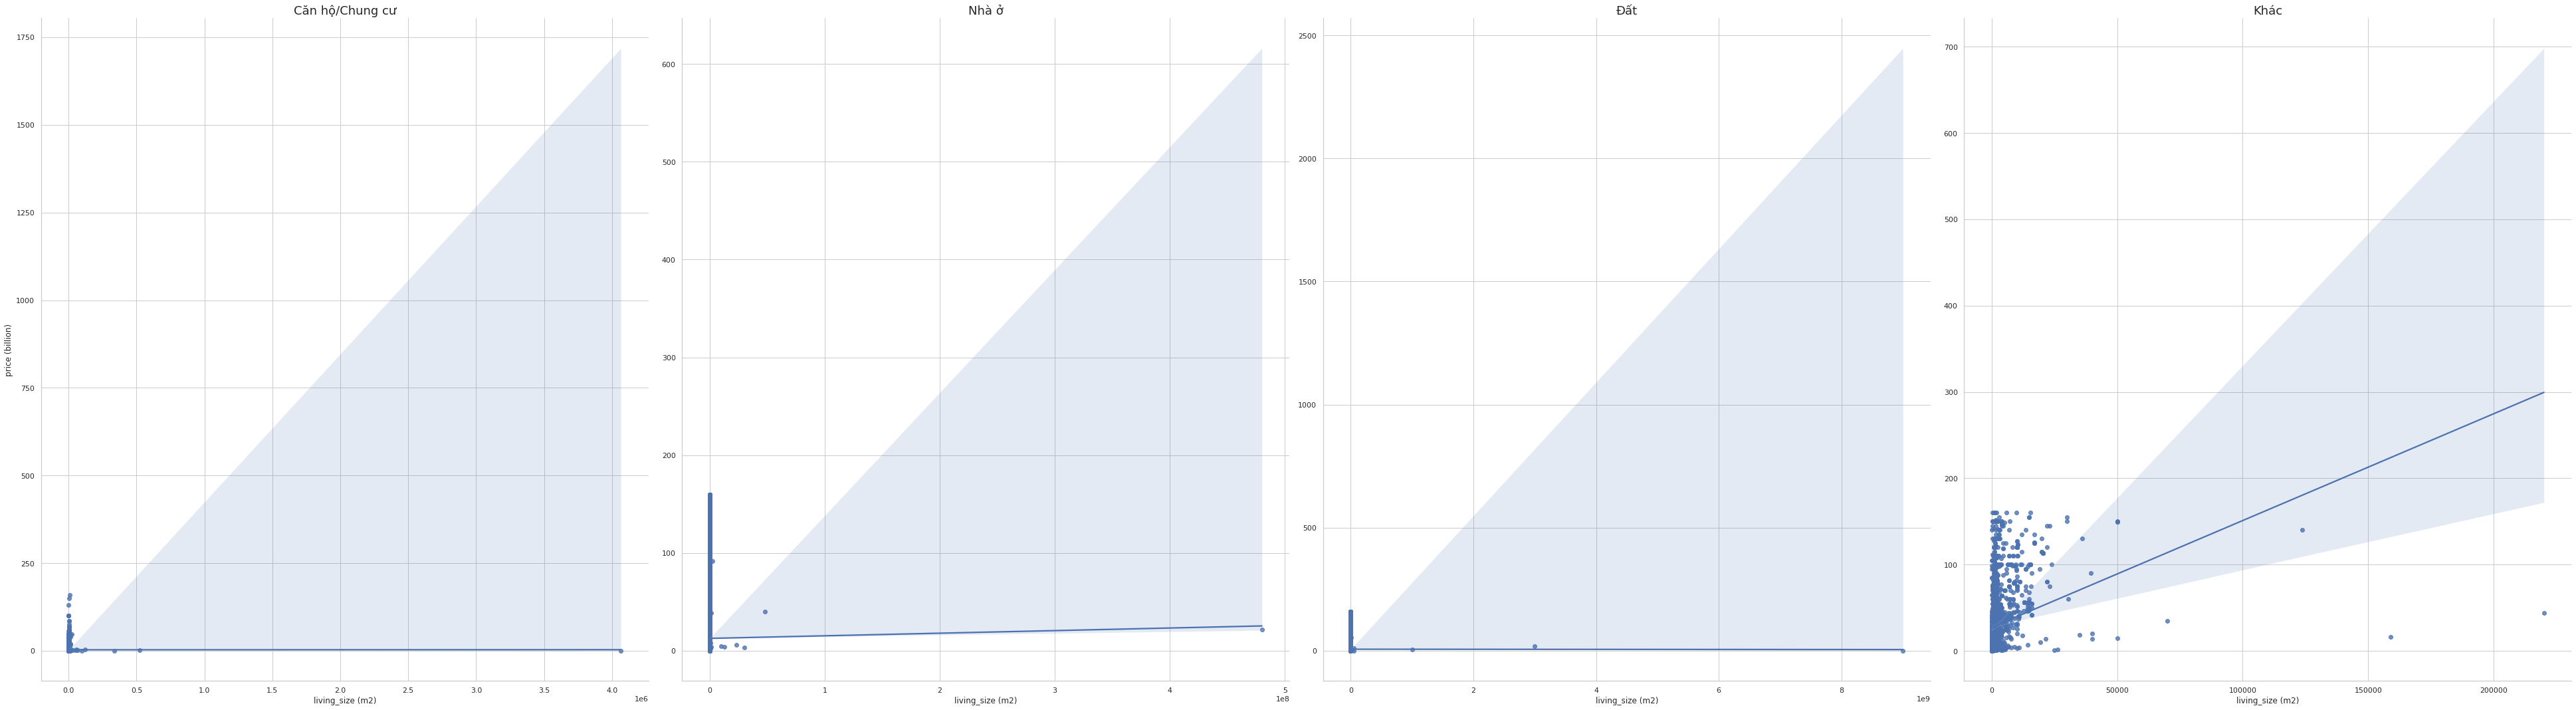

In [448]:
g = sns.FacetGrid(BDS_df9, col='type_real_estate', sharey=False,
                  sharex=False, height=15, aspect=0.9, col_wrap=4)

g.map(sns.regplot, 'living_size (m2)', 'price (billion)')
g.set_titles("{col_name}", size=18)
# g.fig.suptitle('Giá bất động sản tại các tỉnh')

# g.set_yticklabels(rotation=60, fontsize=18)

g.fig.tight_layout()
plt.show()


<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='living_size (m2)', ylabel='price (billion)'>

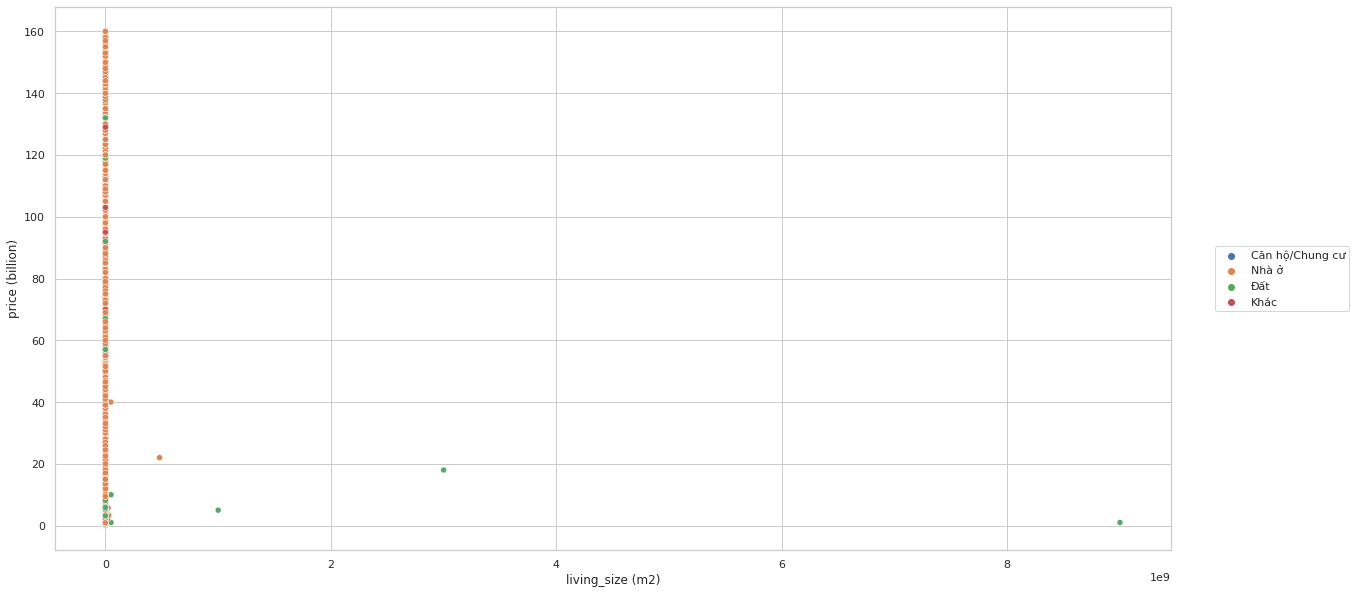

In [449]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=BDS_df9, x='living_size (m2)',
                y='price (billion)', hue='type_real_estate')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)


#### size (m2) + type_real_estate


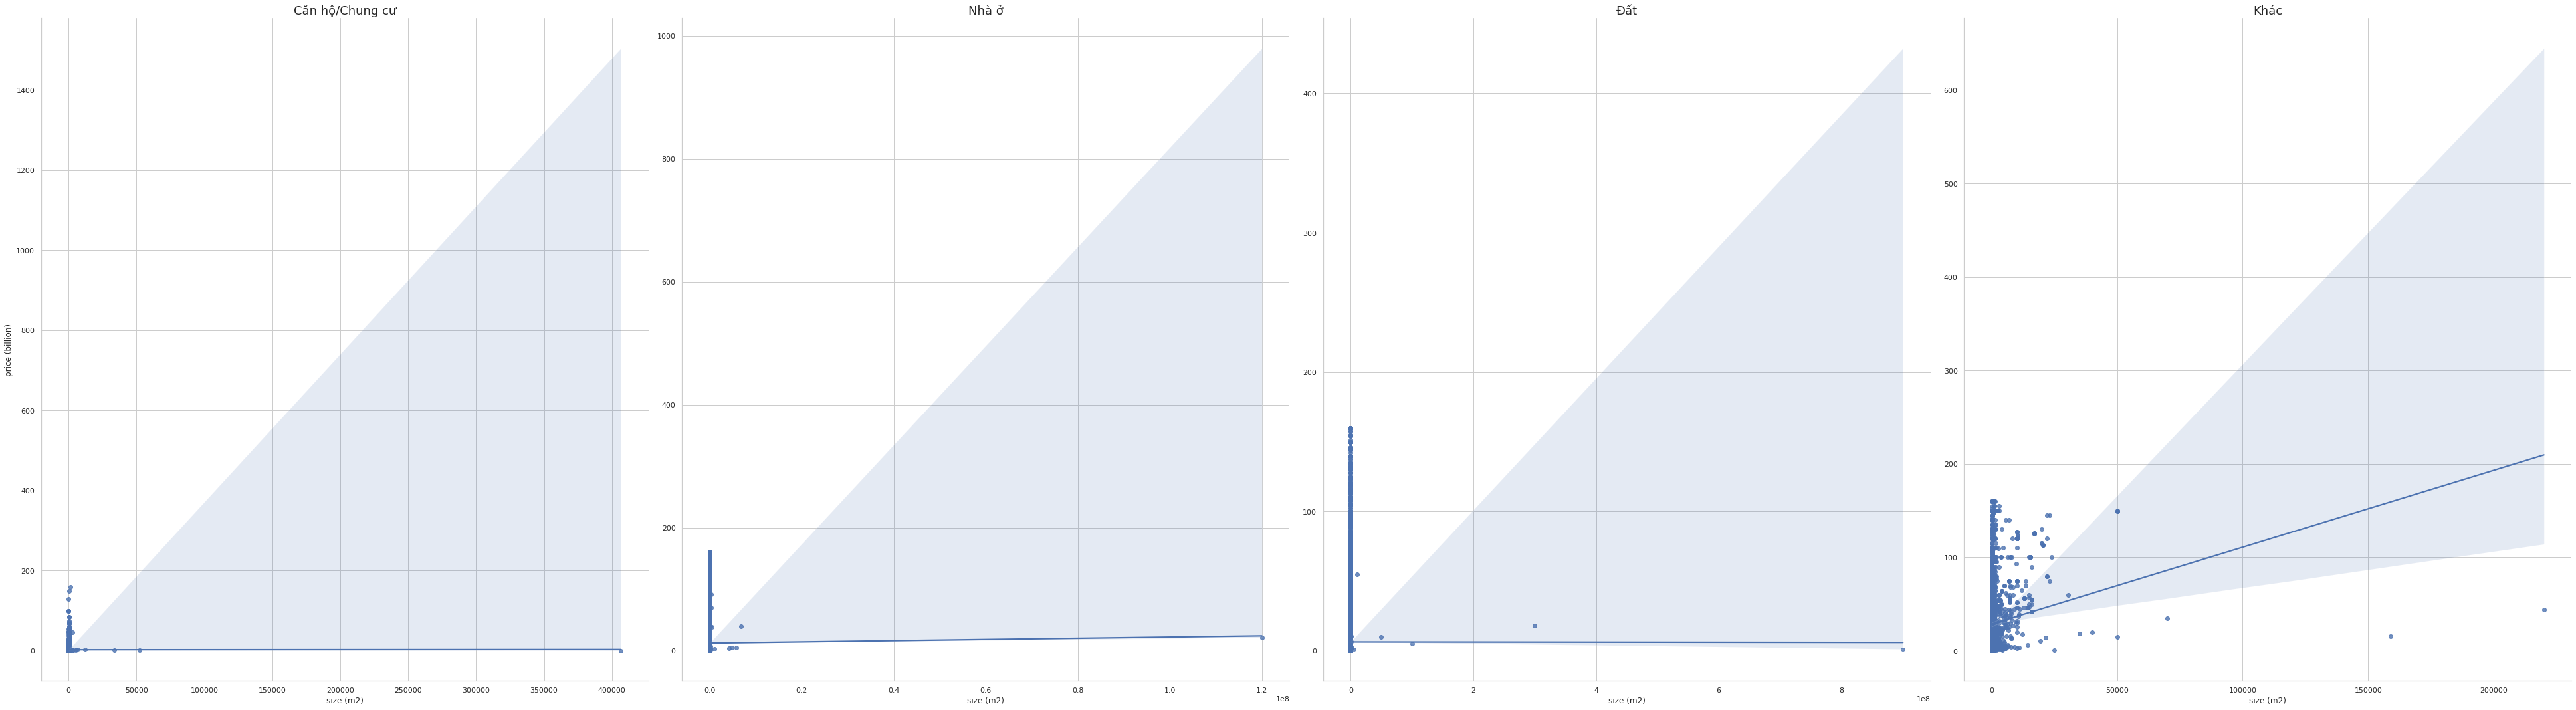

In [450]:
g = sns.FacetGrid(BDS_df9, col='type_real_estate', sharey=False,
                  sharex=False, height=15, aspect=0.9, col_wrap=4)

g.map(sns.regplot, 'size (m2)', 'price (billion)')
g.set_titles("{col_name}", size=18)
# g.fig.suptitle('Giá bất động sản tại các tỉnh')

# g.set_yticklabels(rotation=60, fontsize=18)

g.fig.tight_layout()
plt.show()


<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='size (m2)', ylabel='price (billion)'>

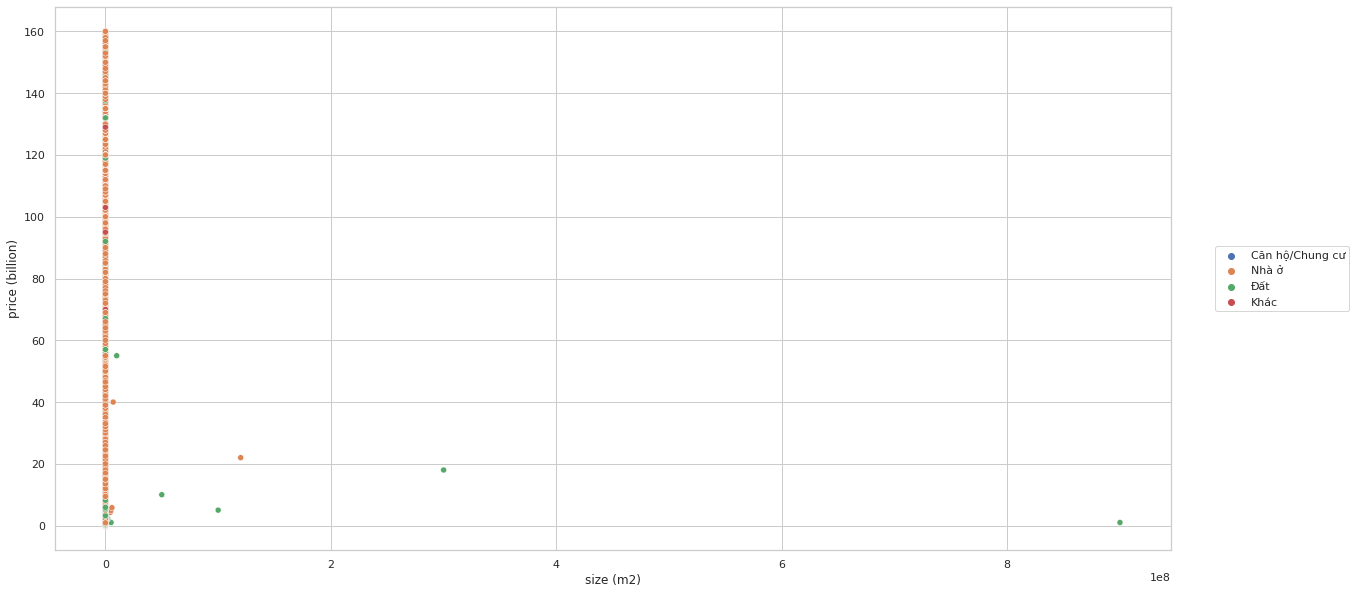

In [451]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=BDS_df9, x='size (m2)',
                y='price (billion)', hue='type_real_estate')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)


<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='size (m2)', ylabel='price (billion)'>

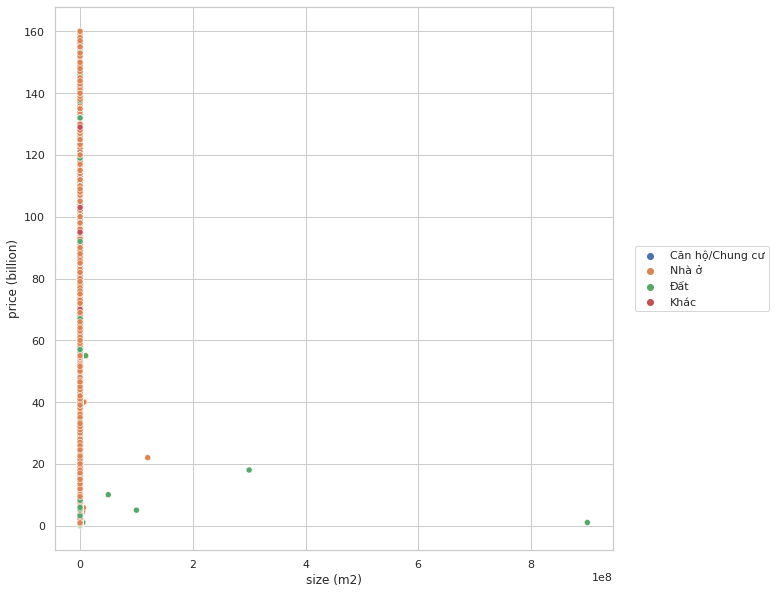

In [452]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=BDS_df9[BDS_df9['price (billion)'] <= 1e8], x='size (m2)',
                y='price (billion)', hue='type_real_estate')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)


#### length (m) + type_real_estate


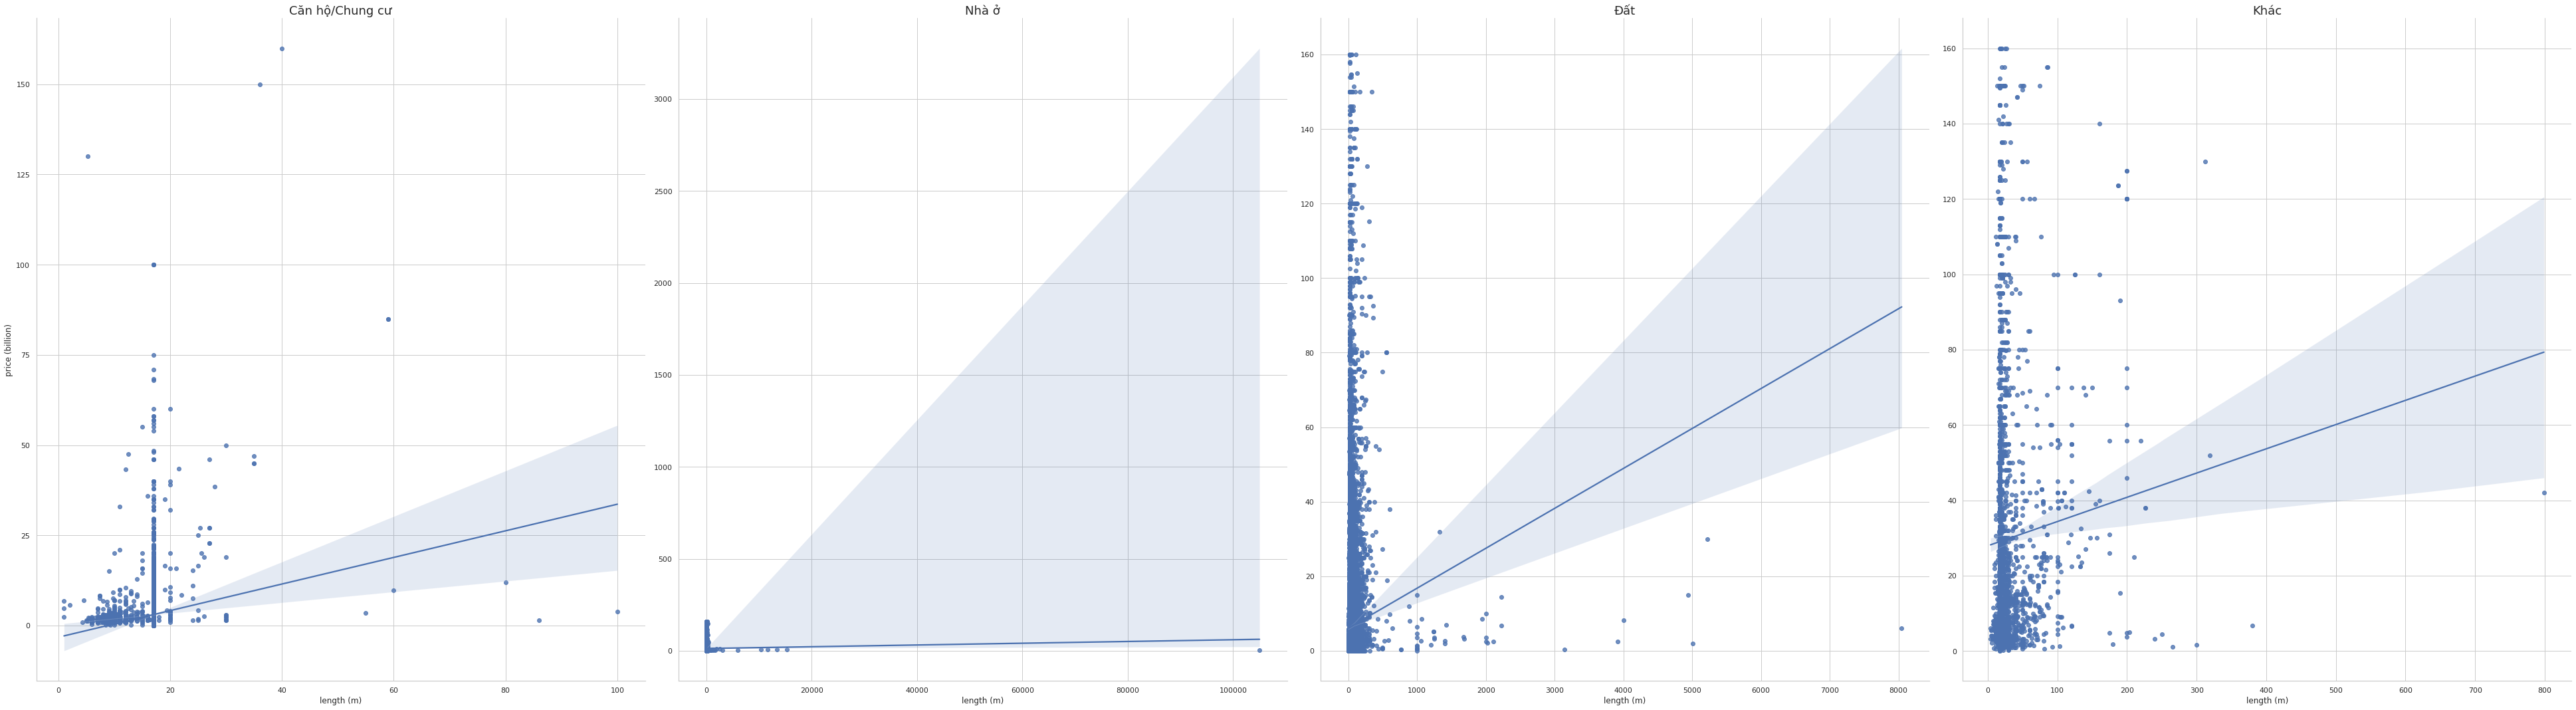

In [453]:
g = sns.FacetGrid(BDS_df9, col='type_real_estate', sharey=False,
                  sharex=False, height=15, aspect=0.9, col_wrap=4)

g.map(sns.regplot, 'length (m)', 'price (billion)')
g.set_titles("{col_name}", size=18)
# g.fig.suptitle('Giá bất động sản tại các tỉnh')

# g.set_ticklabels( fontsize=18)

g.fig.tight_layout()
plt.show()


<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='length (m)', ylabel='price (billion)'>

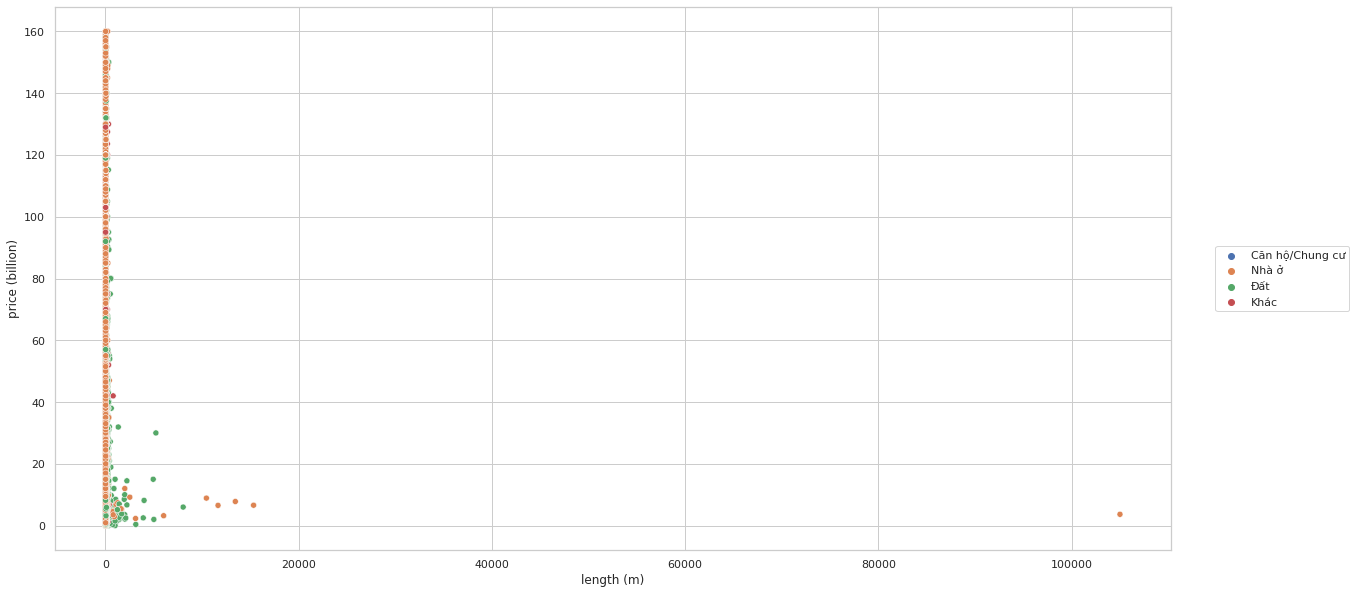

In [454]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=BDS_df9, x='length (m)',
                y='price (billion)', hue='type_real_estate')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)


#### width (m) + type_real_estate


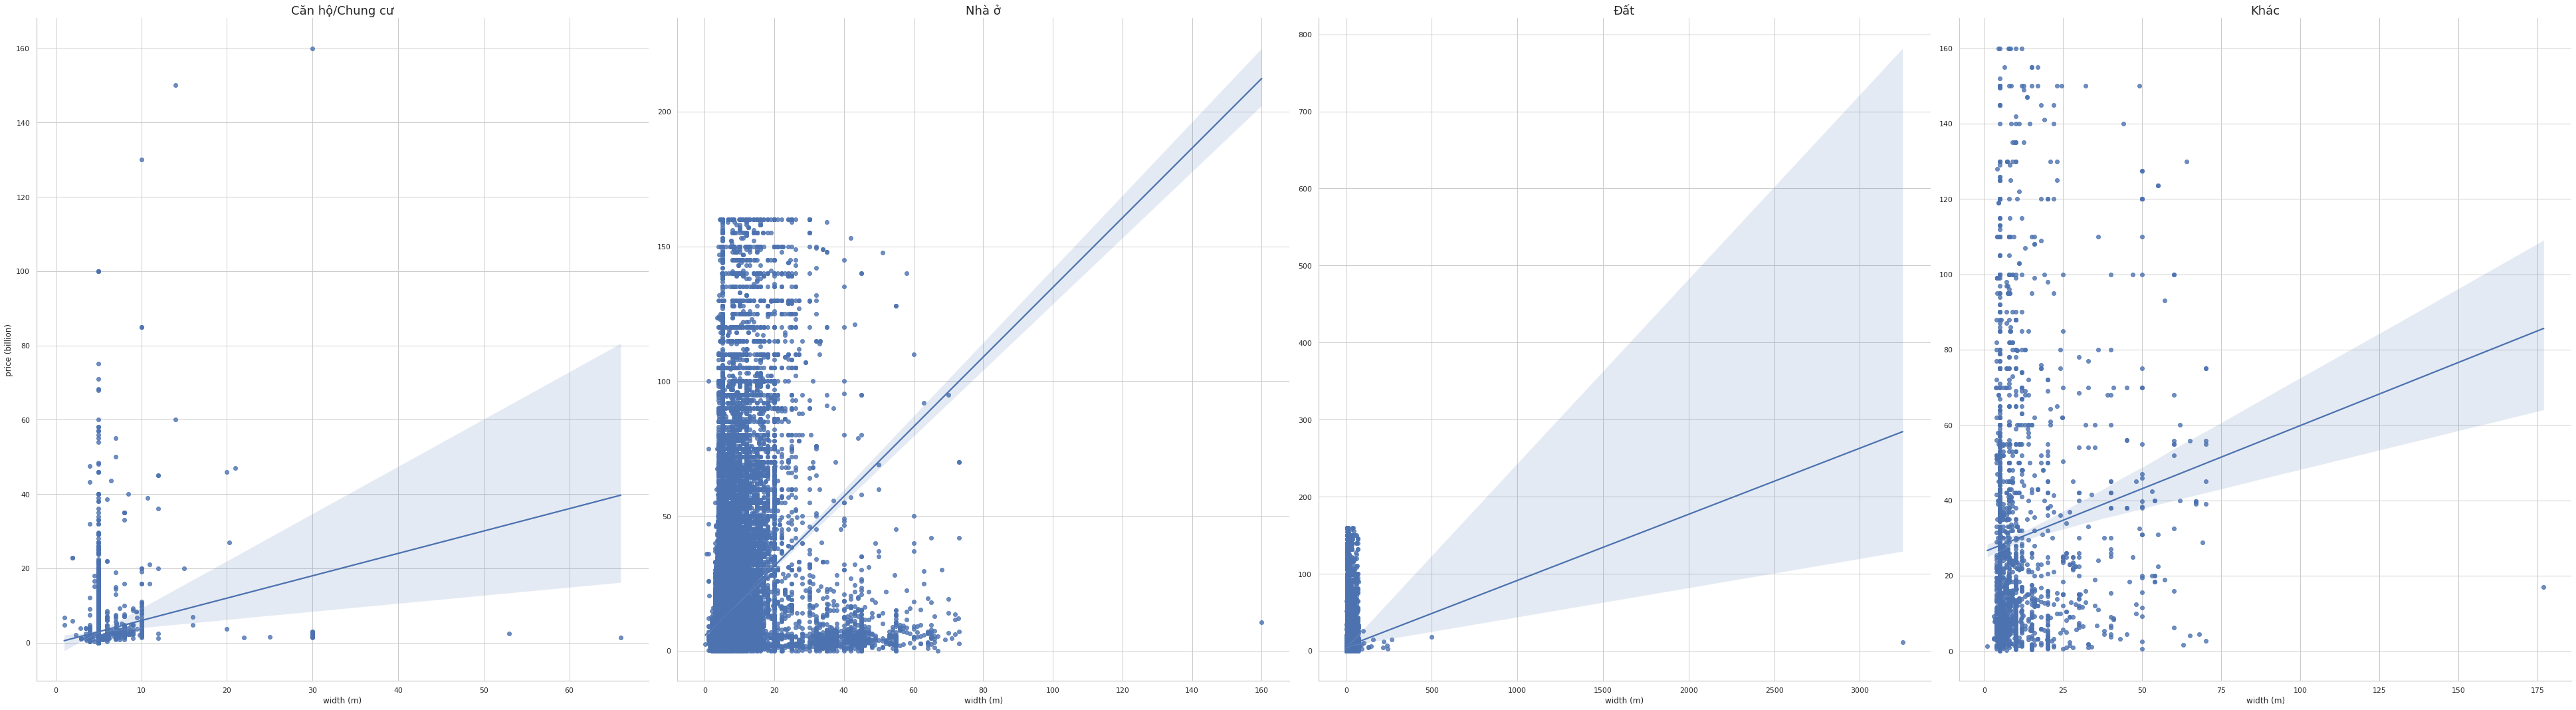

In [455]:
g = sns.FacetGrid(BDS_df9, col='type_real_estate', sharey=False,
                  sharex=False, height=15, aspect=0.9, col_wrap=4)

g.map(sns.regplot, 'width (m)', 'price (billion)')
g.set_titles("{col_name}", size=18)
# g.fig.suptitle('Giá bất động sản tại các tỉnh')

# g.set_ticklabels( fontsize=18)

g.fig.tight_layout()
plt.show()


<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='width (m)', ylabel='price (billion)'>

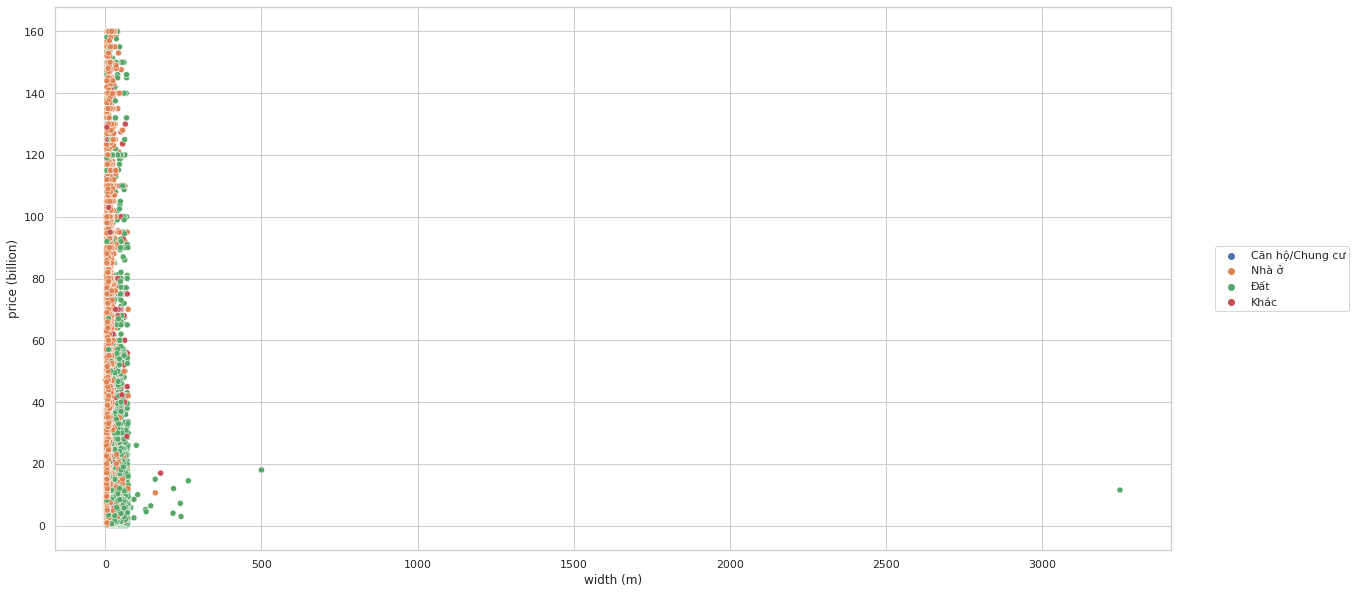

In [456]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=BDS_df9, x='width (m)',
                y='price (billion)', hue='type_real_estate')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)


# Model


## Prepare data


In [ ]:
features = ['ward', 'area', 'region', 'rooms', 'toilets', 'type_real_estate',
            'floors', 'property_legal_document', 'price (billion)']


In [ ]:
BDS_df9.shape

In [ ]:
BDS_model_df = BDS_df9[features].copy()
BDS_model_df.head()


In [ ]:
X = BDS_model_df.iloc[:, 0:-1]
y = BDS_model_df.iloc[:, -1]


In [ ]:
X.info()


In [ ]:
def process_get_dummies(df, features, remove_one_column=False):
    one_hot = df.copy()
    for feature in features:
        one_hot = pd.get_dummies(one_hot, columns=[feature])
        if remove_one_column:
            one_hot = one_hot.iloc[:, :-1]
    return one_hot


In [ ]:
X_encoded = process_get_dummies(X.copy(), features[:-1],
                                remove_one_column=True)
X_encoded.head()


In [ ]:
X_data = pd.concat([X_encoded, BDS_df9[['year', 'month']]], axis=1)
y_data = y.copy()


In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(
    X_data, y_data, test_size=0.1, random_state=42)


## Train model


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math


def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print('R2 score:', r2)
    print('Mean Square Error (MSE):', mse)
    print('Root Mean Square Error (RMSE):', rmse)
    print('Mean Absolute Error (MAE):', mae)
    return r2, mse, rmse, mae


### Linear Regression


In [ ]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(train_X, train_y)


In [ ]:
y_pred = linear_model.predict(test_X)


In [ ]:
evaluate_model(test_y, y_pred)


In [ ]:
for index, (true, pred) in enumerate(zip(test_y, y_pred)):
    print(true, '\t', round(pred, 5))
    if index > 20:
        break


### Random Forest


In [ ]:
from pprint import pprint

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                               n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
# Fit the random search model
rf_random.fit(train_X, train_y)


### KNN


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()
knn_model.fit(train_X, train_y)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(train_X, train_y)
model.best_params_

In [ ]:
y_pred = knn_model.predict(test_X)


In [ ]:
evaluate_model(test_y, y_pred)


In [ ]:
for index, (true, pred) in enumerate(zip(test_y, y_pred)):
    print(true, '\t', round(pred, 5))
    if index > 20:
        break
